In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

Empezamos a importar los diferentes archivos con bases de datos que conforman este dataset.

En primer lugar importamos el archivo que procede de la organización 'Variables of Democracy'. Dado que el archivo original es muy grande, guardamos una versión reducida con tan solo los archivos que necesitamos para este ejercicio.

In [4]:
# vdem = pd.read_csv('V-Dem-CY-Full+Others-v13.csv')

# vdem_columns = ['country_name', 'year', 'v2x_libdem', 'v2stfisccap', 'v2clkill', 'v2x_corr', 'v2x_gender']

# vdem_selected = vdem[vdem_columns].copy()
# vdem_selected.rename(columns={'country_name': 'Country Name', 'year': 'Year', 'v2x_libdem': 'Liberal Democracy', 'v2stfisccap': 'State Capacity',
#                        'v2clkill': 'Repression', 'v2x_corr': 'Corruption', 'v2x_gender': 'Female Empowerment'}, inplace=True)

# csv_file_path = 'vdem_selected.csv'
# vdem_selected.to_csv(csv_file_path, index=False)
vdem_df = pd.read_csv('vdem_selected.csv')

Acto seguido, continuamos e importamos el resto de bases de datos que haremos uso en este proyecto. Por orden en el que los iremos importando serían los siguientes:

    - Institute for Health Metrics and Evaluation
    - Ethnic Power Relations
    - Naciones Unidas: World development Indicators
    - World Inequality Databse
    - Naciones Unidas: World Population Prospects
    - You Bulge (calculado a partir de World Population Prospects)
    - War Index (calculado a partir de World Population Prospects)
    - Upsala Conflict Data Program (4 archivos)
    - Our World in Data

In [5]:
ihme = pd.read_csv('IHME-GBD_2019_DATA-63f6d3d0-1.csv')
epr = pd.read_csv('EPR-2021.csv')
wdi = pd.read_csv('WDIData.csv')
wid = pd.read_excel('WID_Data_17022024-191218.xls', sheet_name='Data', header=None)
wpp = pd.read_csv('WPP2022_PopulationByAge5GroupSex_Medium.csv')
youth_bulge = pd.read_csv('youth_bulge_countries_df_file.csv')
war_index = pd.read_csv('war_index.csv')
ucdp = pd.read_csv('GEDEvent_v23_1.csv')
ucdp_battle = pd.read_csv('BattleDeaths_v23_1.csv')
ucdp_nonstate = pd.read_csv('Nonstate_v23_1.csv')
ucdp_onesided = pd.read_csv('OneSided_v23_1.csv')

In [6]:
pop_graph = pd.read_csv('population-regions-with-projections.csv')

Ahora que ya disponemos de todos los archivos importados, podemos proceder a crear cada una de las variables que conformarán este dataset.

## Variable Dependiente Total Deaths

Empezamos a preprocesar la variable dependiente con la totalidad de defunciones por un acto violento, ya que esta variable nos proporcionará el número de países de los cuales podremos hacer predicciones.

En primer lugar reducimos el dataset para tener tan sólo el año, el país y el número de defunciones.

In [602]:
deaths = ucdp.iloc[:, [2, 33, 45]]

In [603]:
deaths.head()

,year,country,high
0,2017,Afghanistan,6
1,2021,Afghanistan,184
2,2021,Afghanistan,3
3,2021,Afghanistan,10
4,1989,Afghanistan,6


Agregamos todos los valores por año para así tener un registro por año.

In [604]:
deaths = deaths.groupby(['year', 'country'])['high'].sum().reset_index()

Consultamos ahora el número de países.

In [605]:
deaths['country'].nunique()

124

Vemos que disponemos de 124 países con registros, por lo que este será el número de países del que podremos hacer una predicción por limitaciones con los datos.

Acto seguido, lo comparamos con la siguiente lista de la que sabemos que los nombres coinciden con otras variables.

In [606]:
country_list = ['Afghanistan', 'Albania', 'Algeria',
       'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic',
       'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea',
       'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Greenland', 'Guam', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       "Korea, Dem. People's Rep.", 'Korea, Rep.', 'Kosovo', 'Kuwait',
       'Kyrgyz Republic', 'Lao PDR', 'Latvia', 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Lithuania', 'Luxembourg',
       'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali',
       'Mauritania', 'Mexico', 'Moldova', 'Monaco', 'Mongolia',
       'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia',
       'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua',
       'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman',
       'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Romania', 'Russian Federation', 'Rwanda', 'Samoa', 'Saudi Arabia',
       'Senegal', 'Serbia', 'Sierra Leone', 'Singapore',
       'Slovak Republic', 'Slovenia', 'Somalia', 'South Africa',
       'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden',
       'Switzerland', 'Syrian Arab Republic', 'Tajikistan', 'Tanzania',
       'Thailand', 'Timor-Leste', 'Togo', 'Trinidad and Tobago',
       'Tunisia', 'Turkiye', 'Turkmenistan', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Uzbekistan', 'Venezuela, RB', 'Vietnam',
       'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']

country_list = pd.DataFrame(country_list)

In [607]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_list = set(country_list[0].dropna())

not_coinciding_in_list = unique_countries_list.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_list)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in list:", not_coinciding_in_list)

Country names not coinciding in deaths: {'Zimbabwe (Rhodesia)', 'Myanmar (Burma)', 'Bosnia-Herzegovina', 'Madagascar (Malagasy)', 'Russia (Soviet Union)', 'Gambia', 'Kyrgyzstan', 'Serbia (Yugoslavia)', 'Turkey', 'Venezuela', 'Iran', 'Egypt', 'Macedonia, FYR', 'Syria', 'Laos', 'Kingdom of eSwatini (Swaziland)', 'Yemen (North Yemen)', 'Solomon Islands', 'Ivory Coast', 'United States of America', 'Cambodia (Kampuchea)', 'DR Congo (Zaire)', 'Congo', 'Malta'}
Country names not coinciding in list: {'Cambodia', 'Slovenia', 'Russian Federation', 'Samoa', 'United States', 'Greenland', 'Greece', 'Yemen, Rep.', 'Korea, Rep.', 'Kyrgyz Republic', 'Equatorial Guinea', 'Timor-Leste', 'Finland', 'Guam', 'Denmark', 'Iran, Islamic Rep.', 'North Macedonia', 'Belarus', 'Puerto Rico', 'Turkmenistan', 'Cuba', 'Oman', 'Cabo Verde', 'Gambia, The', 'Iceland', "Cote d'Ivoire", 'Lao PDR', 'Lithuania', 'Myanmar', 'Singapore', 'Ireland', 'Egypt, Arab Rep.', 'Czechia', 'Eswatini', 'Belize', 'Congo, Dem. Rep.', 'New

Hay diferentes países de lo que no coinciden en el nombre, por lo que procedemos a editarlos.

In [608]:
deaths_mapping = {
    'Serbia (Yugoslavia)': 'Serbia',
    'Russia (Soviet Union)': 'Russian Federation',
    'Venezuela': 'Venezuela, RB',
    'Gambia': 'Gambia, The',
    'United States of America': 'United States',
    'Macedonia, FYR': 'North Macedonia',
    'Cambodia (Kampuchea)': 'Cambodia',
    'Laos': 'Lao PDR',
    'Turkey': 'Turkiye',
    'Yemen (North Yemen)': 'Yemen, Rep.',
    'Syria': 'Syrian Arab Republic',
    'Egypt': 'Egypt, Arab Rep.',
    'Iran': 'Iran, Islamic Rep.',
    'DR Congo (Zaire)': 'Congo, Dem. Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Congo': 'Congo, Rep.',
    'Kingdom of eSwatini (Swaziland)': 'Eswatini',
    'Ivory Coast': "Cote d'Ivoire",
    'Zimbabwe (Rhodesia)': 'Zimbabwe',
    'Myanmar (Burma)': 'Myanmar',
    'Bosnia-Herzegovina': 'Bosnia and Herzegovina',
    'Madagascar (Malagasy)': 'Madagascar',
}

deaths['country'] = deaths['country'].replace(deaths_mapping)

In [609]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_list = set(country_list[0].dropna())

not_coinciding_in_list = unique_countries_list.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_list)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in list:", not_coinciding_in_list)

Country names not coinciding in deaths: {'Solomon Islands', 'Malta'}
Country names not coinciding in list: {'Slovenia', 'Samoa', 'Greece', 'Greenland', 'Korea, Rep.', 'Equatorial Guinea', 'Timor-Leste', 'Finland', 'Guam', 'Denmark', 'Belarus', 'Puerto Rico', 'Turkmenistan', 'Cuba', 'Oman', 'Cabo Verde', 'Iceland', 'Lithuania', 'Singapore', 'Ireland', 'Czechia', 'Belize', 'New Zealand', 'Gabon', 'Uruguay', 'Cyprus', 'Switzerland', 'Malawi', 'Chile', 'Kazakhstan', 'Portugal', 'Brunei Darussalam', "Korea, Dem. People's Rep.", 'Bulgaria', 'Costa Rica', 'West Bank and Gaza', 'Dominican Republic', 'Estonia', 'Hong Kong SAR, China', 'Montenegro', 'Luxembourg', 'Latvia', 'Vietnam', 'Maldives', 'Suriname', 'Hungary', 'Mongolia', 'Japan', 'Norway', 'Monaco', 'Kosovo', 'Slovak Republic'}


Eliminamos ahora dos de los países que no estaban incluidos en nuestra lista de países, a pesar de que estos estaban incluidos en nuestra variable dependiente, por lo que el número total de países baja a 122.

In [610]:
deaths = deaths[~deaths['country'].isin(['Malta', 'Solomon Islands'])]

Comprobamos ahora la lista final de países.

In [611]:
deaths['country'].unique()

array(['Afghanistan', 'Angola', 'Bangladesh', 'Cambodia', 'Chad', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Djibouti',
       'El Salvador', 'Ethiopia', 'Germany', 'Guatemala', 'Haiti',
       'India', 'Indonesia', 'Iraq', 'Israel', 'Jamaica', 'Kenya',
       'Eswatini', 'Lao PDR', 'Lebanon', 'Liberia', 'Mauritania',
       'Mexico', 'Morocco', 'Mozambique', 'Myanmar', 'Nicaragua', 'Niger',
       'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru',
       'Philippines', 'Romania', 'Russian Federation', 'Senegal',
       'Somalia', 'South Africa', 'Spain', 'Sri Lanka', 'Sudan',
       'Thailand', 'Turkiye', 'Uganda', 'United Kingdom', 'Venezuela, RB',
       'Zambia', 'Zimbabwe', 'Algeria', 'Botswana', 'Burundi', 'Cameroon',
       'Egypt, Arab Rep.', 'Iran, Islamic Rep.', "Cote d'Ivoire",
       'Kuwait', 'Mali', 'Nepal', 'Netherlands', 'Nigeria', 'Rwanda',
       'Trinidad and Tobago', 'Azerbaijan', 'Central African Republic',
       'Georgia', 'Ghana', 'Sa

Vemos que hay una ausencia relevante para la actualidad de este trabajo, ya que Palestina no se encuentra entre la lista de países. Esto se debe a que no se hace una distinción con Israel, así que tendremos que incorporarla manualmente.

In [612]:
add_gaza = {
    'year': list(range(1989, 2023)),
    'country': ['West Bank and Gaza'] * 34,
    'high': [62, 43, 44, 74, 86, 72, 73, 72, 2, 5, 4, 104, 255, 626, 312, 432, 141, 363, 286, 708, 709, 67, 101, 252, 12, 2408, 10, 7, 24, 65, 81, 12, 273, 96]
}

new_gaza = pd.DataFrame(add_gaza)

deaths = pd.concat([deaths, new_gaza], ignore_index=True)

In [613]:
deaths['country'].nunique()

123

Ahora comprobamos que todos los países dispongan de el mismo número de años.

In [614]:
deaths['country'].value_counts()

Afghanistan      34
India            34
Venezuela, RB    34
Turkiye          34
Thailand         34
                 ..
Panama            1
Albania           1
Lesotho           1
Italy             1
Botswana          1
Name: country, Length: 123, dtype: int64

Obervamos que no disponen del mismo número de años, por lo que creamos dos variables para obtener una lista con todos los años y países, para acto seguido combinarla con nuestra variable 'Total Deaths' y añadir con un '0' todos los años que faltan para todos los países.

In [615]:
all_years = deaths['year'].unique()
all_countries = deaths['country'].unique()

full_combinations = pd.DataFrame([(year, country) for year in all_years for country in all_countries],
                                  columns=['year', 'country'])

deaths = pd.merge(full_combinations, deaths, on=['year', 'country'], how='left').fillna(0)

Comprobamos la cantidad de años de los que disponemos.

In [616]:
deaths['year'].unique()

array([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

Observamos que disponemos desde 1989 hasta 2022. Por cuestiones de consistencia según la literatura especializada en este tema, tan solo tenemos en cuenta a partir de 1991 en adelante.

In [617]:
deaths = deaths[deaths['year'] > 1990]

Comprobamos ahora los valores nulos.

In [618]:
deaths.isnull().sum()

year       0
country    0
high       0
dtype: int64

También la totalidad de países así como de los años.

In [619]:
deaths['country'].nunique()

123

In [620]:
deaths['year'].nunique()

32

Y finalmente que cada uno de los países disponga de todos los valores para cada uno de los años.

In [621]:
deaths['country'].value_counts()

Afghanistan           32
Yemen, Rep.           32
Guinea                32
Canada                32
Italy                 32
                      ..
Peru                  32
Paraguay              32
Papua New Guinea      32
Panama                32
West Bank and Gaza    32
Name: country, Length: 123, dtype: int64

Ya para terminar, dado que esta variable es una de nuestras variables dependientes, procedemos a transformarla en categórica.

Para ello seguimos las isntrucciones de la institución que nos facilita este dataset y definimos como conflicto aquellos años en los que hubo 25 o más defunciones a causa de violencia política.

In [622]:
deaths['total_incidence'] = np.where(deaths['high'] >= 25, 1, 0)

In [623]:
deaths = deaths.iloc[:, [0,1,3]]

## Variable Dependent Nonstate

Acto seguido, procedemos con la siguiente variable dependiente y seguimos el mismo procedimiento que con la variable anterior puesto que proceden de la misma institución.

Volvemos a reducir el dataset para tener tan sólo el año, el país y el número de defunciones.

In [624]:
nonstate = ucdp_nonstate.iloc[:, [24, 27, 28]]

In [625]:
nonstate.head()

,year,high_fatality_estimate,location
0,2021,81,Nigeria
1,2013,98,Guinea
2,2022,28,Sudan
3,2021,463,Sudan
4,2022,231,Sudan


Consultamos la totalidad de países de los que disponemos apra esta variable. Comprobamos que son menos países de los que disponemos en nuestra variable madre, la primera variable que hemos tratada con el nombre 'deaths' que suma todos los tipos de defunciones en una sola.

In [626]:
nonstate['location'].nunique()

97

In [627]:
nonstate['location'].unique()

array(['Nigeria', 'Guinea', 'Sudan', 'Ivory Coast', 'Afghanistan',
       'India', 'China', 'Myanmar (Burma)', 'Bangladesh', 'Pakistan',
       'Somalia', 'Papua New Guinea', 'Mexico', 'Egypt',
       'Central African Republic', 'South Sudan', 'DR Congo (Zaire)',
       'Mali', 'Sri Lanka', 'Lebanon', 'Syria', 'South Sudan, Sudan',
       'Libya', 'Brazil', 'Kenya', 'Yemen (North Yemen)', 'Syria, Turkey',
       'Lebanon, Syria', 'Colombia', 'Israel', 'Ukraine', 'Iraq', 'Peru',
       'Venezuela', 'Afghanistan, Pakistan',
       'United States of America, Yemen (North Yemen)', 'Ethiopia',
       'Jordan, Syria', 'Chad', 'Libya, Niger',
       'Mexico, United States of America', 'Uganda', 'Niger, Nigeria',
       'Bolivia, Brazil', 'Niger', 'Cameroon', 'Mali, Niger',
       'Burkina Faso', 'Algeria', 'Kenya, South Sudan',
       'Burkina Faso, Mali', 'Ecuador', 'Haiti', 'South Africa',
       'Honduras', 'Colombia, Venezuela', 'Mozambique', 'El Salvador',
       'Ghana', 'Colombia, Ecua

Podemos comprobar que disponemos de algunas observaciones que incluyen más de un país, por lo que procedemos a separarlos. Al hacer esta operación de separar los países, el valor individual asignado es el mismo que el valor en total para la observación conjunta de los dos países. Esto implicaría un sesgo, pues no sabemos qué proporción del total corresponde a cada bando. Sin emabrgo, dado que no nos interesa para este trabajo la intensidad del conflicto, sin tan solo su probabilidad (definida por 25 muertes o más), haremos esta concesión de que sea definido como conflicto en los casos en los que no sea correcto. Saber el número exacto de esta imputación quedaría para futuras investigaciones.

In [628]:
nonstate.loc[nonstate['location'] == 'Burundi, Tanzania']

,year,high_fatality_estimate,location
1364,1997,610,"Burundi, Tanzania"


In [629]:
nonstate.loc[nonstate['location'] == 'Burundi']

,year,high_fatality_estimate,location
768,2003,57,Burundi
769,2004,62,Burundi
953,2007,52,Burundi
1037,2000,300,Burundi
1538,1993,1275,Burundi
1539,1994,50,Burundi


In [630]:
nonstate['location'] = nonstate['location'].str.split(', ')
nonstate = nonstate.explode('location')

In [631]:
nonstate.loc[nonstate['location'] == 'Burundi']

,year,high_fatality_estimate,location
768,2003,57,Burundi
769,2004,62,Burundi
953,2007,52,Burundi
1037,2000,300,Burundi
1364,1997,610,Burundi
1538,1993,1275,Burundi
1539,1994,50,Burundi


Consultamos el número de países de nuevo y comprobamos que disponemos de menos. Esto es porque hemos eliminado las observaciones conjuntas en países individuales que coinciden prácticamente en su totalidad con otras observaciones ya existentes, por lo que el valor de observaciones únicas tiene que ser necesriamente menor.

In [632]:
nonstate['location'].nunique()

72

In [633]:
nonstate['location'].unique()

array(['Nigeria', 'Guinea', 'Sudan', 'Ivory Coast', 'Afghanistan',
       'India', 'China', 'Myanmar (Burma)', 'Bangladesh', 'Pakistan',
       'Somalia', 'Papua New Guinea', 'Mexico', 'Egypt',
       'Central African Republic', 'South Sudan', 'DR Congo (Zaire)',
       'Mali', 'Sri Lanka', 'Lebanon', 'Syria', 'Libya', 'Brazil',
       'Kenya', 'Yemen (North Yemen)', 'Turkey', 'Colombia', 'Israel',
       'Ukraine', 'Iraq', 'Peru', 'Venezuela', 'United States of America',
       'Ethiopia', 'Jordan', 'Chad', 'Niger', 'Uganda', 'Bolivia',
       'Cameroon', 'Burkina Faso', 'Algeria', 'Ecuador', 'Haiti',
       'South Africa', 'Honduras', 'Mozambique', 'El Salvador', 'Ghana',
       'Burundi', 'Nepal', 'Thailand', 'Philippines', 'Guatemala',
       'Senegal', 'Djibouti', 'Canada', 'Comoros', 'Georgia', 'Indonesia',
       'Jamaica', 'Liberia', 'Sierra Leone', 'Russia (Soviet Union)',
       'Togo', 'Serbia (Yugoslavia)', 'Madagascar (Malagasy)',
       'Mauritania', 'Kyrgyzstan', 'Tanzan

Acto seguido agrupamos todos los valores por año y país, y obtenemos un valor total para cada uno de los años de los que consta nuestro dataset.

In [634]:
nonstate = nonstate.groupby(['year', 'location'])['high_fatality_estimate'].sum().reset_index()

In [635]:
nonstate['year'].nunique()

34

Comprobamos que no disponemos para cada país el mismo número de años.

In [636]:
nonstate['location'].value_counts()

Sudan               34
Nigeria             31
Kenya               27
Somalia             26
DR Congo (Zaire)    25
                    ..
Togo                 1
Kyrgyzstan           1
China                1
Nepal                1
Peru                 1
Name: location, Length: 72, dtype: int64

Antes de asignar todos los años a las variables que no los tienen, sin emabrgo, eliminamos o modificamos el nombre de los países para que coincida con la lista de países que estamos siguiendo como modelo.

In [637]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_nonstate = set(nonstate['location'].dropna())

not_coinciding_in_nonstate = unique_countries_nonstate.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_nonstate)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in nonstate:", not_coinciding_in_nonstate)

Country names not coinciding in deaths: {'Saudi Arabia', 'Nicaragua', 'Romania', 'Cambodia', 'United States', 'Russian Federation', 'Yemen, Rep.', 'Azerbaijan', 'Moldova', 'Armenia', 'Tunisia', 'Kyrgyz Republic', 'Australia', 'Iran, Islamic Rep.', 'Panama', 'Eritrea', 'North Macedonia', 'Angola', 'Gambia, The', 'Spain', "Cote d'Ivoire", 'Lao PDR', 'Italy', 'Myanmar', 'Belgium', 'Egypt, Arab Rep.', 'Eswatini', 'Namibia', 'Argentina', 'Kuwait', 'Croatia', 'Congo, Dem. Rep.', 'Paraguay', 'Guyana', 'Madagascar', 'Malaysia', 'Botswana', 'Zimbabwe', 'United Kingdom', 'Uzbekistan', 'Venezuela, RB', 'Morocco', 'Bosnia and Herzegovina', 'France', 'Austria', 'Serbia', 'United Arab Emirates', 'Netherlands', 'Bahrain', 'Syrian Arab Republic', 'Guinea-Bissau', 'West Bank and Gaza', 'Sweden', 'Zambia', 'Turkiye', 'Qatar', 'Germany', 'Benin', 'Albania', 'Trinidad and Tobago', 'Poland', 'Congo, Rep.', 'Bhutan', 'Lesotho'}
Country names not coinciding in nonstate: {'Turkey', 'Venezuela', 'Myanmar (Burm

In [638]:
nonstate_mapping = {
    'Serbia (Yugoslavia)': 'Serbia',
    'Russia (Soviet Union)': 'Russian Federation',
    'Venezuela': 'Venezuela, RB',
    'United States of America': 'United States',
#     'Cambodia (Kampuchea)': 'Cambodia',
#     'Laos': 'Lao PDR',
    'Turkey': 'Turkiye',
    'Yemen (North Yemen)': 'Yemen, Rep.',
    'Syria': 'Syrian Arab Republic',
    'Egypt': 'Egypt, Arab Rep.',
#     'Iran': 'Iran, Islamic Rep.',
    'DR Congo (Zaire)': 'Congo, Dem. Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
#     'Congo': 'Congo, Rep.',
    'Ivory Coast': "Cote d'Ivoire",
    'Myanmar (Burma)': 'Myanmar',
#     'Bosnia-Herzegovina': 'Bosnia and Herzegovina',
    'Madagascar (Malagasy)': 'Madagascar',
#     'Kingdom of eSwatini (Swaziland)': 'Eswatini',
#     'Zimbabwe (Rhodesia)': 'Zimbabwe'
}

nonstate['location'] = nonstate['location'].replace(nonstate_mapping)

In [639]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_nonstate = set(nonstate['location'].dropna())

not_coinciding_in_nonstate = unique_countries_nonstate.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_nonstate)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in nonstate:", not_coinciding_in_nonstate)

Country names not coinciding in deaths: {'Saudi Arabia', 'Nicaragua', 'Romania', 'Cambodia', 'Azerbaijan', 'Moldova', 'Armenia', 'Tunisia', 'Australia', 'Iran, Islamic Rep.', 'Panama', 'Eritrea', 'North Macedonia', 'Angola', 'Gambia, The', 'Spain', 'Lao PDR', 'Italy', 'Belgium', 'Croatia', 'Eswatini', 'Namibia', 'Argentina', 'Kuwait', 'Paraguay', 'Guyana', 'Malaysia', 'Botswana', 'Zimbabwe', 'United Kingdom', 'Uzbekistan', 'Morocco', 'Bosnia and Herzegovina', 'France', 'Austria', 'United Arab Emirates', 'Netherlands', 'Bahrain', 'Guinea-Bissau', 'West Bank and Gaza', 'Sweden', 'Zambia', 'Germany', 'Qatar', 'Benin', 'Albania', 'Trinidad and Tobago', 'Poland', 'Congo, Rep.', 'Bhutan', 'Lesotho'}
Country names not coinciding in nonstate: set()


Comprobamos que las listas coinciden, pero que la variable dispone de menos países, pero todos los países que contiene esta variable 'nonstate' se encuentran dentro de la variable con las bajas totales 'deaths'.

Procedemos ahora a completar los años en los países a los que les falta alguno.

In [640]:
nonstate_all_years = nonstate['year'].unique()
nonstate_all_countries = nonstate['location'].unique()

nonstate_full_combinations = pd.DataFrame([(year, country) for year in nonstate_all_years for country in nonstate_all_countries],
                                  columns=['year', 'location'])

nonstate = pd.merge(nonstate_full_combinations, nonstate, on=['year', 'location'], how='left').fillna(np.nan)

In [641]:
nonstate['location'].value_counts()

Afghanistan     34
India           34
Jamaica         34
Ecuador         34
Guinea          34
                ..
Sierra Leone    34
Serbia          34
Peru            34
Nigeria         34
Burkina Faso    34
Name: location, Length: 72, dtype: int64

In [642]:
nonstate_years = list(range(1989, 2023))
nonstate_new_rows = [{'year': year, 'location': country, 'high_fatality_estimate': 0} for year in nonstate_years for country in not_coinciding_in_deaths]

nonstate = nonstate.append(nonstate_new_rows, ignore_index=True)

In [643]:
nonstate['location'].nunique()

123

Comprobamos que disponemos de valores nulos, valores que significan que no hubo bajas por conflicto armado, por lo que podemos asignar con tranquilidad el valor de '0' a cada una de ellas.

In [644]:
nonstate.isnull().sum()

year                         0
location                     0
high_fatality_estimate    1884
dtype: int64

In [645]:
nonstate['high_fatality_estimate'] = nonstate['high_fatality_estimate'].fillna(0)

In [646]:
nonstate.isnull().sum()

year                      0
location                  0
high_fatality_estimate    0
dtype: int64

Reducimos ahora los años al periodo de tiempo con el que trabajaremos en este dataset y comprobamos que todos los valores para cada columna son correctos.

In [647]:
nonstate = nonstate[nonstate['year'] > 1990]

In [648]:
nonstate['location'].nunique()

123

In [649]:
nonstate['year'].nunique()

32

In [650]:
nonstate['location'].value_counts()

Afghanistan      32
Eswatini         32
Belgium          32
Italy            32
Lao PDR          32
                 ..
Algeria          32
Venezuela, RB    32
Mali             32
Brazil           32
Lesotho          32
Name: location, Length: 123, dtype: int64

In [651]:
nonstate_num = nonstate.copy()

Convertimos la variable en categórica siguiendo el modelo que hemos seguido para 'deaths'.

In [652]:
nonstate['nonstate_incidence'] = np.where(nonstate['high_fatality_estimate'] >= 25, 1, 0)

In [653]:
nonstate = nonstate.iloc[:, [0,1,3]]

## Variable Dependent Onesided

Para esta variable vale lo mismo que acabamos de hacer en la variable anterior, por lo que se aplica el mismo texto.

In [654]:
onesided = ucdp_onesided.iloc[:, [7, 10, 12]]

In [655]:
onesided.head()

,year,high_fatality_estimate,location
0,2010,60,Russia (Soviet Union)
1,2011,45,Russia (Soviet Union)
2,2013,43,Russia (Soviet Union)
3,2008,37,India
4,1996,43,India


In [656]:
onesided['location'].nunique()

168

In [657]:
onesided['location'].unique()

array(['Russia (Soviet Union)', 'India', 'Spain', 'Iraq', 'Indonesia',
       'Pakistan', 'Afghanistan, Pakistan', 'Morocco', 'Egypt',
       'DR Congo (Zaire)', 'Burundi, DR Congo (Zaire)', 'Burundi', 'Chad',
       'Ethiopia', 'Sudan', 'DR Congo (Zaire), Sudan',
       'Central African Republic, Sudan', 'Uganda', 'Sudan, Uganda',
       'DR Congo (Zaire), Sudan, Uganda',
       'Central African Republic, DR Congo (Zaire), Sudan',
       'Central African Republic, DR Congo (Zaire), South Sudan',
       'Central African Republic, DR Congo (Zaire)',
       'DR Congo (Zaire), Uganda',
       'Mozambique, Zambia, Zimbabwe (Rhodesia)', 'Mozambique', 'Liberia',
       'Liberia, Sierra Leone', 'Ivory Coast, Liberia, Sierra Leone',
       'Ivory Coast, Liberia', 'Mali', 'Rwanda', 'Burundi, Rwanda',
       'DR Congo (Zaire), Tanzania', 'Senegal', 'Sierra Leone',
       'Guinea, Sierra Leone', 'Algeria', 'Algeria, Mauritania',
       'Algeria, Mali, Mauritania', 'Burkina Faso, Ivory Coast, Mali

In [658]:
onesided = onesided[~onesided['location'].str.contains(',')]

In [659]:
onesided['location'].nunique()

81

In [660]:
onesided['location'].unique()

array(['Russia (Soviet Union)', 'India', 'Spain', 'Iraq', 'Indonesia',
       'Pakistan', 'Morocco', 'Egypt', 'DR Congo (Zaire)', 'Burundi',
       'Chad', 'Ethiopia', 'Sudan', 'Uganda', 'Mozambique', 'Liberia',
       'Mali', 'Rwanda', 'Senegal', 'Sierra Leone', 'Algeria', 'Congo',
       'Ivory Coast', 'Angola', 'South Africa', 'Nigeria', 'Somalia',
       'Kenya', 'Colombia', 'Peru', 'United States of America',
       'Saudi Arabia', 'Honduras', 'Mexico', 'Philippines', 'Guyana',
       'Mauritania', 'Burkina Faso', 'South Sudan', 'Iran', 'Syria',
       'Yemen (North Yemen)', 'Bahrain', 'Bangladesh',
       'Cambodia (Kampuchea)', 'Central African Republic', 'Lebanon',
       'United Kingdom', 'Argentina', 'Myanmar (Burma)', 'Cameroon',
       'Haiti', 'Brazil', 'Tajikistan', 'Kingdom of eSwatini (Swaziland)',
       'El Salvador', 'Bosnia-Herzegovina', 'Guatemala', 'Venezuela',
       'Croatia', 'Serbia (Yugoslavia)', 'Romania', 'Ukraine', 'Niger',
       'Guinea', 'Togo', 'Tanzan

In [661]:
onesided = onesided.groupby(['year', 'location'])['high_fatality_estimate'].sum().reset_index()

In [662]:
onesided['year'].unique()

array([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

In [663]:
onesided['location'].value_counts()

India               33
DR Congo (Zaire)    32
Sudan               31
Afghanistan         24
Colombia            23
                    ..
Romania              1
Argentina            1
United Kingdom       1
Croatia              1
Ukraine              1
Name: location, Length: 81, dtype: int64

In [664]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_onesided = set(onesided['location'].dropna())

not_coinciding_in_onesided = unique_countries_onesided.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_onesided)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in onesided:", not_coinciding_in_onesided)

Country names not coinciding in deaths: {'Nicaragua', 'Cambodia', 'United States', 'Russian Federation', 'Yemen, Rep.', 'Moldova', 'Armenia', 'Tunisia', 'Kyrgyz Republic', 'Ghana', 'Australia', 'Iran, Islamic Rep.', 'Panama', 'Jamaica', 'Eritrea', 'North Macedonia', 'Canada', 'Gambia, The', "Cote d'Ivoire", 'Lao PDR', 'Italy', 'Myanmar', 'Belgium', 'Egypt, Arab Rep.', 'Eswatini', 'Namibia', 'Congo, Dem. Rep.', 'Kuwait', 'Comoros', 'Paraguay', 'Madagascar', 'Malaysia', 'Botswana', 'Zimbabwe', 'Uzbekistan', 'Venezuela, RB', 'Bosnia and Herzegovina', 'Bolivia', 'France', 'Austria', 'Serbia', 'United Arab Emirates', 'Netherlands', 'Syrian Arab Republic', 'Guinea-Bissau', 'West Bank and Gaza', 'Sweden', 'Zambia', 'Turkiye', 'Qatar', 'Germany', 'Benin', 'Albania', 'Ecuador', 'Trinidad and Tobago', 'Poland', 'Congo, Rep.', 'Djibouti', 'Bhutan', 'Lesotho', 'Jordan'}
Country names not coinciding in onesided: {'Zimbabwe (Rhodesia)', 'Myanmar (Burma)', 'Bosnia-Herzegovina', 'Madagascar (Malagasy)

In [665]:
onesided_mapping = {
    'Serbia (Yugoslavia)': 'Serbia',
    'Russia (Soviet Union)': 'Russian Federation',
    'Venezuela': 'Venezuela, RB',
    'United States of America': 'United States',
    'Cambodia (Kampuchea)': 'Cambodia',
    'Laos': 'Lao PDR',
    'Turkey': 'Turkiye',
    'Yemen (North Yemen)': 'Yemen, Rep.',
    'Syria': 'Syrian Arab Republic',
    'Egypt': 'Egypt, Arab Rep.',
    'Iran': 'Iran, Islamic Rep.',
    'DR Congo (Zaire)': 'Congo, Dem. Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Congo': 'Congo, Rep.',
    'Ivory Coast': "Cote d'Ivoire",
    'Myanmar (Burma)': 'Myanmar',
    'Bosnia-Herzegovina': 'Bosnia and Herzegovina',
    'Madagascar (Malagasy)': 'Madagascar',
    'Kingdom of eSwatini (Swaziland)': 'Eswatini',
    'Zimbabwe (Rhodesia)': 'Zimbabwe'
}

onesided['location'] = onesided['location'].replace(onesided_mapping)

In [666]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_onesided = set(onesided['location'].dropna())

not_coinciding_in_onesided = unique_countries_onesided.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_onesided)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in onesided:", not_coinciding_in_onesided)

Country names not coinciding in deaths: {'Nicaragua', 'Moldova', 'Armenia', 'Tunisia', 'Kyrgyz Republic', 'Ghana', 'Australia', 'Panama', 'North Macedonia', 'Jamaica', 'Eritrea', 'Canada', 'Gambia, The', 'Italy', 'Belgium', 'Namibia', 'Kuwait', 'Comoros', 'Paraguay', 'Malaysia', 'Botswana', 'Uzbekistan', 'Bolivia', 'France', 'Austria', 'United Arab Emirates', 'Netherlands', 'Guinea-Bissau', 'West Bank and Gaza', 'Sweden', 'Zambia', 'Germany', 'Qatar', 'Benin', 'Albania', 'Ecuador', 'Trinidad and Tobago', 'Poland', 'Djibouti', 'Bhutan', 'Lesotho', 'Jordan'}
Country names not coinciding in onesided: set()


In [667]:
onesided_all_years = onesided['year'].unique()
onesided_all_countries = onesided['location'].unique()

onesided_full_combinations = pd.DataFrame([(year, country) for year in onesided_all_years for country in onesided_all_countries],
                                  columns=['year', 'location'])

onesided = pd.merge(onesided_full_combinations, onesided, on=['year', 'location'], how='left').fillna(np.nan)

In [668]:
onesided['location'].value_counts()

Angola           34
Brazil           34
Honduras         34
Morocco          34
United States    34
                 ..
Burundi          34
Rwanda           34
Philippines      34
Nigeria          34
Ukraine          34
Name: location, Length: 81, dtype: int64

In [669]:
onesided_years = list(range(1989, 2023))
onesided_new_rows = [{'year': year, 'location': country, 'high_fatality_estimate': 0} for year in onesided_years for country in not_coinciding_in_deaths]

onesided = onesided.append(onesided_new_rows, ignore_index=True)

In [670]:
onesided['location'].nunique()

123

In [671]:
onesided.isnull().sum()

year                         0
location                     0
high_fatality_estimate    2142
dtype: int64

In [672]:
onesided['high_fatality_estimate'] = onesided['high_fatality_estimate'].fillna(0)

In [673]:
onesided.isnull().sum()

year                      0
location                  0
high_fatality_estimate    0
dtype: int64

In [674]:
onesided = onesided[onesided['year'] > 1990]

In [675]:
onesided['location'].nunique()

123

In [676]:
onesided['year'].nunique()

32

In [677]:
onesided['location'].value_counts()

Angola                    32
Canada                    32
Jamaica                   32
North Macedonia           32
Panama                    32
                          ..
Papua New Guinea          32
Bosnia and Herzegovina    32
Azerbaijan                32
Togo                      32
Jordan                    32
Name: location, Length: 123, dtype: int64

In [678]:
onesided_num = onesided.copy()

In [679]:
onesided['onesided_incidence'] = np.where(onesided['high_fatality_estimate'] >= 25, 1, 0)

In [680]:
onesided = onesided.iloc[:, [0,1,3]]

## Variable Dependent Battle

Sucede lo mismo para esta variable, se aplica lo que a las dos anteriores, es el mismo procedimiento.

In [681]:
battle = ucdp_battle.iloc[:, [2, 11, 14]]

In [682]:
battle.head()

,location_inc,year,bd_high
0,India,2012,27
1,India,2014,32
2,Sudan,2011,145
3,South Sudan,2013,130
4,South Sudan,2011,143


In [683]:
battle['location_inc'].nunique()

103

In [684]:
battle['location_inc'].unique()

array(['India', 'Sudan', 'South Sudan', 'Libya', 'Mali',
       'South Sudan, Sudan', 'China', 'Bangladesh', 'Ethiopia',
       'Myanmar (Burma)', 'Malaysia', 'Syria', 'Ukraine',
       'Russia (Soviet Union), Ukraine', 'Kyrgyzstan, Tajikistan',
       'Russia (Soviet Union)', 'Afghanistan', 'Cameroon', 'Niger',
       'Chad', 'Nigeria', 'Yemen (North Yemen)', 'Kenya', 'Egypt',
       'Lebanon', 'Afghanistan, United Kingdom, United States of America',
       'Algeria', 'Burkina Faso', 'Jordan', 'Turkey', 'Pakistan',
       'Somalia', 'Iran', 'Philippines', 'Tunisia', 'Iran, Israel',
       'DR Congo (Zaire)', 'Mozambique', 'Tanzania', 'Benin',
       'Central African Republic', 'Uganda', 'India, Pakistan',
       'Paraguay', 'Guatemala', 'Israel', 'Iraq', 'Laos', 'Nepal',
       'China, India', 'Venezuela', 'Burundi', 'Colombia', 'Indonesia',
       'Peru', 'Cambodia (Kampuchea), Thailand', 'South Africa',
       'Cambodia (Kampuchea)', 'Guinea', 'Sri Lanka', 'United Kingdom',
       '

In [685]:
battle['location_inc'] = battle['location_inc'].str.split(', ')
battle = battle.explode('location_inc')

In [686]:
battle['location_inc'].nunique()

92

In [687]:
battle = battle.groupby(['year', 'location_inc'])['bd_high'].sum().reset_index()

In [688]:
battle['year'].unique()

array([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

In [689]:
battle['location_inc'].value_counts()

Afghanistan        34
Myanmar (Burma)    34
Philippines        34
India              34
Sudan              33
                   ..
Romania             1
Paraguay            1
Panama              1
Morocco             1
Togo                1
Name: location_inc, Length: 92, dtype: int64

In [690]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_battle = set(battle['location_inc'].dropna())

not_coinciding_in_battle = unique_countries_battle.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_battle)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in battle:", not_coinciding_in_battle)

Country names not coinciding in deaths: {'Saudi Arabia', 'Cambodia', 'United States', 'Russian Federation', 'Yemen, Rep.', 'Armenia', 'Kyrgyz Republic', 'Ghana', 'Iran, Islamic Rep.', 'Jamaica', 'Canada', 'Gambia, The', "Cote d'Ivoire", 'Lao PDR', 'Italy', 'Myanmar', 'Belgium', 'Egypt, Arab Rep.', 'Eswatini', 'Namibia', 'Argentina', 'Congo, Dem. Rep.', 'Guyana', 'Madagascar', 'Botswana', 'Zimbabwe', 'Venezuela, RB', 'Brazil', 'Bosnia and Herzegovina', 'Bolivia', 'France', 'Austria', 'Serbia', 'United Arab Emirates', 'Netherlands', 'Bahrain', 'Syrian Arab Republic', 'West Bank and Gaza', 'Sweden', 'Zambia', 'Turkiye', 'Qatar', 'Germany', 'Albania', 'Poland', 'Congo, Rep.', 'Honduras', 'Bhutan'}
Country names not coinciding in battle: {'Turkey', 'Venezuela', 'Myanmar (Burma)', 'Egypt', 'Iran', 'Bosnia-Herzegovina', 'Russia (Soviet Union)', 'United States of America', 'Syria', 'Cambodia (Kampuchea)', 'DR Congo (Zaire)', 'Congo', 'Laos', 'Ivory Coast', 'Kyrgyzstan', 'Yemen (North Yemen)', 

In [691]:
battle_mapping = {
    'Serbia (Yugoslavia)': 'Serbia',
    'Russia (Soviet Union)': 'Russian Federation',
    'Venezuela': 'Venezuela, RB',
    'United States of America': 'United States',
    'Cambodia (Kampuchea)': 'Cambodia',
    'Laos': 'Lao PDR',
    'Turkey': 'Turkiye',
    'Yemen (North Yemen)': 'Yemen, Rep.',
    'Syria': 'Syrian Arab Republic',
    'Egypt': 'Egypt, Arab Rep.',
    'Iran': 'Iran, Islamic Rep.',
    'DR Congo (Zaire)': 'Congo, Dem. Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Congo': 'Congo, Rep.',
    'Ivory Coast': "Cote d'Ivoire",
    'Myanmar (Burma)': 'Myanmar',
    'Bosnia-Herzegovina': 'Bosnia and Herzegovina',
}

battle['location_inc'] = battle['location_inc'].replace(battle_mapping)

In [692]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_battle = set(battle['location_inc'].dropna())

not_coinciding_in_battle = unique_countries_battle.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_battle)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in battle:", not_coinciding_in_battle)

Country names not coinciding in deaths: {'Saudi Arabia', 'Armenia', 'Ghana', 'Jamaica', 'Canada', 'Gambia, The', 'Italy', 'Belgium', 'Eswatini', 'Namibia', 'Argentina', 'Guyana', 'Madagascar', 'Botswana', 'Zimbabwe', 'Brazil', 'Bolivia', 'France', 'Austria', 'United Arab Emirates', 'Netherlands', 'Bahrain', 'West Bank and Gaza', 'Sweden', 'Zambia', 'Germany', 'Qatar', 'Albania', 'Poland', 'Honduras', 'Bhutan'}
Country names not coinciding in battle: set()


In [693]:
battle['location_inc'].value_counts()

Afghanistan    34
Myanmar        34
Philippines    34
India          34
Sudan          33
               ..
Romania         1
Paraguay        1
Panama          1
Morocco         1
Togo            1
Name: location_inc, Length: 92, dtype: int64

In [694]:
battle_all_years = battle['year'].unique()
battle_all_countries = battle['location_inc'].unique()

battle_full_combinations = pd.DataFrame([(year, country) for year in battle_all_years for country in battle_all_countries],
                                  columns=['year', 'location_inc'])

battle = pd.merge(battle_full_combinations, battle, on=['year', 'location_inc'], how='left').fillna(np.nan)

In [695]:
battle['location_inc'].value_counts()

Afghanistan     34
Congo, Rep.     34
Eritrea         34
Nigeria         34
Nepal           34
                ..
South Africa    34
Somalia         34
Romania         34
Philippines     34
Togo            34
Name: location_inc, Length: 92, dtype: int64

In [696]:
years = list(range(1989, 2023))
new_rows = [{'year': year, 'location_inc': country, 'bd_high': 0} for year in years for country in not_coinciding_in_deaths]

battle = battle.append(new_rows, ignore_index=True)

In [697]:
battle['location_inc'].nunique()

123

In [698]:
battle.isnull().sum()

year               0
location_inc       0
bd_high         2069
dtype: int64

In [699]:
battle['bd_high'] = battle['bd_high'].fillna(0)

In [700]:
battle.isnull().sum()

year            0
location_inc    0
bd_high         0
dtype: int64

In [701]:
battle = battle[battle['year'] > 1990]

In [702]:
battle['year'].nunique()

32

In [703]:
battle['location_inc'].nunique()

123

In [704]:
battle['location_inc'].value_counts()

Afghanistan           32
Saudi Arabia          32
Benin                 32
Kyrgyz Republic       32
Tanzania              32
                      ..
Iran, Islamic Rep.    32
Indonesia             32
United States         32
United Kingdom        32
Bhutan                32
Name: location_inc, Length: 123, dtype: int64

In [705]:
battle_num = battle.copy()

In [706]:
battle['battle_incidence'] = np.where(battle['bd_high'] >= 25, 1, 0)

In [707]:
battle = battle.iloc[:, [0,1,3]]

## Variable Ethnic Exclusion

Seleccionamos el dataset para obtener la variable con la parte de la población organizada en grupos que está excluida de la toma de decisiones.

In [708]:
epr.head()

,gwid,statename,from,to,group,groupid,gwgroupid,umbrella,size,status,reg_aut
0,2,United States of America,1946,1965,Whites,1000,201000,NaN,0.6910,MONOPOLY,NaN
1,2,United States of America,1946,1965,African Americans,3000,203000,NaN,0.1240,DISCRIMINATED,False
2,2,United States of America,1946,1965,American Indians,5000,205000,NaN,0.0078,POWERLESS,True
3,2,United States of America,1966,2008,Whites,1000,201000,NaN,0.6910,DOMINANT,NaN
4,2,United States of America,1966,2008,Latinos,2000,202000,NaN,0.1250,POWERLESS,False


Lo que nos interesa, además del año y el país, es el tamaño ('size') y el 'status' de los diferentes grupos que hay en cada país. Sin embargo, no queremos todos estos grupos, sino tan solo aquellos que han sido o son discriminados de alguna manera por la clase que está al mando del gobierno y de las instituciones.

Hacemos una primera selección de las columnas que necesitamos para crear la variable.

In [709]:
ethnic = epr.iloc[:, [1, 2, 3, 4, 8, 9]]

In [710]:
ethnic.head()

,statename,from,to,group,size,status
0,United States of America,1946,1965,Whites,0.6910,MONOPOLY
1,United States of America,1946,1965,African Americans,0.1240,DISCRIMINATED
2,United States of America,1946,1965,American Indians,0.0078,POWERLESS
3,United States of America,1966,2008,Whites,0.6910,DOMINANT
4,United States of America,1966,2008,Latinos,0.1250,POWERLESS


Para construir esta variable tan solo seleccionamos aquellos estados que implican una exclusión en la toma de decisiones del gobierno, como 'POWERLESS', 'DISCRIMINATED', 'SELF-EXCLUSION' y 'STATE COLLAPSE'.

Sin embargo, también existe otro estado que tenemos que incluir: 'IRRELEVANT'. Este tipo de 'status' significa que la distinción no aplica por ser irrelevante, pues no hay competencia por el poder en este sentido.

De esta manera, entiendo que lo mejor es sustituir todos los valores con este 'status' por un número 0, ya que esta variable es la parte de la población que desea ser representada en el poder pero no lo está, y no para aquella parte de la población que no se identifica en este sentido.

In [711]:
ethnic = ethnic[(ethnic['status'].isin(['POWERLESS', 'DISCRIMINATED', 'SELF-EXCLUSION', 'STATE COLLAPSE', 'IRRELEVANT']))]

In [712]:
ethnic.loc[ethnic['status'] == 'IRRELEVANT']

,statename,from,to,group,size,status
38,Bahamas,1993,2021,Afro-Bahamians (Black),0.8500,IRRELEVANT
39,Bahamas,1993,2021,Whites,0.0470,IRRELEVANT
42,Cuba,1960,2021,Whites,0.6410,IRRELEVANT
43,Cuba,1960,2021,Afro-Cubans,0.3590,IRRELEVANT
44,Haiti,1946,2021,Haitians,0.9550,IRRELEVANT
...,...,...,...,...,...,...
4296,Indonesia,2016,2021,Gorontalos,0.0039,IRRELEVANT
4297,Indonesia,2016,2021,Ternate,0.0010,IRRELEVANT
4298,East Timor,2002,2021,East Timorese,1.0000,IRRELEVANT
4303,Australia,1963,2021,Asians,0.0400,IRRELEVANT


In [713]:
ethnic.loc[ethnic['status'] == 'IRRELEVANT', 'size'] = 0

In [714]:
ethnic.loc[ethnic['status'] == 'IRRELEVANT']

,statename,from,to,group,size,status
38,Bahamas,1993,2021,Afro-Bahamians (Black),0.0,IRRELEVANT
39,Bahamas,1993,2021,Whites,0.0,IRRELEVANT
42,Cuba,1960,2021,Whites,0.0,IRRELEVANT
43,Cuba,1960,2021,Afro-Cubans,0.0,IRRELEVANT
44,Haiti,1946,2021,Haitians,0.0,IRRELEVANT
...,...,...,...,...,...,...
4296,Indonesia,2016,2021,Gorontalos,0.0,IRRELEVANT
4297,Indonesia,2016,2021,Ternate,0.0,IRRELEVANT
4298,East Timor,2002,2021,East Timorese,0.0,IRRELEVANT
4303,Australia,1963,2021,Asians,0.0,IRRELEVANT


Comprobamos que el número total de países es superior al de nuestra lista.

In [718]:
ethnic['statename'].nunique()

176

Por otro lado, también tenemos que separar en años individuales los años que se encuentran como un periodo. Sin embargo, antes agrupamos por esto periodos para obtener valores únicos por cada uno de los países.

In [719]:
ethnic = ethnic.groupby(['from', 'to', 'statename'])['size'].sum().reset_index()

In [720]:
ethnic[ethnic['statename'] == 'United States of America']

,from,to,statename,size
27,1946,1965,United States of America,0.1318
182,1966,2008,United States of America,0.2970
527,2009,2014,United States of America,0.0128
586,2015,2017,United States of America,0.0568
623,2018,2021,United States of America,0.3960


Acto seguido, dado que no disponemos de un año para cada observación, procedemos a asignar el valor de la columna 'size' de todo periodo a cada año individualmente.

In [721]:
ethnic_year = []
for index, row in ethnic.iterrows():
    years = range(row['from'], row['to'] + 1)
    df = pd.DataFrame({'Year': years, 'statename': row['statename'], 'size': row['size']})
    ethnic_year.append(df)

ethnic = pd.concat(ethnic_year, ignore_index=True)

In [722]:
ethnic[ethnic['statename'] == 'United States of America'][:21]

,Year,statename,size
235,1946,United States of America,0.1318
236,1947,United States of America,0.1318
237,1948,United States of America,0.1318
238,1949,United States of America,0.1318
239,1950,United States of America,0.1318
240,1951,United States of America,0.1318
241,1952,United States of America,0.1318
242,1953,United States of America,0.1318
243,1954,United States of America,0.1318
244,1955,United States of America,0.1318


Ahora procedemos a reducir la serie temporal a partir de 1991 en adelante.

In [723]:
ethnic = ethnic[ethnic['Year'] > 1990]

Comprobamos que nos falta un año.

In [724]:
ethnic['Year'].nunique()

31

In [725]:
ethnic_country_counts = ethnic['statename'].value_counts()
ethnic_less_than_31 = ethnic_country_counts[ethnic_country_counts < 31]
ethnic_country_repetition = pd.DataFrame(ethnic_less_than_31)
ethnic_country_repetition

,statename
Bosnia-Herzegovina,30
Congo,30
Slovenia,30
Croatia,30
Eritrea,29
Liberia,29
Guinea,29
Czech Republic,29
New Zealand,26
Taiwan,26


Ahora, si bien ya disponemos de los periodos divididos en años individuales, no tenemos para cada país todos los años, puesto que no todos los países disponían de todos los periodos. Por lo tanto, procedemos a asignar en primer lugar un año individual para cada país.

In [726]:
ethnic_all_years = ethnic['Year'].unique()
ethnic_all_countries = ethnic['statename'].unique()

ethnic_full_combinations = pd.DataFrame([(year, country) for year in ethnic_all_years for country in ethnic_all_countries],
                                  columns=['Year', 'statename'])

ethnic = pd.merge(ethnic_full_combinations, ethnic, on=['Year', 'statename'], how='left').fillna(0)

In [727]:
ethnic_country_counts = ethnic['statename'].value_counts()
ethnic_less_than_31 = ethnic_country_counts[ethnic_country_counts < 31]
ethnic_country_repetition = pd.DataFrame(ethnic_less_than_31)
ethnic_country_repetition

,statename


In [728]:
ethnic[ethnic['statename'] == 'Croatia']

,Year,statename,size
150,1991,Croatia,0.0000
320,1992,Croatia,0.1428
490,1993,Croatia,0.1428
660,1994,Croatia,0.1428
830,1995,Croatia,0.1428
1000,1996,Croatia,0.0599
1170,1997,Croatia,0.0599
1340,1998,Croatia,0.0599
1510,1999,Croatia,0.0599
1680,2000,Croatia,0.0599


In [729]:
ethnic.isnull().sum()

Year         0
statename    0
size         0
dtype: int64

Añadimos para todos los países el año 2022 con un número 0.

In [730]:
unique_statenames = ethnic['statename'].unique()

ethnic_locf_data = {'Year': [2022] * len(unique_statenames),
                    'statename': unique_statenames,
                    'size': [None] * len(unique_statenames)}

ethnic = pd.concat([ethnic, pd.DataFrame(ethnic_locf_data)], ignore_index=True)

ethnic.sort_values(['statename', 'Year'], inplace=True)

Hacemos uso ahora de la técnica LOCF (Last Observation Carried Forward) par imputar los datos faltantes de la columna 'size', que contiene el valor que corresponde a las minorías no representadas en el gobierno.

In [731]:
ethnic.sort_values(['statename', 'Year'], inplace=True)
ethnic['size'].fillna(method='ffill', inplace=True)

In [732]:
ethnic[ethnic['statename'] == 'France']

,Year,statename,size
33,1991,France,0.014
203,1992,France,0.014
373,1993,France,0.014
543,1994,France,0.014
713,1995,France,0.014
883,1996,France,0.014
1053,1997,France,0.014
1223,1998,France,0.014
1393,1999,France,0.014
1563,2000,France,0.014


Comprobamos que disponemos de todos los años para todos los países.

In [733]:
ethnic['Year'].nunique()

32

In [734]:
ethnic['statename'].value_counts()

Afghanistan                32
Niger                      32
Morocco                    32
Mozambique                 32
Myanmar (Burma)            32
                           ..
Gambia                     32
Georgia                    32
German Federal Republic    32
Greece                     32
Zimbabwe (Rhodesia)        32
Name: statename, Length: 170, dtype: int64

In [735]:
ethnic['statename'].nunique()

170

Ahora que ya sabemos que disponemos para todos los países un serie temporal que comprende de 1991 a 2022 y un valor asociado a cada observación, podemos proceder y hacer un filtro de los países.

Para ello utilizamos la lista de países de nuestra variable dependiente, pues esta variable determina la constitución del resto de variables independientes.

In [736]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_ethnic = set(ethnic['statename'].dropna())

not_coinciding_in_ethnic = unique_countries_ethnic.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_ethnic)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in ethnic:", not_coinciding_in_ethnic)

Country names not coinciding in deaths: {'Romania', 'Burkina Faso', 'Cambodia', 'United States', 'Russian Federation', 'Yemen, Rep.', 'Ghana', 'Iran, Islamic Rep.', 'North Macedonia', 'Tanzania', 'Gambia, The', "Cote d'Ivoire", 'Lao PDR', 'Italy', 'Myanmar', 'Egypt, Arab Rep.', 'Eswatini', 'Congo, Dem. Rep.', 'Madagascar', 'Zimbabwe', 'Venezuela, RB', 'Bosnia and Herzegovina', 'Syrian Arab Republic', 'Senegal', 'West Bank and Gaza', 'Turkiye', 'Germany', 'Cameroon', 'Sri Lanka', 'Congo, Rep.'}
Country names not coinciding in ethnic: {'Zimbabwe (Rhodesia)', 'Slovenia', 'Madagascar (Malagasy)', 'Belarus (Byelorussia)', 'East Timor', 'Egypt', 'Laos', 'Uruguay', 'Fiji', "Korea, People's Republic of", 'Solomon Islands', 'Malawi', 'Costa Rica', 'Sri Lanka (Ceylon)', 'Yemen (Arab Republic of Yemen)', 'Latvia', 'Mongolia', 'Brunei', 'Myanmar (Burma)', 'Bahamas', "Cote D'Ivoire", 'Lithuania', 'Belize', 'Czech Republic', 'Chile', 'Barbados', 'Kazakhstan', 'Vietnam, Democratic Republic of', 'Bulg

Procedemos a modificar el nombre de aquellas variable cuyos países coinciden.

In [737]:
ethnic_mapping = {'Turkey (Ottoman Empire)': 'Turkiye', 
    'Egypt': 'Egypt, Arab Rep.', 
    'Cambodia (Kampuchea)': 'Cambodia', 
    'Macedonia (FYROM/North Macedonia)': 'North Macedonia', 
    'Venezuela': 'Venezuela, RB', 
    'Burkina Faso (Upper Volta)': 'Burkina Faso', 
    'Madagascar (Malagasy)': 'Madagascar', 
    'Bosnia-Herzegovina': 'Bosnia and Herzegovina', 
    'Russia (Soviet Union)': 'Russian Federation', 
    'Italy/Sardinia': 'Italy', 
    'Laos': 'Lao PDR', 
    'German Federal Republic': 'Germany', 
    'Zimbabwe (Rhodesia)': 'Zimbabwe', 
    'Gambia': 'Gambia, The', 
#     'West Bank and Gaza', 
    'Myanmar (Burma)': 'Myanmar', 
    'Tanzania (Tanganyika)': 'Tanzania', 
#     'Ghana', 
    "Cote D'Ivoire": "Cote d'Ivoire", 
#     'Senegal', 
    'Yemen (Arab Republic of Yemen)': 'Yemen, Rep.', 
    'Iran (Persia)': 'Iran, Islamic Rep.', 
    'Swaziland (Eswatini)': 'Eswatini', 
#     'Cameroon', 
    'Congo, Democratic Republic of (Zaire)': 'Congo, Dem. Rep.', 
    'Rumania': 'Romania', 
    'Sri Lanka (Ceylon)': 'Sri Lanka', 
    'Congo': 'Congo, Rep.', 
    'United States of America': 'United States', 
    'Syria': 'Syrian Arab Republic'}

ethnic['statename'] = ethnic['statename'].replace(ethnic_mapping)

In [738]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_ethnic = set(ethnic['statename'].dropna())

not_coinciding_in_ethnic = unique_countries_ethnic.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_ethnic)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in ethnic:", not_coinciding_in_ethnic)

Country names not coinciding in deaths: {'West Bank and Gaza', 'Cameroon', 'Ghana', 'Senegal'}
Country names not coinciding in ethnic: {'Slovenia', 'Greece', 'Bahamas', 'Taiwan', 'Equatorial Guinea', 'Denmark', 'Cape Verde', 'Belarus (Byelorussia)', 'East Timor', 'Turkmenistan', 'Cuba', 'Oman', 'Iceland', 'Lithuania', 'Ireland', 'Belize', 'Mauritius', 'New Zealand', 'Gabon', 'Uruguay', 'Czech Republic', 'Cyprus', 'Fiji', "Korea, People's Republic of", 'Solomon Islands', 'Malawi', 'Surinam', 'Chile', 'Barbados', 'Kazakhstan', 'Vietnam, Democratic Republic of', 'Portugal', 'Bulgaria', 'Yugoslavia', 'Costa Rica', 'Slovakia', 'Dominican Republic', 'Estonia', 'Korea, Republic of', 'Montenegro', 'Luxembourg', 'Latvia', 'Maldives', 'Czechoslovakia', 'Hungary', 'Mongolia', 'Japan', 'Norway', 'Brunei', 'Kosovo', 'Malta'}


Vemos que nos faltan 4 países, 'West Bank and Gaza', 'Ghana', 'Senegal' y 'Cameroon', a los cuales les asignaremos el valor de 0. En los 3 últimos casos todas las minorías disponen de algún tipo de representación en el poder, por lo que no aplicaría la distinción. En el caso de 'West Bank and Gaza', este país se incluye dentro de Israel como un grupo, por lo que aplicaremos también un 0.

In [739]:
ethnic_new_countries = ['West Bank and Gaza', 'Ghana', 'Senegal', 'Cameroon']

ethnic_new_countries_data = {'Year': [year for year in range(1991, 2023) for _ in range(len(ethnic_new_countries))],
                      'statename': [country for _ in range(1991, 2023) for country in ethnic_new_countries],
                      'size': [0] * (32 * len(ethnic_new_countries))}

ethnic_new_countries_df = pd.DataFrame(ethnic_new_countries_data)

ethnic = pd.concat([ethnic, ethnic_new_countries_df], ignore_index=True).reset_index()

In [740]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_ethnic = set(ethnic['statename'].dropna())

not_coinciding_in_ethnic = unique_countries_ethnic.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_ethnic)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in ethnic:", not_coinciding_in_ethnic)

Country names not coinciding in deaths: set()
Country names not coinciding in ethnic: {'Slovenia', 'Greece', 'Bahamas', 'Taiwan', 'Equatorial Guinea', 'Denmark', 'Cape Verde', 'Belarus (Byelorussia)', 'East Timor', 'Turkmenistan', 'Cuba', 'Oman', 'Iceland', 'Lithuania', 'Ireland', 'Belize', 'Mauritius', 'New Zealand', 'Gabon', 'Uruguay', 'Czech Republic', 'Cyprus', 'Fiji', "Korea, People's Republic of", 'Solomon Islands', 'Malawi', 'Surinam', 'Chile', 'Barbados', 'Kazakhstan', 'Vietnam, Democratic Republic of', 'Portugal', 'Bulgaria', 'Yugoslavia', 'Costa Rica', 'Slovakia', 'Dominican Republic', 'Estonia', 'Korea, Republic of', 'Montenegro', 'Luxembourg', 'Latvia', 'Maldives', 'Czechoslovakia', 'Hungary', 'Mongolia', 'Japan', 'Norway', 'Brunei', 'Kosovo', 'Malta'}


Borramos los países que no se encuentra en nuestra lista y comprobamos que cada una de las columnas contienen el valor correcto de elementos.

In [741]:
ethnic = ethnic[~ethnic['statename'].isin(not_coinciding_in_ethnic)]

In [742]:
ethnic['statename'].nunique()

123

In [743]:
ethnic[ethnic['statename'] == 'West Bank and Gaza'].head()

,index,Year,statename,size
5440,5440,1991,West Bank and Gaza,0.0
5444,5444,1992,West Bank and Gaza,0.0
5448,5448,1993,West Bank and Gaza,0.0
5452,5452,1994,West Bank and Gaza,0.0
5456,5456,1995,West Bank and Gaza,0.0


In [744]:
ethnic['statename'].value_counts()

Afghanistan           32
Sierra Leone          32
Saudi Arabia          32
Rwanda                32
Russian Federation    32
                      ..
Ethiopia              32
Eritrea               32
El Salvador           32
Egypt, Arab Rep.      32
Cameroon              32
Name: statename, Length: 123, dtype: int64

In [745]:
ethnic['statename'].nunique()

123

In [746]:
ethnic['Year'].nunique()

32

Preparamos la variable para poderla unir con las demás más adelante al quitar el índice innecesario.

In [747]:
ethnic = ethnic.iloc[:, [1,2,3]]

## Variable Trade Openness

Esta variable se encuentra dentro de un archivo con muchas variables, por lo que tenemos que extraerla de la siguiente manera.

In [748]:
trade = wdi[wdi['Indicator Code'] == 'NE.TRD.GNFS.ZS']
trade = trade.iloc[:, :-1]
trade = trade.drop('Indicator Name', axis=1)
trade = trade.drop('Indicator Code', axis=1)
trade = pd.melt(trade, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='trade_openness')
trade['Year'] = trade['Year'].astype(int)

In [749]:
trade.head()

,Country Name,Country Code,Year,trade_openness
0,Africa Eastern and Southern,AFE,1960,NaN
1,Africa Western and Central,AFW,1960,33.219394
2,Arab World,ARB,1960,NaN
3,Caribbean small states,CSS,1960,NaN
4,Central Europe and the Baltics,CEB,1960,NaN


Observamos en este caso que disponemos de muchos valores nulos, por lo que procedemos primero a reducir la serie temporal del dataset para que coincida con lo propuesto por este trabajo.

In [750]:
trade.isnull().sum()

Country Name         0
Country Code         0
Year                 0
trade_openness    6065
dtype: int64

In [751]:
trade = trade[trade['Year'] > 1990]

Reducimos considerable los valores nulos.

In [752]:
trade.isnull().sum()

Country Name         0
Country Code         0
Year                 0
trade_openness    1759
dtype: int64

Por otro lado también dispone de muchos países, por lo que hacemos lo mismo para esta variable y nos disponemos primero a cambiar el nombre de los países que no coinciden.

In [753]:
trade['Country Name'].nunique()

266

In [754]:
trade['Year'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [755]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_trade = set(trade['Country Name'].dropna())

not_coinciding_in_trade = unique_countries_trade.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_trade)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in trade:", not_coinciding_in_trade)

Country names not coinciding in deaths: set()
Country names not coinciding in trade: {'IDA & IBRD total', 'Grenada', 'Virgin Islands (U.S.)', 'Slovenia', 'Palau', 'Greenland', 'Europe & Central Asia (IDA & IBRD countries)', 'Korea, Rep.', 'Finland', 'Central Europe and the Baltics', 'Middle East & North Africa (IDA & IBRD countries)', 'Marshall Islands', 'Bahamas, The', 'Singapore', 'European Union', 'Czechia', 'IDA blend', 'Uruguay', 'Fiji', 'Sub-Saharan Africa (excluding high income)', 'British Virgin Islands', 'Kiribati', 'Fragile and conflict affected situations', 'Curacao', 'Middle East & North Africa (excluding high income)', 'Solomon Islands', 'Malawi', 'Small states', 'Macao SAR, China', 'IDA only', "Korea, Dem. People's Rep.", 'American Samoa', 'Costa Rica', 'Latvia', 'Viet Nam', 'East Asia & Pacific (IDA & IBRD countries)', 'Mongolia', 'East Asia & Pacific', 'Slovak Republic', 'Late-demographic dividend', 'Other small states', 'Latin America & Caribbean (excluding high income

Todos los nombres coinciden (pues de esta variable salen los nombres de nuestra lista inicial), por lo que sencillamente procedemos a eliminar los países que no se encuentran en nuestra lista.

In [756]:
trade = trade[~trade['Country Name'].isin(not_coinciding_in_trade)]

In [757]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_trade = set(trade['Country Name'].dropna())

not_coinciding_in_trade = unique_countries_trade.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_trade)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in trade:", not_coinciding_in_trade)

Country names not coinciding in deaths: set()
Country names not coinciding in trade: set()


Obetemos ahora el número final de valores faltantes que tendremos que imputar.

In [758]:
trade.isnull().sum()

Country Name        0
Country Code        0
Year                0
trade_openness    462
dtype: int64

In [759]:
trade_na = trade[trade['trade_openness'].isnull()].sort_values(by='Country Name', ascending=True)

In [760]:
trade_na

,Country Name,Country Code,Year,trade_openness
8295,Afghanistan,AFG,1991,NaN
13349,Afghanistan,AFG,2010,NaN
15211,Afghanistan,AFG,2017,NaN
13083,Afghanistan,AFG,2009,NaN
12817,Afghanistan,AFG,2008,NaN
...,...,...,...,...
15957,"Yemen, Rep.",YEM,2019,NaN
16755,"Yemen, Rep.",YEM,2022,NaN
8776,Zambia,ZMB,1992,NaN
9042,Zambia,ZMB,1993,NaN


Observamos más detenidamente una imputación en concreto.

In [761]:
trade[trade['Country Name'] == 'Afghanistan']

,Country Name,Country Code,Year,trade_openness
8295,Afghanistan,AFG,1991,NaN
8561,Afghanistan,AFG,1992,NaN
8827,Afghanistan,AFG,1993,NaN
9093,Afghanistan,AFG,1994,NaN
9359,Afghanistan,AFG,1995,NaN
9625,Afghanistan,AFG,1996,NaN
9891,Afghanistan,AFG,1997,NaN
10157,Afghanistan,AFG,1998,NaN
10423,Afghanistan,AFG,1999,NaN
10689,Afghanistan,AFG,2000,NaN


Aplicamos LOCF y comprobamos que todos el valor faltante se asigna correctamente.

In [762]:
trade.sort_values(['Country Name', 'Year'], inplace=True)
trade['trade_openness'].fillna(method='ffill', inplace=True)

In [763]:
trade[trade['Country Name'] == 'Afghanistan'].tail()

,Country Name,Country Code,Year,trade_openness
15477,Afghanistan,AFG,2018,NaN
15743,Afghanistan,AFG,2019,NaN
16009,Afghanistan,AFG,2020,46.709895
16275,Afghanistan,AFG,2021,51.411716
16541,Afghanistan,AFG,2022,51.411716


Hacemos lo mismo con los valores de ños anteriores pero con LOCB (Last Observation Carried Backward).

In [764]:
trade['trade_openness'].fillna(method='bfill', inplace=True)

In [765]:
trade[trade['Country Name'] == 'Afghanistan'].head()

,Country Name,Country Code,Year,trade_openness
8295,Afghanistan,AFG,1991,46.709895
8561,Afghanistan,AFG,1992,46.709895
8827,Afghanistan,AFG,1993,46.709895
9093,Afghanistan,AFG,1994,46.709895
9359,Afghanistan,AFG,1995,46.709895


Comprobamos finalmente que todos los valores coincidan.

In [766]:
trade.isnull().sum()

Country Name      0
Country Code      0
Year              0
trade_openness    0
dtype: int64

In [767]:
trade['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [768]:
trade['Year'].nunique()

32

In [769]:
trade['Country Name'].nunique()

123

## Variable Unemployment

Esta variable es igual que la anterior, por lo que todo lo dicho durante el procedimiento anterior se aplicará también para esta.

In [770]:
work = wdi[wdi['Indicator Code'] == 'SL.UEM.TOTL.ZS']
work = work.iloc[:, :-1]
work = work.drop('Indicator Name', axis=1)
work = work.drop('Indicator Code', axis=1)
work = pd.melt(work, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='unemployment')
work['Year'] = work['Year'].astype(int)

In [771]:
work.head()

,Country Name,Country Code,Year,unemployment
0,Africa Eastern and Southern,AFE,1960,NaN
1,Africa Western and Central,AFW,1960,NaN
2,Arab World,ARB,1960,NaN
3,Caribbean small states,CSS,1960,NaN
4,Central Europe and the Baltics,CEB,1960,NaN


In [772]:
work.isnull().sum()

Country Name       0
Country Code       0
Year               0
unemployment    9246
dtype: int64

In [773]:
work = work[work['Year'] > 1990]

In [774]:
work.isnull().sum()

Country Name       0
Country Code       0
Year               0
unemployment    1000
dtype: int64

In [775]:
work['Country Name'].nunique()

266

In [776]:
work['Year'].nunique()

32

In [777]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_work = set(work['Country Name'].dropna())

not_coinciding_in_work = unique_countries_work.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_work)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in work:", not_coinciding_in_work)

Country names not coinciding in deaths: set()
Country names not coinciding in work: {'IDA & IBRD total', 'Grenada', 'Virgin Islands (U.S.)', 'Slovenia', 'Palau', 'Greenland', 'Europe & Central Asia (IDA & IBRD countries)', 'Korea, Rep.', 'Finland', 'Central Europe and the Baltics', 'Middle East & North Africa (IDA & IBRD countries)', 'Marshall Islands', 'Bahamas, The', 'Singapore', 'European Union', 'Czechia', 'IDA blend', 'Uruguay', 'Fiji', 'Sub-Saharan Africa (excluding high income)', 'British Virgin Islands', 'Kiribati', 'Fragile and conflict affected situations', 'Curacao', 'Middle East & North Africa (excluding high income)', 'Solomon Islands', 'Malawi', 'Small states', 'Macao SAR, China', 'IDA only', "Korea, Dem. People's Rep.", 'American Samoa', 'Costa Rica', 'Latvia', 'Viet Nam', 'East Asia & Pacific (IDA & IBRD countries)', 'Mongolia', 'East Asia & Pacific', 'Slovak Republic', 'Late-demographic dividend', 'Other small states', 'Latin America & Caribbean (excluding high income)

In [778]:
work = work[~work['Country Name'].isin(not_coinciding_in_work)]

In [779]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_work = set(work['Country Name'].dropna())

not_coinciding_in_work = unique_countries_work.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_work)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in work:", not_coinciding_in_work)

Country names not coinciding in deaths: set()
Country names not coinciding in work: set()


In [780]:
work.isnull().sum()

Country Name    0
Country Code    0
Year            0
unemployment    6
dtype: int64

In [781]:
work_na = work[work['unemployment'].isnull()].sort_values(by='Country Name', ascending=True)
work_na

,Country Name,Country Code,Year,unemployment
16275,Afghanistan,AFG,2021,NaN
16541,Afghanistan,AFG,2022,NaN
16410,Myanmar,MMR,2021,NaN
16676,Myanmar,MMR,2022,NaN
16702,Russian Federation,RUS,2022,NaN
16744,Ukraine,UKR,2022,NaN


In [782]:
work[work['Country Name'] == 'Afghanistan']

,Country Name,Country Code,Year,unemployment
8295,Afghanistan,AFG,1991,8.121
8561,Afghanistan,AFG,1992,8.168
8827,Afghanistan,AFG,1993,8.123
9093,Afghanistan,AFG,1994,8.111
9359,Afghanistan,AFG,1995,8.260
9625,Afghanistan,AFG,1996,8.165
9891,Afghanistan,AFG,1997,8.089
10157,Afghanistan,AFG,1998,8.082
10423,Afghanistan,AFG,1999,8.070
10689,Afghanistan,AFG,2000,8.054


In [783]:
work.sort_values(['Country Name', 'Year'], inplace=True)
work['unemployment'].fillna(method='ffill', inplace=True)

In [784]:
work[work['Country Name'] == 'Afghanistan'].tail()

,Country Name,Country Code,Year,unemployment
15477,Afghanistan,AFG,2018,11.110
15743,Afghanistan,AFG,2019,11.085
16009,Afghanistan,AFG,2020,11.710
16275,Afghanistan,AFG,2021,11.710
16541,Afghanistan,AFG,2022,11.710


In [785]:
work.isnull().sum()

Country Name    0
Country Code    0
Year            0
unemployment    0
dtype: int64

In [786]:
work['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [787]:
work['Country Name'].nunique()

123

In [788]:
work['Year'].nunique()

32

## Oil Exports

Sucede exactamente lo mismo para esta variable.

In [789]:
oil = wdi[wdi['Indicator Code'] == 'NY.GDP.PETR.RT.ZS']
oil = oil.iloc[:, :-1]
oil = oil.drop('Indicator Name', axis=1)
oil = oil.drop('Indicator Code', axis=1)
oil = pd.melt(oil, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='oil_exports')
oil['Year'] = oil['Year'].astype(int)

In [790]:
oil.head()

,Country Name,Country Code,Year,oil_exports
0,Africa Eastern and Southern,AFE,1960,NaN
1,Africa Western and Central,AFW,1960,NaN
2,Arab World,ARB,1960,NaN
3,Caribbean small states,CSS,1960,NaN
4,Central Europe and the Baltics,CEB,1960,NaN


In [791]:
oil.isnull().sum()

Country Name       0
Country Code       0
Year               0
oil_exports     5889
dtype: int64

In [792]:
oil = oil[oil['Year'] > 1990]

In [793]:
oil.isnull().sum()

Country Name       0
Country Code       0
Year               0
oil_exports     1140
dtype: int64

In [794]:
oil['Country Name'].nunique()

266

In [795]:
oil['Year'].nunique()

32

In [796]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_oil = set(oil['Country Name'].dropna())

not_coinciding_in_oil = unique_countries_oil.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_oil)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in oil:", not_coinciding_in_oil)

Country names not coinciding in deaths: set()
Country names not coinciding in oil: {'IDA & IBRD total', 'Grenada', 'Virgin Islands (U.S.)', 'Slovenia', 'Palau', 'Greenland', 'Europe & Central Asia (IDA & IBRD countries)', 'Korea, Rep.', 'Finland', 'Central Europe and the Baltics', 'Middle East & North Africa (IDA & IBRD countries)', 'Marshall Islands', 'Bahamas, The', 'Singapore', 'European Union', 'Czechia', 'IDA blend', 'Uruguay', 'Fiji', 'Sub-Saharan Africa (excluding high income)', 'British Virgin Islands', 'Kiribati', 'Fragile and conflict affected situations', 'Curacao', 'Middle East & North Africa (excluding high income)', 'Solomon Islands', 'Malawi', 'Small states', 'Macao SAR, China', 'IDA only', "Korea, Dem. People's Rep.", 'American Samoa', 'Costa Rica', 'Latvia', 'Viet Nam', 'East Asia & Pacific (IDA & IBRD countries)', 'Mongolia', 'East Asia & Pacific', 'Slovak Republic', 'Late-demographic dividend', 'Other small states', 'Latin America & Caribbean (excluding high income)'

In [797]:
oil = oil[~oil['Country Name'].isin(not_coinciding_in_oil)]

In [798]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_oil = set(oil['Country Name'].dropna())

not_coinciding_in_oil = unique_countries_oil.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_oil)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in oil:", not_coinciding_in_oil)

Country names not coinciding in deaths: set()
Country names not coinciding in oil: set()


In [799]:
oil.isnull().sum()

Country Name      0
Country Code      0
Year              0
oil_exports     253
dtype: int64

In [800]:
oil_na = oil[oil['oil_exports'].isnull()].sort_values(by='Country Name', ascending=True)
oil_na

,Country Name,Country Code,Year,oil_exports
8295,Afghanistan,AFG,1991,NaN
9625,Afghanistan,AFG,1996,NaN
9891,Afghanistan,AFG,1997,NaN
9093,Afghanistan,AFG,1994,NaN
10157,Afghanistan,AFG,1998,NaN
...,...,...,...,...
15957,"Yemen, Rep.",YEM,2019,NaN
16223,"Yemen, Rep.",YEM,2020,NaN
16755,"Yemen, Rep.",YEM,2022,NaN
16756,Zambia,ZMB,2022,NaN


In [801]:
oil[oil['Country Name'] == 'Afghanistan']

,Country Name,Country Code,Year,oil_exports
8295,Afghanistan,AFG,1991,NaN
8561,Afghanistan,AFG,1992,NaN
8827,Afghanistan,AFG,1993,NaN
9093,Afghanistan,AFG,1994,NaN
9359,Afghanistan,AFG,1995,NaN
9625,Afghanistan,AFG,1996,NaN
9891,Afghanistan,AFG,1997,NaN
10157,Afghanistan,AFG,1998,NaN
10423,Afghanistan,AFG,1999,NaN
10689,Afghanistan,AFG,2000,NaN


In [802]:
oil.sort_values(['Country Name', 'Year'], inplace=True)
oil['oil_exports'].fillna(method='ffill', inplace=True)

In [803]:
oil[oil['Country Name'] == 'Afghanistan'].head()

,Country Name,Country Code,Year,oil_exports
8295,Afghanistan,AFG,1991,NaN
8561,Afghanistan,AFG,1992,NaN
8827,Afghanistan,AFG,1993,NaN
9093,Afghanistan,AFG,1994,NaN
9359,Afghanistan,AFG,1995,NaN


In [804]:
oil['oil_exports'].fillna(method='bfill', inplace=True)

In [805]:
oil[oil['Country Name'] == 'Afghanistan'].tail()

,Country Name,Country Code,Year,oil_exports
15477,Afghanistan,AFG,2018,0.018854
15743,Afghanistan,AFG,2019,0.012777
16009,Afghanistan,AFG,2020,0.005178
16275,Afghanistan,AFG,2021,0.017870
16541,Afghanistan,AFG,2022,0.017870


In [806]:
oil.isnull().sum()

Country Name    0
Country Code    0
Year            0
oil_exports     0
dtype: int64

In [807]:
oil['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [808]:
oil['Year'].nunique()

32

In [809]:
oil['Country Name'].nunique()

123

## Variable GDP

También sucede lo mismo para esta variable.

In [810]:
gdp = wdi[wdi['Indicator Code'] == 'NY.GDP.PCAP.PP.KD']
gdp = gdp.iloc[:, :-1]
gdp = gdp.drop('Indicator Name', axis=1)
gdp = gdp.drop('Indicator Code', axis=1)
gdp = pd.melt(gdp, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='gdp')
gdp['Year'] = gdp['Year'].astype(int)

In [811]:
gdp.head()

,Country Name,Country Code,Year,gdp
0,Africa Eastern and Southern,AFE,1960,NaN
1,Africa Western and Central,AFW,1960,NaN
2,Arab World,ARB,1960,NaN
3,Caribbean small states,CSS,1960,NaN
4,Central Europe and the Baltics,CEB,1960,NaN


In [812]:
gdp.isnull().sum()

Country Name       0
Country Code       0
Year               0
gdp             9091
dtype: int64

In [813]:
gdp = gdp[gdp['Year'] > 1990]

In [814]:
gdp.isnull().sum()

Country Name       0
Country Code       0
Year               0
gdp             1052
dtype: int64

In [815]:
gdp['Country Name'].nunique()

266

In [816]:
gdp['Country Name'].value_counts()

Africa Eastern and Southern    32
Morocco                        32
Malawi                         32
Malaysia                       32
Maldives                       32
                               ..
Congo, Rep.                    32
Costa Rica                     32
Cote d'Ivoire                  32
Croatia                        32
Zimbabwe                       32
Name: Country Name, Length: 266, dtype: int64

In [817]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_gdp = set(gdp['Country Name'].dropna())

not_coinciding_in_gdp = unique_countries_gdp.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_gdp)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in gdp:", not_coinciding_in_gdp)

Country names not coinciding in deaths: set()
Country names not coinciding in gdp: {'IDA & IBRD total', 'Grenada', 'Virgin Islands (U.S.)', 'Slovenia', 'Palau', 'Greenland', 'Europe & Central Asia (IDA & IBRD countries)', 'Korea, Rep.', 'Finland', 'Central Europe and the Baltics', 'Middle East & North Africa (IDA & IBRD countries)', 'Marshall Islands', 'Bahamas, The', 'Singapore', 'European Union', 'Czechia', 'IDA blend', 'Uruguay', 'Fiji', 'Sub-Saharan Africa (excluding high income)', 'British Virgin Islands', 'Kiribati', 'Fragile and conflict affected situations', 'Curacao', 'Middle East & North Africa (excluding high income)', 'Solomon Islands', 'Malawi', 'Small states', 'Macao SAR, China', 'IDA only', "Korea, Dem. People's Rep.", 'American Samoa', 'Costa Rica', 'Latvia', 'Viet Nam', 'East Asia & Pacific (IDA & IBRD countries)', 'Mongolia', 'East Asia & Pacific', 'Slovak Republic', 'Late-demographic dividend', 'Other small states', 'Latin America & Caribbean (excluding high income)'

In [818]:
gdp = gdp[~gdp['Country Name'].isin(not_coinciding_in_gdp)]

In [819]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_gdp = set(gdp['Country Name'].dropna())

not_coinciding_in_gdp = unique_countries_gdp.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_gdp)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in gdp:", not_coinciding_in_gdp)

Country names not coinciding in deaths: set()
Country names not coinciding in gdp: set()


In [820]:
gdp.isnull().sum()

Country Name      0
Country Code      0
Year              0
gdp             269
dtype: int64

In [821]:
gdp_na = gdp[gdp['gdp'].isnull()].sort_values(by='Country Name', ascending=True)
gdp_na.head()

,Country Name,Country Code,Year,gdp
8295,Afghanistan,AFG,1991,NaN
10689,Afghanistan,AFG,2000,NaN
10423,Afghanistan,AFG,1999,NaN
10157,Afghanistan,AFG,1998,NaN
9891,Afghanistan,AFG,1997,NaN


In [822]:
gdp[gdp['Country Name'] == 'Afghanistan']

,Country Name,Country Code,Year,gdp
8295,Afghanistan,AFG,1991,NaN
8561,Afghanistan,AFG,1992,NaN
8827,Afghanistan,AFG,1993,NaN
9093,Afghanistan,AFG,1994,NaN
9359,Afghanistan,AFG,1995,NaN
9625,Afghanistan,AFG,1996,NaN
9891,Afghanistan,AFG,1997,NaN
10157,Afghanistan,AFG,1998,NaN
10423,Afghanistan,AFG,1999,NaN
10689,Afghanistan,AFG,2000,NaN


In [823]:
gdp.sort_values(['Country Name', 'Year'], inplace=True)
gdp['gdp'].fillna(method='ffill', inplace=True)

In [824]:
gdp[gdp['Country Name'] == 'Afghanistan'].tail()

,Country Name,Country Code,Year,gdp
15477,Afghanistan,AFG,2018,2060.698973
15743,Afghanistan,AFG,2019,2079.921861
16009,Afghanistan,AFG,2020,1968.341002
16275,Afghanistan,AFG,2021,1516.273265
16541,Afghanistan,AFG,2022,1516.273265


In [825]:
gdp['gdp'].fillna(method='bfill', inplace=True)

In [826]:
gdp[gdp['Country Name'] == 'Afghanistan'].head()

,Country Name,Country Code,Year,gdp
8295,Afghanistan,AFG,1991,1280.463171
8561,Afghanistan,AFG,1992,1280.463171
8827,Afghanistan,AFG,1993,1280.463171
9093,Afghanistan,AFG,1994,1280.463171
9359,Afghanistan,AFG,1995,1280.463171


In [827]:
gdp.isnull().sum()

Country Name    0
Country Code    0
Year            0
gdp             0
dtype: int64

In [828]:
gdp['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [829]:
gdp['Year'].nunique()

32

In [830]:
gdp['Country Name'].nunique()

123

## Variable Child Mortality

Lo mismo para esta variable.

In [831]:
child = wdi[wdi['Indicator Code'] == 'SH.DYN.MORT']
child = child.iloc[:, :-1]
child = child.drop('Indicator Name', axis=1)
child = child.drop('Indicator Code', axis=1)
child = pd.melt(child, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='child_mortality')
child['Year'] = child['Year'].astype(int)

In [832]:
child.head()

,Country Name,Country Code,Year,child_mortality
0,Africa Eastern and Southern,AFE,1960,NaN
1,Africa Western and Central,AFW,1960,NaN
2,Arab World,ARB,1960,NaN
3,Caribbean small states,CSS,1960,NaN
4,Central Europe and the Baltics,CEB,1960,NaN


In [833]:
child.isnull().sum()

Country Name          0
Country Code          0
Year                  0
child_mortality    4093
dtype: int64

In [834]:
child = child[child['Year'] > 1990]

In [835]:
child.isnull().sum()

Country Name         0
Country Code         0
Year                 0
child_mortality    948
dtype: int64

In [836]:
child['Year'].nunique()

32

In [837]:
child['Country Name'].nunique()

266

In [838]:
child['Country Name'].value_counts()

Africa Eastern and Southern    32
Morocco                        32
Malawi                         32
Malaysia                       32
Maldives                       32
                               ..
Congo, Rep.                    32
Costa Rica                     32
Cote d'Ivoire                  32
Croatia                        32
Zimbabwe                       32
Name: Country Name, Length: 266, dtype: int64

In [839]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_child = set(child['Country Name'].dropna())

not_coinciding_in_child = unique_countries_child.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_child)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in child:", not_coinciding_in_child)

Country names not coinciding in deaths: set()
Country names not coinciding in child: {'IDA & IBRD total', 'Grenada', 'Virgin Islands (U.S.)', 'Slovenia', 'Palau', 'Greenland', 'Europe & Central Asia (IDA & IBRD countries)', 'Korea, Rep.', 'Finland', 'Central Europe and the Baltics', 'Middle East & North Africa (IDA & IBRD countries)', 'Marshall Islands', 'Bahamas, The', 'Singapore', 'European Union', 'Czechia', 'IDA blend', 'Uruguay', 'Fiji', 'Sub-Saharan Africa (excluding high income)', 'British Virgin Islands', 'Kiribati', 'Fragile and conflict affected situations', 'Curacao', 'Middle East & North Africa (excluding high income)', 'Solomon Islands', 'Malawi', 'Small states', 'Macao SAR, China', 'IDA only', "Korea, Dem. People's Rep.", 'American Samoa', 'Costa Rica', 'Latvia', 'Viet Nam', 'East Asia & Pacific (IDA & IBRD countries)', 'Mongolia', 'East Asia & Pacific', 'Slovak Republic', 'Late-demographic dividend', 'Other small states', 'Latin America & Caribbean (excluding high income

In [840]:
child = child[~child['Country Name'].isin(not_coinciding_in_child)]

In [841]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_child = set(child['Country Name'].dropna())

not_coinciding_in_child = unique_countries_child.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_child)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in child:", not_coinciding_in_child)

Country names not coinciding in deaths: set()
Country names not coinciding in child: set()


In [842]:
child.isnull().sum()

Country Name         0
Country Code         0
Year                 0
child_mortality    123
dtype: int64

In [843]:
child_na = child[child['child_mortality'].isnull()].sort_values(by='Country Name', ascending=True)
child_na.head()

,Country Name,Country Code,Year,child_mortality
16541,Afghanistan,AFG,2022,NaN
16542,Albania,ALB,2022,NaN
16543,Algeria,DZA,2022,NaN
16546,Angola,AGO,2022,NaN
16548,Argentina,ARG,2022,NaN


In [844]:
child[child['Country Name'] == 'Afghanistan']

,Country Name,Country Code,Year,child_mortality
8295,Afghanistan,AFG,1991,172.2
8561,Afghanistan,AFG,1992,166.3
8827,Afghanistan,AFG,1993,160.8
9093,Afghanistan,AFG,1994,155.5
9359,Afghanistan,AFG,1995,150.6
9625,Afghanistan,AFG,1996,146.0
9891,Afghanistan,AFG,1997,141.6
10157,Afghanistan,AFG,1998,137.3
10423,Afghanistan,AFG,1999,133.3
10689,Afghanistan,AFG,2000,129.3


In [845]:
child.sort_values(['Country Name', 'Year'], inplace=True)
child['child_mortality'].fillna(method='ffill', inplace=True)

In [846]:
child[child['Country Name'] == 'Afghanistan'].tail()

,Country Name,Country Code,Year,child_mortality
15477,Afghanistan,AFG,2018,62.2
15743,Afghanistan,AFG,2019,59.9
16009,Afghanistan,AFG,2020,57.8
16275,Afghanistan,AFG,2021,55.7
16541,Afghanistan,AFG,2022,55.7


In [847]:
child.isnull().sum()

Country Name       0
Country Code       0
Year               0
child_mortality    0
dtype: int64

In [848]:
child['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [849]:
child['Year'].nunique()

32

In [850]:
child['Country Name'].nunique()

123

## Variable Income Inequality

Procedemos ahora con una variable que procede de otra fuente. Asignamos un nombre a las columnas y comprobamos su contenido.

In [851]:
income = wid.iloc[:, [0, 3, 4]]
income.rename(columns={0: 'Country Name', 3: 'Year', 4: 'income_inequality'}, inplace=True)

In [852]:
income

,Country Name,Year,income_inequality
0,Afghanistan,1991,0.524524
1,Afghanistan,1992,0.524524
2,Afghanistan,1993,0.524524
3,Afghanistan,1994,0.524524
4,Afghanistan,1995,0.524524
...,...,...,...
7867,Zimbabwe,2018,0.660517
7868,Zimbabwe,2019,0.685154
7869,Zimbabwe,2020,0.685154
7870,Zimbabwe,2021,0.685154


En este caso comprobamos que disponemos de algunos valores faltantes, pero el número de países y de años ya se encuentra seleccionado desde el momento en el que se descargó este archivo, pues su propia interfaz daba la posibilidad para hacer este preprocesamiento con su propias herramientas.

In [853]:
income.isnull().sum()

Country Name          0
Year                  0
income_inequality    17
dtype: int64

In [854]:
income['Country Name'].nunique()

245

In [855]:
income['Year'].nunique()

32

In [856]:
income['Country Name'].value_counts()

South Africa                                      64
Afghanistan                                       32
Other Western Europe (at market exchange rate)    32
Other East Asia (at market exchange rate)         32
Other Latin America                               32
                                                  ..
Hungary                                           32
Iceland                                           32
India                                             32
Indonesia                                         32
Zimbabwe                                          32
Name: Country Name, Length: 245, dtype: int64

Parece que Sudáfrica dispone del doble de valores que el resto, por lo que lo consultamos en primer lugar antes de continuar.

In [857]:
income[income['Country Name'] == 'South Africa'].head(6)

,Country Name,Year,income_inequality
6304,South Africa,1991,0.630093
6305,South Africa,1992,0.627496
6306,South Africa,1993,0.609417
6307,South Africa,1994,0.618025
6308,South Africa,1995,0.626637
6309,South Africa,1996,0.635394


Borramos los duplicados.

In [858]:
income = income.drop_duplicates(subset=['Year', 'Country Name'])

In [859]:
income[income['Country Name'] == 'South Africa']

,Country Name,Year,income_inequality
6304,South Africa,1991,0.630093
6305,South Africa,1992,0.627496
6306,South Africa,1993,0.609417
6307,South Africa,1994,0.618025
6308,South Africa,1995,0.626637
6309,South Africa,1996,0.635394
6310,South Africa,1997,0.644574
6311,South Africa,1998,0.653168
6312,South Africa,1999,0.661979
6313,South Africa,2000,0.670688


In [860]:
income['Country Name'].value_counts()

Afghanistan                                      32
Oman                                             32
Other East Asia (at market exchange rate)        32
Other Latin America                              32
Other Latin America (at market exchange rate)    32
                                                 ..
Hungary                                          32
Iceland                                          32
India                                            32
Indonesia                                        32
Zimbabwe                                         32
Name: Country Name, Length: 245, dtype: int64

Comprobamos que todos los valores están correctos, por lo que procedemos a eliminar o modificar el nombre de los países para que coincida con nuestra lista.

In [861]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_income = set(income['Country Name'].dropna())

not_coinciding_in_income = unique_countries_income.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_income)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in income:", not_coinciding_in_income)

Country names not coinciding in deaths: {'West Bank and Gaza', 'Gambia, The', "Cote d'Ivoire", 'Turkiye', 'United States', 'Venezuela, RB', 'Yemen, Rep.', 'Egypt, Arab Rep.', 'Eswatini', 'Congo, Rep.', 'Kyrgyz Republic', 'Congo, Dem. Rep.', 'Iran, Islamic Rep.'}
Country names not coinciding in income: {'East Asia', 'Slovenia', 'East Asia (at market exchange rate)', 'Eastern Europe', 'Finland', 'Middle East (at market exchange rate)', 'Egypt', 'Asia (excl. Middle East) (at market exchange rate)', 'Singapore', 'USA', 'European Union', 'Uruguay', 'Asia (at market exchange rate)', 'Central Asia', 'Malawi', 'Other Russia & Central Asia (at market exchange rate)', 'Costa Rica', 'North Africa (at market exchange rate)', 'Oceania', 'Latvia', 'Viet Nam', 'Africa (at market exchange rate)', 'North America & Oceania (at market exchange rate)', 'Other Sub-Saharan Africa', 'Mongolia', 'South & South-East Asia (at market exchange rate)', 'East Africa', 'European Union (at market exchange rate)', 'DR

In [862]:
income_mapping = {'Turkey': 'Turkiye',
                  'Iran': 'Iran, Islamic Rep.',
                  'Swaziland': 'Eswatini',
                  'Venezuela': 'Venezuela, RB',
                  'Yemen': 'Yemen, Rep.',
                  'Kyrgyzstan': 'Kyrgyz Republic',
                  'Cote d’Ivoire': "Cote d'Ivoire",
                  'DR Congo': 'Congo, Dem. Rep.',
                  'Gambia': 'Gambia, The',
                  'Congo': 'Congo, Rep.',
                  'Palestine': 'West Bank and Gaza',
                  'Egypt': 'Egypt, Arab Rep.',
                  'USA': 'United States'}

income['Country Name'] = income['Country Name'].replace(income_mapping)

In [863]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_income = set(income['Country Name'].dropna())

not_coinciding_in_income = unique_countries_income.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_income)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in income:", not_coinciding_in_income)

Country names not coinciding in deaths: set()
Country names not coinciding in income: {'East Asia', 'Slovenia', 'East Asia (at market exchange rate)', 'Eastern Europe', 'Finland', 'Middle East (at market exchange rate)', 'Singapore', 'Asia (excl. Middle East) (at market exchange rate)', 'European Union', 'Uruguay', 'Asia (at market exchange rate)', 'Central Asia', 'Malawi', 'Other Russia & Central Asia (at market exchange rate)', 'Costa Rica', 'North Africa (at market exchange rate)', 'Oceania', 'Latvia', 'Viet Nam', 'Africa (at market exchange rate)', 'North America & Oceania (at market exchange rate)', 'Other Sub-Saharan Africa', 'Mongolia', 'South & South-East Asia (at market exchange rate)', 'East Africa', 'European Union (at market exchange rate)', 'Other Sub-Saharan Africa (at market exchange rate)', 'Bahamas', 'North America (at market exchange rate)', 'Other Latin America (at market exchange rate)', 'Other East Asia', 'Urban China', 'MENA (at market exchange rate)', 'Lithuania'

In [864]:
income = income[~income['Country Name'].isin(not_coinciding_in_income)]

In [865]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_income = set(income['Country Name'].dropna())

not_coinciding_in_income = unique_countries_income.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_income)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in income:", not_coinciding_in_income)

Country names not coinciding in deaths: set()
Country names not coinciding in income: set()


Después de filtrar los países, comrpibamos que tan sólo nos falta un valor que imputaremos con la herramienta LOCF.

In [866]:
income.isnull().sum()

Country Name         0
Year                 0
income_inequality    1
dtype: int64

In [867]:
income_na = income[income['income_inequality'].isnull()].sort_values(by='Country Name', ascending=True)
income_na.head()

,Country Name,Year,income_inequality
7487,"Venezuela, RB",2022,NaN


In [868]:
income[income['Country Name'] == 'Venezuela, RB'].tail()

,Country Name,Year,income_inequality
7483,"Venezuela, RB",2018,0.650728
7484,"Venezuela, RB",2019,0.645988
7485,"Venezuela, RB",2020,0.664293
7486,"Venezuela, RB",2021,0.651272
7487,"Venezuela, RB",2022,NaN


In [869]:
income.sort_values(['Country Name', 'Year'], inplace=True)
income['income_inequality'].fillna(method='ffill', inplace=True)

In [870]:
income[income['Country Name'] == 'Venezuela, RB'].tail()

,Country Name,Year,income_inequality
7483,"Venezuela, RB",2018,0.650728
7484,"Venezuela, RB",2019,0.645988
7485,"Venezuela, RB",2020,0.664293
7486,"Venezuela, RB",2021,0.651272
7487,"Venezuela, RB",2022,0.651272


Finalmente comprobamos que todos los valores sean correctos.

In [871]:
income.isnull().sum()

Country Name         0
Year                 0
income_inequality    0
dtype: int64

In [872]:
income['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [873]:
income['Year'].nunique()

32

In [874]:
income['Country Name'].nunique()

123

## Variable Population

Procedemos ahora con la variable de la población total. Asignamos nombre a las columnas y limpiamos en archivo original de la siguiente manera:

In [875]:
population = wpp.iloc[:, [9, 12, 14, 19]]
population = population.pivot_table(index=['Location', 'Time'], columns='AgeGrp', values='PopTotal', aggfunc='sum').reset_index()
population['Total'] = population.iloc[:, 2:].sum(axis=1)
population = population.iloc[:, [0, 1, 23]]

In [876]:
population.head()

AgeGrp,Location,Time,Total
0,Afghanistan,1950,7480.462
1,Afghanistan,1951,7571.538
2,Afghanistan,1952,7667.534
3,Afghanistan,1953,7764.547
4,Afghanistan,1954,7864.286


Comprobamos que no hay valores nulos y que disponemos de todos los años.

In [877]:
population.isnull().sum()

AgeGrp
Location    0
Time        0
Total       0
dtype: int64

In [878]:
population['Time'].nunique()

151

Eliminamos los años sobrantes.

In [879]:
population = population[(population['Time'] > 1990) & (population['Time'] <= 2022)]

In [880]:
population['Time'].nunique()

32

In [881]:
population['Location'].value_counts()

Afghanistan                                      32
Northern America                                 32
Oman                                             32
Oceania (excluding Australia and New Zealand)    32
Oceania                                          32
                                                 ..
Guadeloupe                                       32
Guam                                             32
Guatemala                                        32
Guernsey                                         32
Zimbabwe                                         32
Name: Location, Length: 283, dtype: int64

Procedemos ahora a modificar o elimnar los nombres de los países que no coinciden con neustra lsita.

In [882]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_population = set(population['Location'].dropna())

not_coinciding_in_population = unique_countries_population.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_population)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in population:", not_coinciding_in_population)

Country names not coinciding in deaths: {'Tanzania', 'West Bank and Gaza', 'Gambia, The', "Cote d'Ivoire", 'Turkiye', 'Lao PDR', 'United States', 'Venezuela, RB', 'Yemen, Rep.', 'Moldova', 'Egypt, Arab Rep.', 'Kyrgyz Republic', 'Bolivia', 'Congo, Rep.', 'Congo, Dem. Rep.', 'Iran, Islamic Rep.'}
Country names not coinciding in population: {'Saint Martin (French part)', 'Grenada', 'Slovenia', 'Cook Islands', 'Palau', 'Greenland', 'Republic of Moldova', 'Eastern Europe', 'Finland', 'Saint Vincent and the Grenadines', 'Marshall Islands', 'Egypt', 'Singapore', 'Wallis and Futuna Islands', 'Czechia', 'South-Eastern Asia', 'Bonaire, Sint Eustatius and Saba', 'Uruguay', 'Kosovo (under UNSC res. 1244)', 'Fiji', 'British Virgin Islands', 'Niue', 'Kiribati', 'Central Asia', 'Lower-middle-income countries', 'Solomon Islands', 'Malawi', 'Saint Lucia', 'Tokelau', 'Réunion', 'Upper-middle-income countries', 'Melanesia', 'American Samoa', 'Costa Rica', 'Oceania', 'Latvia', 'Viet Nam', 'Western Asia', 

In [883]:
population_mapping = {'Türkiye': 'Turkiye',
                  'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
                  "Lao People's Democratic Republic": 'Lao PDR',
                  'Bolivia (Plurinational State of)': 'Bolivia',
                  'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
                  'United States of America': 'United States',
                  'Republic of Moldova': 'Moldova',
                  'Yemen': 'Yemen, Rep.',
                  'Kyrgyzstan': 'Kyrgyz Republic',
                  "Côte d'Ivoire": "Cote d'Ivoire",
                  'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                  'Gambia': 'Gambia, The',
                  'Congo': 'Congo, Rep.',
                  'State of Palestine': 'West Bank and Gaza',
                  'Egypt': 'Egypt, Arab Rep.',
                  'United Republic of Tanzania': 'Tanzania'}

population['Location'] = population['Location'].replace(population_mapping)

In [884]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_population = set(population['Location'].dropna())

not_coinciding_in_population = unique_countries_population.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_population)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in population:", not_coinciding_in_population)

Country names not coinciding in deaths: set()
Country names not coinciding in population: {'Saint Martin (French part)', 'Grenada', 'Slovenia', 'Cook Islands', 'Palau', 'Greenland', 'Eastern Europe', 'Finland', 'Saint Vincent and the Grenadines', 'Marshall Islands', 'Singapore', 'Wallis and Futuna Islands', 'Czechia', 'South-Eastern Asia', 'Bonaire, Sint Eustatius and Saba', 'Uruguay', 'Kosovo (under UNSC res. 1244)', 'Fiji', 'British Virgin Islands', 'Niue', 'Kiribati', 'Central Asia', 'Lower-middle-income countries', 'Solomon Islands', 'Malawi', 'Saint Lucia', 'Tokelau', 'Réunion', 'Upper-middle-income countries', 'Melanesia', 'American Samoa', 'Costa Rica', 'Oceania', 'Latvia', 'Viet Nam', 'Western Asia', 'Mongolia', 'Saint Kitts and Nevis', 'China, Taiwan Province of China', 'Saint Pierre and Miquelon', 'Bahamas', 'Less developed regions, excluding least developed countries', 'Guam', 'Sint Maarten (Dutch part)', 'Aruba', 'Tonga', 'Northern Mariana Islands', 'Vanuatu', 'Lithuania', 

In [885]:
population = population[~population['Location'].isin(not_coinciding_in_population)]

In [886]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_population = set(population['Location'].dropna())

not_coinciding_in_population = unique_countries_population.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_population)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in population:", not_coinciding_in_population)

Country names not coinciding in deaths: set()
Country names not coinciding in population: set()


Comprobamos que todos los valores sean los correctos.

In [887]:
population.isnull().sum()

AgeGrp
Location    0
Time        0
Total       0
dtype: int64

In [888]:
population['Location'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Moldova             32
Qatar               32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Location, Length: 123, dtype: int64

In [889]:
population['Time'].nunique()

32

In [890]:
population['Location'].nunique()

123

## Variable Youth Bulge

In [891]:
youth = youth_bulge
youth.head()

,Country,YouthBulge,Year
0,World,0.260444,1950
1,Sub-Saharan Africa,0.264737,1950
2,Northern Africa and Western Asia,0.268457,1950
3,Central and Southern Asia,0.270470,1950
4,Eastern and South-Eastern Asia,0.261865,1950


Comprobamos que no hay valores nulos.

In [892]:
youth.isnull().sum()

Country       0
YouthBulge    0
Year          0
dtype: int64

Reducimos los años para que se adecúe al resto de variables.

In [893]:
youth = youth[(youth['Year'] > 1990) & (youth['Year'] <= 2022)]

In [894]:
youth['Year'].nunique()

32

In [895]:
youth['Year'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

Comprobamos que todos los países disponen de las mismos valores.

In [896]:
youth['Country'].value_counts()

World                        32
Spain                        32
Liechtenstein                32
Germany                      32
France                       32
                             ..
Mongolia                     32
Republic of Korea            32
Southern Asia                32
Afghanistan                  32
Wallis and Futuna Islands    32
Name: Country, Length: 283, dtype: int64

Procedemos a eliminar o a modificar los nombres de los países que no coinciden.

In [897]:
youth['Country'].nunique()

283

In [898]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_youth = set(youth['Country'].dropna())

not_coinciding_in_youth = unique_countries_youth.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_youth)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in youth:", not_coinciding_in_youth)

Country names not coinciding in deaths: {'Tanzania', 'West Bank and Gaza', 'Gambia, The', "Cote d'Ivoire", 'Turkiye', 'Lao PDR', 'United States', 'Venezuela, RB', 'Yemen, Rep.', 'Moldova', 'Egypt, Arab Rep.', 'Kyrgyz Republic', 'Bolivia', 'Congo, Rep.', 'Congo, Dem. Rep.', 'Iran, Islamic Rep.'}
Country names not coinciding in youth: {'Saint Martin (French part)', 'Grenada', 'Slovenia', 'Cook Islands', 'Palau', 'Greenland', 'Republic of Moldova', 'Eastern Europe', 'Finland', 'Saint Vincent and the Grenadines', 'Marshall Islands', 'Egypt', 'Singapore', 'Wallis and Futuna Islands', 'Czechia', 'South-Eastern Asia', 'Bonaire, Sint Eustatius and Saba', 'Uruguay', 'Kosovo (under UNSC res. 1244)', 'Fiji', 'British Virgin Islands', 'Niue', 'Kiribati', 'Lower-middle-income countries', 'Central Asia', 'Solomon Islands', 'Malawi', 'Saint Lucia', 'Tokelau', 'Réunion', 'Upper-middle-income countries', 'Melanesia', 'American Samoa', 'Costa Rica', 'Oceania', 'Latvia', 'Viet Nam', 'Western Asia', 'Mong

In [899]:
youth_mapping = {'Türkiye': 'Turkiye',
                  'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
                  "Lao People's Democratic Republic": 'Lao PDR',
                  'Bolivia (Plurinational State of)': 'Bolivia',
                  'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
                  'United States of America': 'United States',
                  'Republic of Moldova': 'Moldova',
                  'Yemen': 'Yemen, Rep.',
                  'Kyrgyzstan': 'Kyrgyz Republic',
                  "Côte d'Ivoire": "Cote d'Ivoire",
                  'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                  'Gambia': 'Gambia, The',
                  'Congo': 'Congo, Rep.',
                  'State of Palestine': 'West Bank and Gaza',
                  'Egypt': 'Egypt, Arab Rep.',
                  'United Republic of Tanzania': 'Tanzania'}

youth['Country'] = youth['Country'].replace(youth_mapping)

In [900]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_youth = set(youth['Country'].dropna())

not_coinciding_in_youth = unique_countries_youth.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_youth)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in youth:", not_coinciding_in_youth)

Country names not coinciding in deaths: set()
Country names not coinciding in youth: {'Saint Martin (French part)', 'Grenada', 'Slovenia', 'Cook Islands', 'Palau', 'Greenland', 'Eastern Europe', 'Finland', 'Saint Vincent and the Grenadines', 'Marshall Islands', 'Singapore', 'Wallis and Futuna Islands', 'Czechia', 'South-Eastern Asia', 'Bonaire, Sint Eustatius and Saba', 'Uruguay', 'Kosovo (under UNSC res. 1244)', 'Fiji', 'British Virgin Islands', 'Niue', 'Kiribati', 'Lower-middle-income countries', 'Central Asia', 'Solomon Islands', 'Malawi', 'Saint Lucia', 'Tokelau', 'Réunion', 'Upper-middle-income countries', 'Melanesia', 'American Samoa', 'Costa Rica', 'Oceania', 'Latvia', 'Viet Nam', 'Western Asia', 'Mongolia', 'Saint Kitts and Nevis', 'China, Taiwan Province of China', 'Saint Pierre and Miquelon', 'Bahamas', 'Less developed regions, excluding least developed countries', 'Guam', 'Sint Maarten (Dutch part)', 'Aruba', 'Tonga', 'Northern Mariana Islands', 'Vanuatu', 'Lithuania', 'Fren

In [901]:
youth = youth[~youth['Country'].isin(not_coinciding_in_youth)]

In [902]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_youth = set(youth['Country'].dropna())

not_coinciding_in_youth = unique_countries_youth.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_youth)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in youth:", not_coinciding_in_youth)

Country names not coinciding in deaths: set()
Country names not coinciding in youth: set()


Comprobamos que todos los valroes coincidan.

In [903]:
youth.isnull().sum()

Country       0
YouthBulge    0
Year          0
dtype: int64

In [904]:
youth['Country'].value_counts()

Burundi                   32
Italy                     32
Bosnia and Herzegovina    32
Albania                   32
United Kingdom            32
                          ..
Ghana                     32
Gambia, The               32
Cote d'Ivoire             32
Burkina Faso              32
Papua New Guinea          32
Name: Country, Length: 123, dtype: int64

In [905]:
youth['Year'].nunique()

32

In [906]:
youth['Country'].nunique()

123

## Variable War Index

Esta variable procede del mismo archivo que la variable anterior, por lo que se repite el mismo procedimiento.

In [907]:
war = war_index
war.head()

,Country,WarIndex,Year
0,World,2.940565,1950
1,Sub-Saharan Africa,4.188133,1950
2,Northern Africa and Western Asia,3.813813,1950
3,Central and Southern Asia,3.690317,1950
4,Eastern and South-Eastern Asia,3.098885,1950


In [908]:
war.isnull().sum()

Country     0
WarIndex    0
Year        0
dtype: int64

In [909]:
war = war[(war['Year'] > 1990) & (war['Year'] <= 2022)]

In [910]:
war['Year'].nunique()

32

In [911]:
war['Country'].value_counts()

World                        32
Spain                        32
Liechtenstein                32
Germany                      32
France                       32
                             ..
Mongolia                     32
Republic of Korea            32
Southern Asia                32
Afghanistan                  32
Wallis and Futuna Islands    32
Name: Country, Length: 283, dtype: int64

In [912]:
war['Country'].nunique()

283

In [913]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_war = set(war['Country'].dropna())

not_coinciding_in_war = unique_countries_war.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_war)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in war:", not_coinciding_in_war)

Country names not coinciding in deaths: {'Tanzania', 'West Bank and Gaza', 'Gambia, The', "Cote d'Ivoire", 'Turkiye', 'Lao PDR', 'United States', 'Venezuela, RB', 'Yemen, Rep.', 'Moldova', 'Egypt, Arab Rep.', 'Kyrgyz Republic', 'Bolivia', 'Congo, Rep.', 'Congo, Dem. Rep.', 'Iran, Islamic Rep.'}
Country names not coinciding in war: {'Saint Martin (French part)', 'Grenada', 'Slovenia', 'Cook Islands', 'Palau', 'Greenland', 'Republic of Moldova', 'Eastern Europe', 'Finland', 'Saint Vincent and the Grenadines', 'Marshall Islands', 'Egypt', 'Singapore', 'Wallis and Futuna Islands', 'Czechia', 'South-Eastern Asia', 'Bonaire, Sint Eustatius and Saba', 'Uruguay', 'Kosovo (under UNSC res. 1244)', 'Fiji', 'British Virgin Islands', 'Niue', 'Kiribati', 'Lower-middle-income countries', 'Central Asia', 'Solomon Islands', 'Malawi', 'Saint Lucia', 'Tokelau', 'Réunion', 'Upper-middle-income countries', 'Melanesia', 'American Samoa', 'Costa Rica', 'Oceania', 'Latvia', 'Viet Nam', 'Western Asia', 'Mongol

In [914]:
war_mapping = {'Türkiye': 'Turkiye',
                  'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
                  "Lao People's Democratic Republic": 'Lao PDR',
                  'Bolivia (Plurinational State of)': 'Bolivia',
                  'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
                  'United States of America': 'United States',
                  'Republic of Moldova': 'Moldova',
                  'Yemen': 'Yemen, Rep.',
                  'Kyrgyzstan': 'Kyrgyz Republic',
                  "Côte d'Ivoire": "Cote d'Ivoire",
                  'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                  'Gambia': 'Gambia, The',
                  'Congo': 'Congo, Rep.',
                  'State of Palestine': 'West Bank and Gaza',
                  'Egypt': 'Egypt, Arab Rep.',
                  'United Republic of Tanzania': 'Tanzania'}

war['Country'] = war['Country'].replace(war_mapping)

In [915]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_war = set(war['Country'].dropna())

not_coinciding_in_war = unique_countries_war.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_war)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in war:", not_coinciding_in_war)

Country names not coinciding in deaths: set()
Country names not coinciding in war: {'Saint Martin (French part)', 'Grenada', 'Slovenia', 'Cook Islands', 'Palau', 'Greenland', 'Eastern Europe', 'Finland', 'Saint Vincent and the Grenadines', 'Marshall Islands', 'Singapore', 'Wallis and Futuna Islands', 'Czechia', 'South-Eastern Asia', 'Bonaire, Sint Eustatius and Saba', 'Uruguay', 'Kosovo (under UNSC res. 1244)', 'Fiji', 'British Virgin Islands', 'Niue', 'Kiribati', 'Lower-middle-income countries', 'Central Asia', 'Solomon Islands', 'Malawi', 'Saint Lucia', 'Tokelau', 'Réunion', 'Upper-middle-income countries', 'Melanesia', 'American Samoa', 'Costa Rica', 'Oceania', 'Latvia', 'Viet Nam', 'Western Asia', 'Mongolia', 'Saint Kitts and Nevis', 'China, Taiwan Province of China', 'Saint Pierre and Miquelon', 'Bahamas', 'Less developed regions, excluding least developed countries', 'Guam', 'Sint Maarten (Dutch part)', 'Aruba', 'Tonga', 'Northern Mariana Islands', 'Vanuatu', 'Lithuania', 'French

In [916]:
war = war[~war['Country'].isin(not_coinciding_in_war)]

In [917]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_war = set(war['Country'].dropna())

not_coinciding_in_war = unique_countries_war.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_war)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in war:", not_coinciding_in_war)

Country names not coinciding in deaths: set()
Country names not coinciding in war: set()


In [918]:
war.isnull().sum()

Country     0
WarIndex    0
Year        0
dtype: int64

In [919]:
war['Country'].value_counts()

Burundi                   32
Italy                     32
Bosnia and Herzegovina    32
Albania                   32
United Kingdom            32
                          ..
Ghana                     32
Gambia, The               32
Cote d'Ivoire             32
Burkina Faso              32
Papua New Guinea          32
Name: Country, Length: 123, dtype: int64

In [920]:
war['Year'].nunique()

32

In [921]:
war['Country'].nunique()

123

## Variable Liberal Democracy

Comprobamos el contenido de la variable.

In [922]:
demo = vdem_df.iloc[:, :3]

In [923]:
demo.head()

,Country Name,Year,Liberal Democracy
0,Mexico,1789,0.042
1,Mexico,1790,0.042
2,Mexico,1791,0.042
3,Mexico,1792,0.042
4,Mexico,1793,0.042


In [924]:
demo.isnull().sum()

Country Name            0
Year                    0
Liberal Democracy    2421
dtype: int64

Disponemos de muchos valores nulos, por lo que procedemos a reducir el número de años.

In [925]:
demo = demo[demo['Year'] > 1990]

In [926]:
demo.isnull().sum()

Country Name          0
Year                  0
Liberal Democracy    20
dtype: int64

Comprobamos que nos faltan algunos valores, aunque después de comprobar que no todos los países disponen de todos los años, sin duda este número aumentará.

In [927]:
demo['Country Name'].value_counts()

Mexico            32
Namibia           32
Guinea-Bissau     32
Jamaica           32
Kazakhstan        32
                  ..
Slovakia          30
Montenegro        25
Kosovo            24
Palestine/Gaza    16
South Sudan       12
Name: Country Name, Length: 179, dtype: int64

In [928]:
demo[demo['Country Name'] == 'Slovakia'].head()

,Country Name,Year,Liberal Democracy
25362,Slovakia,1993,0.642
25363,Slovakia,1994,0.551
25364,Slovakia,1995,0.548
25365,Slovakia,1996,0.548
25366,Slovakia,1997,0.548


Saber el número total de valores faltantes completamos la lista de años para todos los países.

In [929]:
demo_all_years = demo['Year'].unique()
demo_all_countries = demo['Country Name'].unique()

demo_full_combinations = pd.DataFrame([(year, country) for year in demo_all_years for country in demo_all_countries],
                                  columns=['Year', 'Country Name'])

demo = pd.merge(demo_full_combinations, demo, on=['Year', 'Country Name'], how='left').fillna(np.nan)

In [931]:
demo.isnull().sum()

Year                  0
Country Name          0
Liberal Democracy    74
dtype: int64

In [930]:
demo[demo['Country Name'] == 'Slovakia'].head()

,Year,Country Name,Liberal Democracy
172,1991,Slovakia,NaN
351,1992,Slovakia,NaN
530,1993,Slovakia,0.642
709,1994,Slovakia,0.551
888,1995,Slovakia,0.548


In [932]:
demo['Country Name'].value_counts()

Mexico                      32
Bahrain                     32
Kazakhstan                  32
Kyrgyzstan                  32
Laos                        32
                            ..
Botswana                    32
Burundi                     32
Cape Verde                  32
Central African Republic    32
Zanzibar                    32
Name: Country Name, Length: 179, dtype: int64

In [933]:
demo['Year'].nunique()

32

In [934]:
demo['Country Name'].nunique()

179

Dado que diponemos de una lista de países más grande que la nuestra, primero procedemos a modificar o a eliminar los nombres de los países no coincidentes.

In [935]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_demo = set(demo['Country Name'].dropna())

not_coinciding_in_demo = unique_countries_demo.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_demo)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in demo:", not_coinciding_in_demo)

Country names not coinciding in deaths: {'West Bank and Gaza', 'Gambia, The', "Cote d'Ivoire", 'Russian Federation', 'Lao PDR', 'Turkiye', 'Venezuela, RB', 'Myanmar', 'United States', 'Yemen, Rep.', 'Egypt, Arab Rep.', 'Kyrgyz Republic', 'Congo, Rep.', 'Congo, Dem. Rep.', 'Iran, Islamic Rep.', 'Syrian Arab Republic'}
Country names not coinciding in demo: {'Burma/Myanmar', 'Slovenia', 'Republic of the Congo', 'Greece', 'Taiwan', 'Equatorial Guinea', 'Timor-Leste', 'Finland', 'North Korea', 'Denmark', 'Cape Verde', 'Yemen', 'Kyrgyzstan', 'Turkmenistan', 'Belarus', 'Cuba', 'Sao Tome and Principe', 'Seychelles', 'Oman', 'Turkey', 'Venezuela', 'Iceland', 'Somaliland', 'Vanuatu', 'Lithuania', 'Iran', 'Egypt', 'Singapore', 'Democratic Republic of the Congo', 'Ireland', 'Czechia', 'Syria', 'Mauritius', 'New Zealand', 'Gabon', 'Laos', 'Uruguay', 'Cyprus', 'Switzerland', 'Fiji', 'Solomon Islands', 'Malawi', 'Chile', 'Kazakhstan', 'Barbados', 'Palestine/West Bank', 'Portugal', 'Zanzibar', 'Ivory 

In [936]:
demo_mapping = {'Turkey': 'Turkiye',
                'Iran': 'Iran, Islamic Rep.',
                'Laos': 'Lao PDR',
                'Bolivia (Plurinational State of)': 'Bolivia',
                'Venezuela': 'Venezuela, RB',
                'United States of America': 'United States',
                'Yemen': 'Yemen, Rep.',
                'Kyrgyzstan': 'Kyrgyz Republic',
                'Ivory Coast': "Cote d'Ivoire",
                'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                'The Gambia': 'Gambia, The',
                'Republic of the Congo': 'Congo, Rep.',
                'Syria': 'Syrian Arab Republic',
                'Palestine/Gaza': 'West Bank and Gaza',
                'Egypt': 'Egypt, Arab Rep.',
                'Burma/Myanmar': 'Myanmar',
                'Russia': 'Russian Federation'}

demo['Country Name'] = demo['Country Name'].replace(demo_mapping)

In [937]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_demo = set(demo['Country Name'].dropna())

not_coinciding_in_demo = unique_countries_demo.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_demo)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in demo:", not_coinciding_in_demo)

Country names not coinciding in deaths: set()
Country names not coinciding in demo: {'Slovenia', 'Greece', 'Taiwan', 'Equatorial Guinea', 'Timor-Leste', 'Finland', 'North Korea', 'Denmark', 'Cape Verde', 'Belarus', 'Sao Tome and Principe', 'Turkmenistan', 'Seychelles', 'Cuba', 'Oman', 'Iceland', 'Somaliland', 'Vanuatu', 'Lithuania', 'Singapore', 'Ireland', 'Czechia', 'Mauritius', 'New Zealand', 'Gabon', 'Uruguay', 'Cyprus', 'Switzerland', 'Fiji', 'Solomon Islands', 'Malawi', 'Chile', 'Kazakhstan', 'Barbados', 'Palestine/West Bank', 'Portugal', 'Zanzibar', 'Bulgaria', 'South Korea', 'Costa Rica', 'Slovakia', 'Dominican Republic', 'Estonia', 'Montenegro', 'Luxembourg', 'Latvia', 'Vietnam', 'Maldives', 'Suriname', 'Hungary', 'Mongolia', 'Japan', 'Norway', 'Hong Kong', 'Kosovo', 'Malta'}


In [938]:
demo = demo[~demo['Country Name'].isin(not_coinciding_in_demo)]

Finalmente disponemos de 48 valores faltantes.

In [939]:
demo.isnull().sum()

Year                  0
Country Name          0
Liberal Democracy    48
dtype: int64

In [940]:
demo_na = demo[demo['Liberal Democracy'].isnull()].sort_values(by='Country Name', ascending=True)
demo_na

,Year,Country Name,Liberal Democracy
1387,1998,Bahrain,NaN
134,1991,Bahrain,NaN
1566,1999,Bahrain,NaN
1029,1996,Bahrain,NaN
313,1992,Bahrain,NaN
1745,2000,Bahrain,NaN
492,1993,Bahrain,NaN
850,1995,Bahrain,NaN
1208,1997,Bahrain,NaN
671,1994,Bahrain,NaN


In [941]:
demo[demo['Country Name'] == 'Bahrain']

,Year,Country Name,Liberal Democracy
134,1991,Bahrain,NaN
313,1992,Bahrain,NaN
492,1993,Bahrain,NaN
671,1994,Bahrain,NaN
850,1995,Bahrain,NaN
1029,1996,Bahrain,NaN
1208,1997,Bahrain,NaN
1387,1998,Bahrain,NaN
1566,1999,Bahrain,NaN
1745,2000,Bahrain,NaN


Procedemos a completar con LOCB.

In [942]:
demo.sort_values(['Country Name', 'Year'], inplace=True)
demo['Liberal Democracy'].fillna(method='bfill', inplace=True)

In [943]:
demo[demo['Country Name'] == 'Bahrain'].head()

,Year,Country Name,Liberal Democracy
134,1991,Bahrain,0.08
313,1992,Bahrain,0.08
492,1993,Bahrain,0.08
671,1994,Bahrain,0.08
850,1995,Bahrain,0.08


Comprobamos ahora que todos los valores sean correctos.

In [944]:
demo.isnull().sum()

Year                 0
Country Name         0
Liberal Democracy    0
dtype: int64

In [945]:
demo['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [946]:
demo['Country Name'].nunique()

123

## Variable State Capacity

En esta variable, dado que procede de la misma fuente que la anterior, se aplica el mismo procedimiento.

In [947]:
state = vdem_df.iloc[:, [0, 1, 3]]

In [948]:
state.head()

,Country Name,Year,State Capacity
0,Mexico,1789,-0.529
1,Mexico,1790,-0.529
2,Mexico,1791,-0.529
3,Mexico,1792,-0.529
4,Mexico,1793,-0.529


In [949]:
state.isnull().sum()

Country Name         0
Year                 0
State Capacity    1546
dtype: int64

In [950]:
state = state[state['Year'] > 1990]

In [951]:
state.isnull().sum()

Country Name        0
Year                0
State Capacity    126
dtype: int64

In [952]:
state['Country Name'].value_counts()

Mexico            32
Namibia           32
Guinea-Bissau     32
Jamaica           32
Kazakhstan        32
                  ..
Slovakia          30
Montenegro        25
Kosovo            24
Palestine/Gaza    16
South Sudan       12
Name: Country Name, Length: 179, dtype: int64

In [953]:
state[state['Country Name'] == 'Slovakia'].head()

,Country Name,Year,State Capacity
25362,Slovakia,1993,2.626
25363,Slovakia,1994,2.626
25364,Slovakia,1995,2.626
25365,Slovakia,1996,2.626
25366,Slovakia,1997,2.626


In [954]:
state_all_years = state['Year'].unique()
state_all_countries = state['Country Name'].unique()

state_full_combinations = pd.DataFrame([(year, country) for year in state_all_years for country in state_all_countries],
                                  columns=['Year', 'Country Name'])

state = pd.merge(state_full_combinations, state, on=['Year', 'Country Name'], how='left').fillna(np.nan)

In [955]:
state[state['Country Name'] == 'Slovakia'].head()

,Year,Country Name,State Capacity
172,1991,Slovakia,NaN
351,1992,Slovakia,NaN
530,1993,Slovakia,2.626
709,1994,Slovakia,2.626
888,1995,Slovakia,2.626


In [956]:
state['Country Name'].value_counts()

Mexico                      32
Bahrain                     32
Kazakhstan                  32
Kyrgyzstan                  32
Laos                        32
                            ..
Botswana                    32
Burundi                     32
Cape Verde                  32
Central African Republic    32
Zanzibar                    32
Name: Country Name, Length: 179, dtype: int64

In [957]:
state['Year'].nunique()

32

In [958]:
state['Country Name'].nunique()

179

In [959]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_state = set(state['Country Name'].dropna())

not_coinciding_in_state = unique_countries_state.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_state)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in state:", not_coinciding_in_state)

Country names not coinciding in deaths: {'West Bank and Gaza', 'Gambia, The', "Cote d'Ivoire", 'Russian Federation', 'Lao PDR', 'Turkiye', 'Venezuela, RB', 'Myanmar', 'United States', 'Yemen, Rep.', 'Egypt, Arab Rep.', 'Kyrgyz Republic', 'Congo, Rep.', 'Congo, Dem. Rep.', 'Iran, Islamic Rep.', 'Syrian Arab Republic'}
Country names not coinciding in state: {'Burma/Myanmar', 'Slovenia', 'Republic of the Congo', 'Greece', 'Taiwan', 'Equatorial Guinea', 'Timor-Leste', 'Finland', 'North Korea', 'Denmark', 'Cape Verde', 'Yemen', 'Kyrgyzstan', 'Turkmenistan', 'Belarus', 'Cuba', 'Sao Tome and Principe', 'Seychelles', 'Oman', 'Turkey', 'Venezuela', 'Iceland', 'Somaliland', 'Vanuatu', 'Lithuania', 'Iran', 'Egypt', 'Singapore', 'Democratic Republic of the Congo', 'Ireland', 'Czechia', 'Syria', 'Mauritius', 'New Zealand', 'Gabon', 'Laos', 'Uruguay', 'Cyprus', 'Switzerland', 'Fiji', 'Solomon Islands', 'Malawi', 'Chile', 'Kazakhstan', 'Barbados', 'Palestine/West Bank', 'Portugal', 'Zanzibar', 'Ivory

In [960]:
state_mapping = {'Turkey': 'Turkiye',
                'Iran': 'Iran, Islamic Rep.',
                'Laos': 'Lao PDR',
                'Venezuela': 'Venezuela, RB',
                'United States of America': 'United States',
                'Yemen': 'Yemen, Rep.',
                'Kyrgyzstan': 'Kyrgyz Republic',
                'Ivory Coast': "Cote d'Ivoire",
                'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                'The Gambia': 'Gambia, The',
                'Republic of the Congo': 'Congo, Rep.',
                'Syria': 'Syrian Arab Republic',
                'Palestine/Gaza': 'West Bank and Gaza',
                'Egypt': 'Egypt, Arab Rep.',
                'Burma/Myanmar': 'Myanmar',
                'Russia': 'Russian Federation'}

state['Country Name'] = state['Country Name'].replace(state_mapping)

In [961]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_state = set(state['Country Name'].dropna())

not_coinciding_in_state = unique_countries_state.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_state)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in state:", not_coinciding_in_state)

Country names not coinciding in deaths: set()
Country names not coinciding in state: {'Slovenia', 'Greece', 'Taiwan', 'Equatorial Guinea', 'Timor-Leste', 'Finland', 'North Korea', 'Denmark', 'Cape Verde', 'Belarus', 'Sao Tome and Principe', 'Turkmenistan', 'Seychelles', 'Cuba', 'Oman', 'Iceland', 'Somaliland', 'Vanuatu', 'Lithuania', 'Singapore', 'Ireland', 'Czechia', 'Mauritius', 'New Zealand', 'Gabon', 'Uruguay', 'Cyprus', 'Switzerland', 'Fiji', 'Solomon Islands', 'Malawi', 'Chile', 'Kazakhstan', 'Barbados', 'Palestine/West Bank', 'Portugal', 'Zanzibar', 'Bulgaria', 'South Korea', 'Costa Rica', 'Slovakia', 'Dominican Republic', 'Estonia', 'Montenegro', 'Luxembourg', 'Latvia', 'Vietnam', 'Maldives', 'Suriname', 'Hungary', 'Mongolia', 'Japan', 'Norway', 'Hong Kong', 'Kosovo', 'Malta'}


In [962]:
state = state[~state['Country Name'].isin(not_coinciding_in_state)]

In [963]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_state = set(state['Country Name'].dropna())

not_coinciding_in_state = unique_countries_state.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_state)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in state:", not_coinciding_in_state)

Country names not coinciding in deaths: set()
Country names not coinciding in state: set()


In [964]:
state.isnull().sum()

Year                0
Country Name        0
State Capacity    135
dtype: int64

In [965]:
state_na = state[state['State Capacity'].isnull()].sort_values(by='Country Name', ascending=True)
state_na

,Year,Country Name,State Capacity
137,1991,Bosnia and Herzegovina,NaN
298,1992,Moldova,NaN
1909,2001,Moldova,NaN
2088,2002,Moldova,NaN
477,1993,Moldova,NaN
...,...,...,...
846,1995,West Bank and Gaza,NaN
1741,2000,West Bank and Gaza,NaN
1920,2001,West Bank and Gaza,NaN
1025,1996,West Bank and Gaza,NaN


In [966]:
state[state['Country Name'] == 'Bosnia and Herzegovina'].head()

,Year,Country Name,State Capacity
137,1991,Bosnia and Herzegovina,NaN
316,1992,Bosnia and Herzegovina,-2.721
495,1993,Bosnia and Herzegovina,-2.721
674,1994,Bosnia and Herzegovina,-2.721
853,1995,Bosnia and Herzegovina,-2.721


In [967]:
state.sort_values(['Country Name', 'Year'], inplace=True)
state['State Capacity'].fillna(method='bfill', inplace=True)

In [968]:
state[state['Country Name'] == 'Bosnia and Herzegovina'].head()

,Year,Country Name,State Capacity
137,1991,Bosnia and Herzegovina,-2.721
316,1992,Bosnia and Herzegovina,-2.721
495,1993,Bosnia and Herzegovina,-2.721
674,1994,Bosnia and Herzegovina,-2.721
853,1995,Bosnia and Herzegovina,-2.721


In [969]:
state.isnull().sum()

Year              0
Country Name      0
State Capacity    0
dtype: int64

In [970]:
state['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [971]:
state['Year'].nunique()

32

In [972]:
state['Country Name'].nunique()

123

## Variable Repression

Lo mismo sucede para esta variable.

In [973]:
repression = vdem_df.iloc[:, [0, 1, 4]]

In [974]:
repression.head()

,Country Name,Year,Repression
0,Mexico,1789,0.295
1,Mexico,1790,0.295
2,Mexico,1791,0.295
3,Mexico,1792,0.295
4,Mexico,1793,0.295


In [975]:
repression.isnull().sum()

Country Name      0
Year              0
Repression      121
dtype: int64

In [976]:
repression = repression[repression['Year'] > 1990]

In [977]:
repression.isnull().sum()

Country Name    0
Year            0
Repression      0
dtype: int64

In [978]:
repression['Country Name'].value_counts()

Mexico            32
Namibia           32
Guinea-Bissau     32
Jamaica           32
Kazakhstan        32
                  ..
Slovakia          30
Montenegro        25
Kosovo            24
Palestine/Gaza    16
South Sudan       12
Name: Country Name, Length: 179, dtype: int64

In [979]:
repression[repression['Country Name'] == 'Slovakia'].head()

,Country Name,Year,Repression
25362,Slovakia,1993,1.961
25363,Slovakia,1994,1.405
25364,Slovakia,1995,1.405
25365,Slovakia,1996,0.936
25366,Slovakia,1997,1.419


In [980]:
repression_all_years = repression['Year'].unique()
repression_all_countries = repression['Country Name'].unique()

repression_full_combinations = pd.DataFrame([(year, country) for year in repression_all_years for country in repression_all_countries],
                                  columns=['Year', 'Country Name'])

repression = pd.merge(repression_full_combinations, repression, on=['Year', 'Country Name'], how='left').fillna(np.nan)

In [981]:
repression[repression['Country Name'] == 'Slovakia'].head()

,Year,Country Name,Repression
172,1991,Slovakia,NaN
351,1992,Slovakia,NaN
530,1993,Slovakia,1.961
709,1994,Slovakia,1.405
888,1995,Slovakia,1.405


In [982]:
repression.isnull().sum()

Year             0
Country Name     0
Repression      54
dtype: int64

In [983]:
repression['Country Name'].value_counts()

Mexico                      32
Bahrain                     32
Kazakhstan                  32
Kyrgyzstan                  32
Laos                        32
                            ..
Botswana                    32
Burundi                     32
Cape Verde                  32
Central African Republic    32
Zanzibar                    32
Name: Country Name, Length: 179, dtype: int64

In [984]:
repression['Year'].nunique()

32

In [985]:
repression['Country Name'].nunique()

179

In [986]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_repression = set(repression['Country Name'].dropna())

not_coinciding_in_repression = unique_countries_repression.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_repression)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in repression:", not_coinciding_in_repression)

Country names not coinciding in deaths: {'West Bank and Gaza', 'Gambia, The', "Cote d'Ivoire", 'Russian Federation', 'Lao PDR', 'Turkiye', 'Venezuela, RB', 'Myanmar', 'United States', 'Yemen, Rep.', 'Egypt, Arab Rep.', 'Kyrgyz Republic', 'Congo, Rep.', 'Congo, Dem. Rep.', 'Iran, Islamic Rep.', 'Syrian Arab Republic'}
Country names not coinciding in repression: {'Burma/Myanmar', 'Slovenia', 'Republic of the Congo', 'Greece', 'Taiwan', 'Equatorial Guinea', 'Timor-Leste', 'Finland', 'North Korea', 'Denmark', 'Cape Verde', 'Yemen', 'Kyrgyzstan', 'Turkmenistan', 'Belarus', 'Cuba', 'Sao Tome and Principe', 'Seychelles', 'Oman', 'Turkey', 'Venezuela', 'Iceland', 'Somaliland', 'Vanuatu', 'Lithuania', 'Iran', 'Egypt', 'Singapore', 'Democratic Republic of the Congo', 'Ireland', 'Czechia', 'Syria', 'Mauritius', 'New Zealand', 'Gabon', 'Laos', 'Uruguay', 'Cyprus', 'Switzerland', 'Fiji', 'Solomon Islands', 'Malawi', 'Chile', 'Kazakhstan', 'Barbados', 'Palestine/West Bank', 'Portugal', 'Zanzibar', '

In [987]:
repression_mapping = {'Turkey': 'Turkiye',
                'Iran': 'Iran, Islamic Rep.',
                'Laos': 'Lao PDR',
                'Venezuela': 'Venezuela, RB',
                'United States of America': 'United States',
                'Yemen': 'Yemen, Rep.',
                'Kyrgyzstan': 'Kyrgyz Republic',
                'Ivory Coast': "Cote d'Ivoire",
                'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                'The Gambia': 'Gambia, The',
                'Republic of the Congo': 'Congo, Rep.',
                'Syria': 'Syrian Arab Republic',
                'Palestine/Gaza': 'West Bank and Gaza',
                'Egypt': 'Egypt, Arab Rep.',
                'Burma/Myanmar': 'Myanmar',
                'Russia': 'Russian Federation'}

repression['Country Name'] = repression['Country Name'].replace(repression_mapping)

In [988]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_repression = set(repression['Country Name'].dropna())

not_coinciding_in_repression = unique_countries_repression.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_repression)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in repression:", not_coinciding_in_repression)

Country names not coinciding in deaths: set()
Country names not coinciding in repression: {'Slovenia', 'Greece', 'Taiwan', 'Equatorial Guinea', 'Timor-Leste', 'Finland', 'North Korea', 'Denmark', 'Cape Verde', 'Belarus', 'Sao Tome and Principe', 'Turkmenistan', 'Seychelles', 'Cuba', 'Oman', 'Iceland', 'Somaliland', 'Vanuatu', 'Lithuania', 'Singapore', 'Ireland', 'Czechia', 'Mauritius', 'New Zealand', 'Gabon', 'Uruguay', 'Cyprus', 'Switzerland', 'Fiji', 'Solomon Islands', 'Malawi', 'Chile', 'Kazakhstan', 'Barbados', 'Palestine/West Bank', 'Portugal', 'Zanzibar', 'Bulgaria', 'South Korea', 'Costa Rica', 'Slovakia', 'Dominican Republic', 'Estonia', 'Montenegro', 'Luxembourg', 'Latvia', 'Vietnam', 'Maldives', 'Suriname', 'Hungary', 'Mongolia', 'Japan', 'Norway', 'Hong Kong', 'Kosovo', 'Malta'}


In [989]:
repression = repression[~repression['Country Name'].isin(not_coinciding_in_repression)]

In [990]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_repression = set(repression['Country Name'].dropna())

not_coinciding_in_repression = unique_countries_repression.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_repression)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in repression:", not_coinciding_in_repression)

Country names not coinciding in deaths: set()
Country names not coinciding in repression: set()


In [991]:
repression.isnull().sum()

Year             0
Country Name     0
Repression      37
dtype: int64

In [992]:
repression_na = repression[repression['Repression'].isnull()].sort_values(by='Country Name', ascending=True)
repression_na

,Year,Country Name,Repression
137,1991,Bosnia and Herzegovina,NaN
26,1991,South Sudan,NaN
3069,2008,South Sudan,NaN
2890,2007,South Sudan,NaN
2711,2006,South Sudan,NaN
2532,2005,South Sudan,NaN
2353,2004,South Sudan,NaN
2174,2003,South Sudan,NaN
1995,2002,South Sudan,NaN
1816,2001,South Sudan,NaN


In [993]:
repression[repression['Country Name'] == 'Bosnia and Herzegovina'].head()

,Year,Country Name,Repression
137,1991,Bosnia and Herzegovina,NaN
316,1992,Bosnia and Herzegovina,-0.851
495,1993,Bosnia and Herzegovina,-0.851
674,1994,Bosnia and Herzegovina,-0.851
853,1995,Bosnia and Herzegovina,-0.010


In [994]:
repression.sort_values(['Country Name', 'Year'], inplace=True)
repression['Repression'].fillna(method='bfill', inplace=True)

In [995]:
repression[repression['Country Name'] == 'Bosnia and Herzegovina'].head()

,Year,Country Name,Repression
137,1991,Bosnia and Herzegovina,-0.851
316,1992,Bosnia and Herzegovina,-0.851
495,1993,Bosnia and Herzegovina,-0.851
674,1994,Bosnia and Herzegovina,-0.851
853,1995,Bosnia and Herzegovina,-0.010


In [996]:
repression.isnull().sum()

Year            0
Country Name    0
Repression      0
dtype: int64

In [997]:
repression['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [998]:
repression['Year'].nunique()

32

In [999]:
repression['Country Name'].nunique()

123

## Variable Corruption

También el procedimiento es el mismo para esta variable.

In [1000]:
corruption = vdem_df.iloc[:, [0, 1, 5]]

In [1001]:
corruption.head()

,Country Name,Year,Corruption
0,Mexico,1789,0.68
1,Mexico,1790,0.68
2,Mexico,1791,0.68
3,Mexico,1792,0.68
4,Mexico,1793,0.68


In [1002]:
corruption.isnull().sum()

Country Name      0
Year              0
Corruption      891
dtype: int64

In [1003]:
corruption = corruption[corruption['Year'] > 1990]

In [1004]:
corruption.isnull().sum()

Country Name     0
Year             0
Corruption      24
dtype: int64

In [1005]:
corruption['Country Name'].value_counts()

Mexico            32
Namibia           32
Guinea-Bissau     32
Jamaica           32
Kazakhstan        32
                  ..
Slovakia          30
Montenegro        25
Kosovo            24
Palestine/Gaza    16
South Sudan       12
Name: Country Name, Length: 179, dtype: int64

In [1006]:
corruption[corruption['Country Name'] == 'Slovakia'].head()

,Country Name,Year,Corruption
25362,Slovakia,1993,0.402
25363,Slovakia,1994,0.434
25364,Slovakia,1995,0.434
25365,Slovakia,1996,0.434
25366,Slovakia,1997,0.434


In [1007]:
corruption_all_years = corruption['Year'].unique()
corruption_all_countries = corruption['Country Name'].unique()

corruption_full_combinations = pd.DataFrame([(year, country) for year in corruption_all_years for country in corruption_all_countries],
                                  columns=['Year', 'Country Name'])

corruption = pd.merge(corruption_full_combinations, corruption, on=['Year', 'Country Name'], how='left').fillna(np.nan)

In [1008]:
corruption[corruption['Country Name'] == 'Slovakia'].head()

,Year,Country Name,Corruption
172,1991,Slovakia,NaN
351,1992,Slovakia,NaN
530,1993,Slovakia,0.402
709,1994,Slovakia,0.434
888,1995,Slovakia,0.434


In [1009]:
corruption['Country Name'].value_counts()

Mexico                      32
Bahrain                     32
Kazakhstan                  32
Kyrgyzstan                  32
Laos                        32
                            ..
Botswana                    32
Burundi                     32
Cape Verde                  32
Central African Republic    32
Zanzibar                    32
Name: Country Name, Length: 179, dtype: int64

In [1010]:
corruption.isnull().sum()

Year             0
Country Name     0
Corruption      78
dtype: int64

In [1011]:
corruption['Year'].nunique()

32

In [1012]:
corruption['Country Name'].nunique()

179

In [1013]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_corruption = set(corruption['Country Name'].dropna())

not_coinciding_in_corruption = unique_countries_corruption.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_corruption)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in corruption:", not_coinciding_in_corruption)

Country names not coinciding in deaths: {'West Bank and Gaza', 'Gambia, The', "Cote d'Ivoire", 'Russian Federation', 'Lao PDR', 'Turkiye', 'Venezuela, RB', 'Myanmar', 'United States', 'Yemen, Rep.', 'Egypt, Arab Rep.', 'Kyrgyz Republic', 'Congo, Rep.', 'Congo, Dem. Rep.', 'Iran, Islamic Rep.', 'Syrian Arab Republic'}
Country names not coinciding in corruption: {'Burma/Myanmar', 'Slovenia', 'Republic of the Congo', 'Greece', 'Taiwan', 'Equatorial Guinea', 'Timor-Leste', 'Finland', 'North Korea', 'Denmark', 'Cape Verde', 'Yemen', 'Kyrgyzstan', 'Turkmenistan', 'Belarus', 'Cuba', 'Sao Tome and Principe', 'Seychelles', 'Oman', 'Turkey', 'Venezuela', 'Iceland', 'Somaliland', 'Vanuatu', 'Lithuania', 'Iran', 'Egypt', 'Singapore', 'Democratic Republic of the Congo', 'Ireland', 'Czechia', 'Syria', 'Mauritius', 'New Zealand', 'Gabon', 'Laos', 'Uruguay', 'Cyprus', 'Switzerland', 'Fiji', 'Solomon Islands', 'Malawi', 'Chile', 'Kazakhstan', 'Barbados', 'Palestine/West Bank', 'Portugal', 'Zanzibar', '

In [1014]:
corruption_mapping = {'Turkey': 'Turkiye',
                'Iran': 'Iran, Islamic Rep.',
                'Laos': 'Lao PDR',
                'Venezuela': 'Venezuela, RB',
                'United States of America': 'United States',
                'Yemen': 'Yemen, Rep.',
                'Kyrgyzstan': 'Kyrgyz Republic',
                'Ivory Coast': "Cote d'Ivoire",
                'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                'The Gambia': 'Gambia, The',
                'Republic of the Congo': 'Congo, Rep.',
                'Syria': 'Syrian Arab Republic',
                'Palestine/Gaza': 'West Bank and Gaza',
                'Egypt': 'Egypt, Arab Rep.',
                'Burma/Myanmar': 'Myanmar',
                'Russia': 'Russian Federation'}

corruption['Country Name'] = corruption['Country Name'].replace(corruption_mapping)

In [1015]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_corruption = set(corruption['Country Name'].dropna())

not_coinciding_in_corruption = unique_countries_corruption.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_corruption)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in corruption:", not_coinciding_in_corruption)

Country names not coinciding in deaths: set()
Country names not coinciding in corruption: {'Slovenia', 'Greece', 'Taiwan', 'Equatorial Guinea', 'Timor-Leste', 'Finland', 'North Korea', 'Denmark', 'Cape Verde', 'Belarus', 'Sao Tome and Principe', 'Turkmenistan', 'Seychelles', 'Cuba', 'Oman', 'Iceland', 'Somaliland', 'Vanuatu', 'Lithuania', 'Singapore', 'Ireland', 'Czechia', 'Mauritius', 'New Zealand', 'Gabon', 'Uruguay', 'Cyprus', 'Switzerland', 'Fiji', 'Solomon Islands', 'Malawi', 'Chile', 'Kazakhstan', 'Barbados', 'Palestine/West Bank', 'Portugal', 'Zanzibar', 'Bulgaria', 'South Korea', 'Costa Rica', 'Slovakia', 'Dominican Republic', 'Estonia', 'Montenegro', 'Luxembourg', 'Latvia', 'Vietnam', 'Maldives', 'Suriname', 'Hungary', 'Mongolia', 'Japan', 'Norway', 'Hong Kong', 'Kosovo', 'Malta'}


In [1016]:
corruption = corruption[~corruption['Country Name'].isin(not_coinciding_in_corruption)]

In [1017]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_corruption = set(corruption['Country Name'].dropna())

not_coinciding_in_corruption = unique_countries_corruption.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_corruption)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in corruption:", not_coinciding_in_corruption)

Country names not coinciding in deaths: set()
Country names not coinciding in corruption: set()


In [1018]:
corruption.isnull().sum()

Year             0
Country Name     0
Corruption      51
dtype: int64

In [1019]:
corruption_na = corruption[corruption['Corruption'].isnull()].sort_values(by='Country Name', ascending=True)
corruption_na

,Year,Country Name,Corruption
671,1994,Bahrain,NaN
1208,1997,Bahrain,NaN
1745,2000,Bahrain,NaN
1029,1996,Bahrain,NaN
1924,2001,Bahrain,NaN
850,1995,Bahrain,NaN
2103,2002,Bahrain,NaN
1566,1999,Bahrain,NaN
2282,2003,Bahrain,NaN
1387,1998,Bahrain,NaN


In [1020]:
corruption[corruption['Country Name'] == 'Bahrain']

,Year,Country Name,Corruption
134,1991,Bahrain,NaN
313,1992,Bahrain,NaN
492,1993,Bahrain,NaN
671,1994,Bahrain,NaN
850,1995,Bahrain,NaN
1029,1996,Bahrain,NaN
1208,1997,Bahrain,NaN
1387,1998,Bahrain,NaN
1566,1999,Bahrain,NaN
1745,2000,Bahrain,NaN


In [1021]:
corruption.sort_values(['Country Name', 'Year'], inplace=True)
corruption['Corruption'].fillna(method='bfill', inplace=True)

In [1022]:
corruption[corruption['Country Name'] == 'Bahrain'].head()

,Year,Country Name,Corruption
134,1991,Bahrain,0.714
313,1992,Bahrain,0.714
492,1993,Bahrain,0.714
671,1994,Bahrain,0.714
850,1995,Bahrain,0.714


In [1023]:
corruption.isnull().sum()

Year            0
Country Name    0
Corruption      0
dtype: int64

In [1024]:
corruption['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [1025]:
corruption['Year'].nunique()

32

In [1026]:
corruption['Country Name'].nunique()

123

## Variable Female Empowerment

También el mismo procedimiento para esta variable.

In [1027]:
empowerment = vdem_df.iloc[:, [0, 1, 6]]

In [1028]:
empowerment.head()

,Country Name,Year,Female Empowerment
0,Mexico,1789,0.116
1,Mexico,1790,0.116
2,Mexico,1791,0.116
3,Mexico,1792,0.116
4,Mexico,1793,0.116


In [1029]:
empowerment.isnull().sum()

Country Name             0
Year                     0
Female Empowerment    4955
dtype: int64

In [1030]:
empowerment = empowerment[empowerment['Year'] > 1990]

In [1031]:
empowerment.isnull().sum()

Country Name           0
Year                   0
Female Empowerment    81
dtype: int64

In [1032]:
empowerment['Country Name'].value_counts()

Mexico            32
Namibia           32
Guinea-Bissau     32
Jamaica           32
Kazakhstan        32
                  ..
Slovakia          30
Montenegro        25
Kosovo            24
Palestine/Gaza    16
South Sudan       12
Name: Country Name, Length: 179, dtype: int64

In [1033]:
empowerment[empowerment['Country Name'] == 'Slovakia'].head()

,Country Name,Year,Female Empowerment
25362,Slovakia,1993,0.887
25363,Slovakia,1994,0.869
25364,Slovakia,1995,0.869
25365,Slovakia,1996,0.869
25366,Slovakia,1997,0.869


In [1034]:
empowerment_all_years = empowerment['Year'].unique()
empowerment_all_countries = empowerment['Country Name'].unique()

empowerment_full_combinations = pd.DataFrame([(year, country) for year in empowerment_all_years for country in empowerment_all_countries],
                                  columns=['Year', 'Country Name'])

empowerment = pd.merge(empowerment_full_combinations, empowerment, on=['Year', 'Country Name'], how='left').fillna(np.nan)

In [1035]:
empowerment[empowerment['Country Name'] == 'Slovakia'].head()

,Year,Country Name,Female Empowerment
172,1991,Slovakia,NaN
351,1992,Slovakia,NaN
530,1993,Slovakia,0.887
709,1994,Slovakia,0.869
888,1995,Slovakia,0.869


In [1036]:
empowerment['Country Name'].value_counts()

Mexico                      32
Bahrain                     32
Kazakhstan                  32
Kyrgyzstan                  32
Laos                        32
                            ..
Botswana                    32
Burundi                     32
Cape Verde                  32
Central African Republic    32
Zanzibar                    32
Name: Country Name, Length: 179, dtype: int64

In [1037]:
empowerment.isnull().sum()

Year                    0
Country Name            0
Female Empowerment    135
dtype: int64

In [1038]:
empowerment['Year'].nunique()

32

In [1039]:
empowerment['Country Name'].nunique()

179

In [1040]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_empowerment = set(empowerment['Country Name'].dropna())

not_coinciding_in_empowerment = unique_countries_empowerment.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_empowerment)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in empowerment:", not_coinciding_in_empowerment)

Country names not coinciding in deaths: {'West Bank and Gaza', 'Gambia, The', "Cote d'Ivoire", 'Russian Federation', 'Lao PDR', 'Turkiye', 'Venezuela, RB', 'Myanmar', 'United States', 'Yemen, Rep.', 'Egypt, Arab Rep.', 'Kyrgyz Republic', 'Congo, Rep.', 'Congo, Dem. Rep.', 'Iran, Islamic Rep.', 'Syrian Arab Republic'}
Country names not coinciding in empowerment: {'Burma/Myanmar', 'Slovenia', 'Republic of the Congo', 'Greece', 'Taiwan', 'Equatorial Guinea', 'Timor-Leste', 'Finland', 'North Korea', 'Denmark', 'Cape Verde', 'Yemen', 'Kyrgyzstan', 'Turkmenistan', 'Belarus', 'Cuba', 'Sao Tome and Principe', 'Seychelles', 'Oman', 'Turkey', 'Venezuela', 'Iceland', 'Somaliland', 'Vanuatu', 'Lithuania', 'Iran', 'Egypt', 'Singapore', 'Democratic Republic of the Congo', 'Ireland', 'Czechia', 'Syria', 'Mauritius', 'New Zealand', 'Gabon', 'Laos', 'Uruguay', 'Cyprus', 'Switzerland', 'Fiji', 'Solomon Islands', 'Malawi', 'Chile', 'Kazakhstan', 'Barbados', 'Palestine/West Bank', 'Portugal', 'Zanzibar', 

In [1041]:
empowerment_mapping = {'Turkey': 'Turkiye',
                'Iran': 'Iran, Islamic Rep.',
                'Laos': 'Lao PDR',
                'Venezuela': 'Venezuela, RB',
                'United States of America': 'United States',
                'Yemen': 'Yemen, Rep.',
                'Kyrgyzstan': 'Kyrgyz Republic',
                'Ivory Coast': "Cote d'Ivoire",
                'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                'The Gambia': 'Gambia, The',
                'Republic of the Congo': 'Congo, Rep.',
                'Syria': 'Syrian Arab Republic',
                'Palestine/Gaza': 'West Bank and Gaza',
                'Egypt': 'Egypt, Arab Rep.',
                'Burma/Myanmar': 'Myanmar',
                'Russia': 'Russian Federation'}

empowerment['Country Name'] = empowerment['Country Name'].replace(empowerment_mapping)

In [1042]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_empowerment = set(empowerment['Country Name'].dropna())

not_coinciding_in_empowerment = unique_countries_empowerment.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_empowerment)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in empowerment:", not_coinciding_in_empowerment)

Country names not coinciding in deaths: set()
Country names not coinciding in empowerment: {'Slovenia', 'Greece', 'Taiwan', 'Equatorial Guinea', 'Timor-Leste', 'Finland', 'North Korea', 'Denmark', 'Cape Verde', 'Belarus', 'Sao Tome and Principe', 'Turkmenistan', 'Seychelles', 'Cuba', 'Oman', 'Iceland', 'Somaliland', 'Vanuatu', 'Lithuania', 'Singapore', 'Ireland', 'Czechia', 'Mauritius', 'New Zealand', 'Gabon', 'Uruguay', 'Cyprus', 'Switzerland', 'Fiji', 'Solomon Islands', 'Malawi', 'Chile', 'Kazakhstan', 'Barbados', 'Palestine/West Bank', 'Portugal', 'Zanzibar', 'Bulgaria', 'South Korea', 'Costa Rica', 'Slovakia', 'Dominican Republic', 'Estonia', 'Montenegro', 'Luxembourg', 'Latvia', 'Vietnam', 'Maldives', 'Suriname', 'Hungary', 'Mongolia', 'Japan', 'Norway', 'Hong Kong', 'Kosovo', 'Malta'}


In [1043]:
empowerment = empowerment[~empowerment['Country Name'].isin(not_coinciding_in_empowerment)]

In [1044]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_empowerment = set(empowerment['Country Name'].dropna())

not_coinciding_in_empowerment = unique_countries_empowerment.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_empowerment)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in empowerment:", not_coinciding_in_empowerment)

Country names not coinciding in deaths: set()
Country names not coinciding in empowerment: set()


In [1045]:
empowerment.isnull().sum()

Year                   0
Country Name           0
Female Empowerment    65
dtype: int64

In [1046]:
empowerment_na = empowerment[empowerment['Female Empowerment'].isnull()].sort_values(by='Country Name', ascending=True)
empowerment_na

,Year,Country Name,Female Empowerment
137,1991,Bosnia and Herzegovina,NaN
5535,2021,Paraguay,NaN
1161,1997,Qatar,NaN
803,1995,Qatar,NaN
1340,1998,Qatar,NaN
...,...,...,...
2278,2003,West Bank and Gaza,NaN
1562,1999,West Bank and Gaza,NaN
309,1992,West Bank and Gaza,NaN
667,1994,West Bank and Gaza,NaN


In [1047]:
empowerment[empowerment['Country Name'] == 'Bosnia and Herzegovina'].head()

,Year,Country Name,Female Empowerment
137,1991,Bosnia and Herzegovina,NaN
316,1992,Bosnia and Herzegovina,0.498
495,1993,Bosnia and Herzegovina,0.498
674,1994,Bosnia and Herzegovina,0.468
853,1995,Bosnia and Herzegovina,0.468


In [1048]:
empowerment.sort_values(['Country Name', 'Year'], inplace=True)
empowerment['Female Empowerment'].fillna(method='bfill', inplace=True)

In [1049]:
empowerment[empowerment['Country Name'] == 'Bosnia and Herzegovina'].head()

,Year,Country Name,Female Empowerment
137,1991,Bosnia and Herzegovina,0.498
316,1992,Bosnia and Herzegovina,0.498
495,1993,Bosnia and Herzegovina,0.498
674,1994,Bosnia and Herzegovina,0.468
853,1995,Bosnia and Herzegovina,0.468


In [1050]:
empowerment.isnull().sum()

Year                  0
Country Name          0
Female Empowerment    0
dtype: int64

In [1051]:
empowerment['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [1052]:
empowerment['Year'].nunique()

32

In [1053]:
empowerment['Country Name'].nunique()

123

## Variable Homicide Rate

Comprobamos que para esta variable disponemos de dos valores ('Number' y 'Rate') para cada país y año, por lo que primero procedemos a seleccionar 'Rate' y eliminamos 'Number'.

In [1054]:
violence = ihme.iloc[:, [3, 11, 12, 15]]
violence.head()

,location_name,metric_name,year,lower
0,Honduras,Number,1990,1446.755959
1,Honduras,Rate,1990,30.726167
2,Tuvalu,Number,1990,0.530281
3,Tuvalu,Rate,1990,5.674019
4,Kuwait,Number,1990,26.248628


In [1055]:
violence = violence.loc[violence['metric_name'] == 'Rate']
violence = violence.iloc[:, [0, 2, 3]]
violence.head()

,location_name,year,lower
1,Honduras,1990,30.726167
3,Tuvalu,1990,5.674019
5,Kuwait,1990,1.491878
7,American Samoa,1990,5.317695
9,Montenegro,1990,3.997696


Comprobamos valores nulos.

In [1056]:
violence.isnull().sum()

location_name    0
year             0
lower            0
dtype: int64

No disponemos de valores nulos, por lo que comprobamos que todos los años estén completos para todos los países.

In [1057]:
violence['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

Comprobamos que sobre un año al principio y faltan 3 por el final, por lo que eliminaos y completamos.

In [1059]:
violence = violence[violence['year'] > 1990]

In [1060]:
unique_violence = violence['location_name'].unique()

violence_data = {'year': [2020, 2021, 2022] * len(unique_violence),
                 'location_name': np.repeat(unique_violence, 3),
                 'lower': [None] * len(unique_violence) * 3}

violence = pd.concat([violence, pd.DataFrame(violence_data)], ignore_index=True)

violence.sort_values(['location_name', 'year'], inplace=True)

Compronbamos por otro lado que todos los países disponen de todos los años.

In [1061]:
violence['location_name'].value_counts()

Afghanistan                 32
Paraguay                    32
Niue                        32
North Macedonia             32
Northern Mariana Islands    32
                            ..
Greece                      32
Greenland                   32
Grenada                     32
Guam                        32
Zimbabwe                    32
Name: location_name, Length: 204, dtype: int64

In [1062]:
violence['year'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

Ahora sí comprobamos el número de valores nulso total.

In [1063]:
violence.isnull().sum()

location_name      0
year               0
lower            612
dtype: int64

In [1064]:
violence[violence['location_name'] == 'Afghanistan'].tail()

,location_name,year,lower
5770,Afghanistan,2018,11.377240
5836,Afghanistan,2019,9.487986
5958,Afghanistan,2020,NaN
5959,Afghanistan,2021,NaN
5960,Afghanistan,2022,NaN


Procedemos e imputamos los valores faltantes con LOCF.

In [1065]:
violence.sort_values(['location_name', 'year'], inplace=True)
violence['lower'].fillna(method='ffill', inplace=True)

In [1066]:
violence[violence['location_name'] == 'Afghanistan'].tail()

,location_name,year,lower
5770,Afghanistan,2018,11.377240
5836,Afghanistan,2019,9.487986
5958,Afghanistan,2020,9.487986
5959,Afghanistan,2021,9.487986
5960,Afghanistan,2022,9.487986


In [1067]:
violence.isnull().sum()

location_name    0
year             0
lower            0
dtype: int64

In [1068]:
violence['location_name'].nunique()

204

Renombramos o eliminamos los países que no coinciden con nuestra lista de países.

In [1069]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_violence = set(violence['location_name'].dropna())

not_coinciding_in_violence = unique_countries_violence.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_violence)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in violence:", not_coinciding_in_violence)

Country names not coinciding in deaths: {'Tanzania', 'West Bank and Gaza', 'Gambia, The', "Cote d'Ivoire", 'Turkiye', 'Lao PDR', 'United States', 'Venezuela, RB', 'Yemen, Rep.', 'Moldova', 'Egypt, Arab Rep.', 'Kyrgyz Republic', 'Bolivia', 'Congo, Rep.', 'Congo, Dem. Rep.', 'Iran, Islamic Rep.'}
Country names not coinciding in violence: {'Grenada', 'Micronesia (Federated States of)', 'Slovenia', 'Cook Islands', 'Palau', 'Greenland', 'Republic of Moldova', 'Finland', 'Saint Vincent and the Grenadines', 'Marshall Islands', 'Egypt', 'Singapore', 'Czechia', 'Uruguay', 'Fiji', 'Niue', 'Kiribati', 'Solomon Islands', 'Malawi', 'Saint Lucia', 'Tokelau', 'American Samoa', 'Costa Rica', 'Latvia', 'Viet Nam', 'Mongolia', 'Bolivia (Plurinational State of)', 'Saint Kitts and Nevis', 'Taiwan (Province of China)', 'Bahamas', 'Guam', 'Tonga', 'Northern Mariana Islands', 'Vanuatu', 'Lithuania', 'Belize', 'Andorra', 'Chile', 'Barbados', 'Kazakhstan', 'Bulgaria', 'Slovakia', 'Dominica', 'Montenegro', 'Lux

In [1070]:
violence_mapping = {'Turkey': 'Turkiye',
                  'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
                  "Lao People's Democratic Republic": 'Lao PDR',
                  'Bolivia (Plurinational State of)': 'Bolivia',
                  'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
                  'United States of America': 'United States',
                  'Republic of Moldova': 'Moldova',
                  'Yemen': 'Yemen, Rep.',
                  'Kyrgyzstan': 'Kyrgyz Republic',
                  "Côte d'Ivoire": "Cote d'Ivoire",
                  'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                  'Gambia': 'Gambia, The',
                  'Congo': 'Congo, Rep.',
                  'Palestine': 'West Bank and Gaza',
                  'Egypt': 'Egypt, Arab Rep.',
                  'United Republic of Tanzania': 'Tanzania'}

violence['location_name'] = violence['location_name'].replace(violence_mapping)

In [1071]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_violence = set(violence['location_name'].dropna())

not_coinciding_in_violence = unique_countries_violence.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_violence)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in violence:", not_coinciding_in_violence)

Country names not coinciding in deaths: set()
Country names not coinciding in violence: {'Grenada', 'Micronesia (Federated States of)', 'Slovenia', 'Cook Islands', 'Palau', 'Greenland', 'Finland', 'Saint Vincent and the Grenadines', 'Marshall Islands', 'Singapore', 'Czechia', 'Uruguay', 'Fiji', 'Niue', 'Kiribati', 'Solomon Islands', 'Malawi', 'Saint Lucia', 'Tokelau', 'American Samoa', 'Costa Rica', 'Latvia', 'Viet Nam', 'Mongolia', 'Saint Kitts and Nevis', 'Taiwan (Province of China)', 'Bahamas', 'Guam', 'Tonga', 'Northern Mariana Islands', 'Vanuatu', 'Lithuania', 'Belize', 'Andorra', 'Chile', 'Barbados', 'Kazakhstan', 'Bulgaria', 'Slovakia', 'Dominica', 'Montenegro', 'Luxembourg', 'San Marino', 'Republic of Korea', 'Samoa', 'Equatorial Guinea', 'Timor-Leste', 'Denmark', "Democratic People's Republic of Korea", 'Puerto Rico', 'Turkmenistan', 'Cuba', 'Cabo Verde', 'Tuvalu', 'Gabon', 'Portugal', 'Brunei Darussalam', 'Bermuda', 'Dominican Republic', 'Estonia', 'Maldives', 'Japan', 'Norwa

In [1072]:
violence = violence[~violence['location_name'].isin(not_coinciding_in_violence)]

In [1073]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_violence = set(violence['location_name'].dropna())

not_coinciding_in_violence = unique_countries_violence.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_violence)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in violence:", not_coinciding_in_violence)

Country names not coinciding in deaths: set()
Country names not coinciding in violence: set()


Comprobamos que todos los valores estén correctos.

In [1074]:
violence['location_name'].nunique()

123

In [1075]:
violence['year'].nunique()

32

In [1076]:
violence['location_name'].value_counts()

Afghanistan           32
Russian Federation    32
Moldova               32
Qatar                 32
Poland                32
                      ..
Eritrea               32
El Salvador           32
Egypt, Arab Rep.      32
Ecuador               32
Zimbabwe              32
Name: location_name, Length: 123, dtype: int64

# Creación del dataset

## Variables independientes

Ahora cambiamos de nombre y unir de esta manera los diferentes datasets en uno solo.

### Economical variables

In [1077]:
oil.rename(columns={'oil_exports': 'oil'}, inplace=True)
trade.rename(columns={'trade_openness': 'trade'}, inplace=True)
child.rename(columns={'child_mortality': 'child'}, inplace=True)
income.rename(columns={'income_inequality': 'income'}, inplace=True)

conflict = pd.merge(oil, trade, on=['Country Name', 'Country Code', 'Year'])
conflict = pd.merge(conflict, gdp, on=['Country Name', 'Country Code', 'Year'])
conflict = pd.merge(conflict, work, on=['Country Name', 'Country Code', 'Year'])
conflict = pd.merge(conflict, child, on=['Country Name', 'Country Code', 'Year'])
conflict = pd.merge(conflict, income, on=['Country Name', 'Year'])

### Political variables

In [1078]:
demo.rename(columns={'Liberal Democracy': 'democracy'}, inplace=True)
state.rename(columns={'State Capacity': 'state'}, inplace=True)
repression.rename(columns={'Repression': 'repression'}, inplace=True)
corruption.rename(columns={'Corruption': 'corruption'}, inplace=True)

conflict = pd.merge(conflict, demo, on=['Country Name', 'Year'])
conflict = pd.merge(conflict, state, on=['Country Name', 'Year'])
conflict = pd.merge(conflict, repression, on=['Country Name', 'Year'])
conflict = pd.merge(conflict, corruption, on=['Country Name', 'Year'])

### Social variables

In [1079]:
ethnic.rename(columns={'statename': 'Country Name'}, inplace=True)
ethnic.rename(columns={'size': 'exclusion'}, inplace=True)
empowerment.rename(columns={'Female Empowerment': 'empowerment'}, inplace=True)

conflict = pd.merge(conflict, ethnic, on=['Country Name', 'Year'])
conflict = pd.merge(conflict, empowerment, on=['Country Name', 'Year'])

### Security variables

In [1080]:
violence.rename(columns={'location_name': 'Country Name'}, inplace=True)
violence.rename(columns={'year': 'Year'}, inplace=True)
violence.rename(columns={'lower': 'violence'}, inplace=True)

conflict = pd.merge(conflict, violence, on=['Country Name', 'Year'])

### Population variables

In [1081]:
war.rename(columns={'Country': 'Country Name'}, inplace=True)
war.rename(columns={'WarIndex': 'war'}, inplace=True)
youth.rename(columns={'Country': 'Country Name'}, inplace=True)
youth.rename(columns={'YouthBulge': 'youth'}, inplace=True)
population.rename(columns={'Location': 'Country Name'}, inplace=True)
population.rename(columns={'Time': 'Year'}, inplace=True)
population.rename(columns={'Total': 'population'}, inplace=True)

conflict = pd.merge(conflict, war, on=['Country Name', 'Year'])
conflict = pd.merge(conflict, youth, on=['Country Name', 'Year'])
conflict = pd.merge(conflict, population, on=['Country Name', 'Year'])

In [1082]:
conflict.rename(columns={'Country Name': 'country'}, inplace=True)
conflict.rename(columns={'Country Code': 'code'}, inplace=True)
conflict.rename(columns={'Year': 'year'}, inplace=True)

In [1083]:
# deaths.rename(columns={'high': 'casualties'}, inplace=True)

conflict = pd.merge(conflict, deaths, on=['country', 'year'])

## Dependent variables

In [1084]:
onesided.rename(columns={'Year': 'year', 'location': 'country'}, inplace=True)
nonstate.rename(columns={'Year': 'year', 'location': 'country'}, inplace=True)
battle.rename(columns={'Year': 'year', 'location_inc': 'country'}, inplace=True)

conflict = pd.merge(conflict, onesided, on=['country', 'year'])
conflict = pd.merge(conflict, nonstate, on=['country', 'year'])
conflict = pd.merge(conflict, battle, on=['country', 'year'])

In [1085]:
conflict = conflict.reset_index(drop=True)

In [1086]:
conflict.head()

,country,code,year,oil,trade,gdp,unemployment,child,income,democracy,...,exclusion,empowerment,violence,war,youth,population,total_incidence,onesided_incidence,nonstate_incidence,battle_incidence
0,Afghanistan,AFG,1991,0.030789,46.709895,1280.463171,8.121,172.2,0.524524,0.047,...,0.102,0.180,11.604843,5.287716,0.264429,10745.168,1,0,1,1
1,Afghanistan,AFG,1992,0.030789,46.709895,1280.463171,8.168,166.3,0.524524,0.038,...,0.102,0.142,11.228163,5.329465,0.264413,12057.435,1,0,1,1
2,Afghanistan,AFG,1993,0.030789,46.709895,1280.463171,8.123,160.8,0.524524,0.028,...,0.879,0.106,11.502037,5.353933,0.264123,14003.760,1,1,0,1
3,Afghanistan,AFG,1994,0.030789,46.709895,1280.463171,8.111,155.5,0.524524,0.028,...,0.879,0.107,12.400146,5.376455,0.263523,15455.557,1,0,1,1
4,Afghanistan,AFG,1995,0.030789,46.709895,1280.463171,8.260,150.6,0.524524,0.027,...,0.879,0.100,12.555111,5.402147,0.262633,16418.911,1,0,1,1


Con el dataset ya completo, comprobamos la correlación de cada una de las variables con las demás.

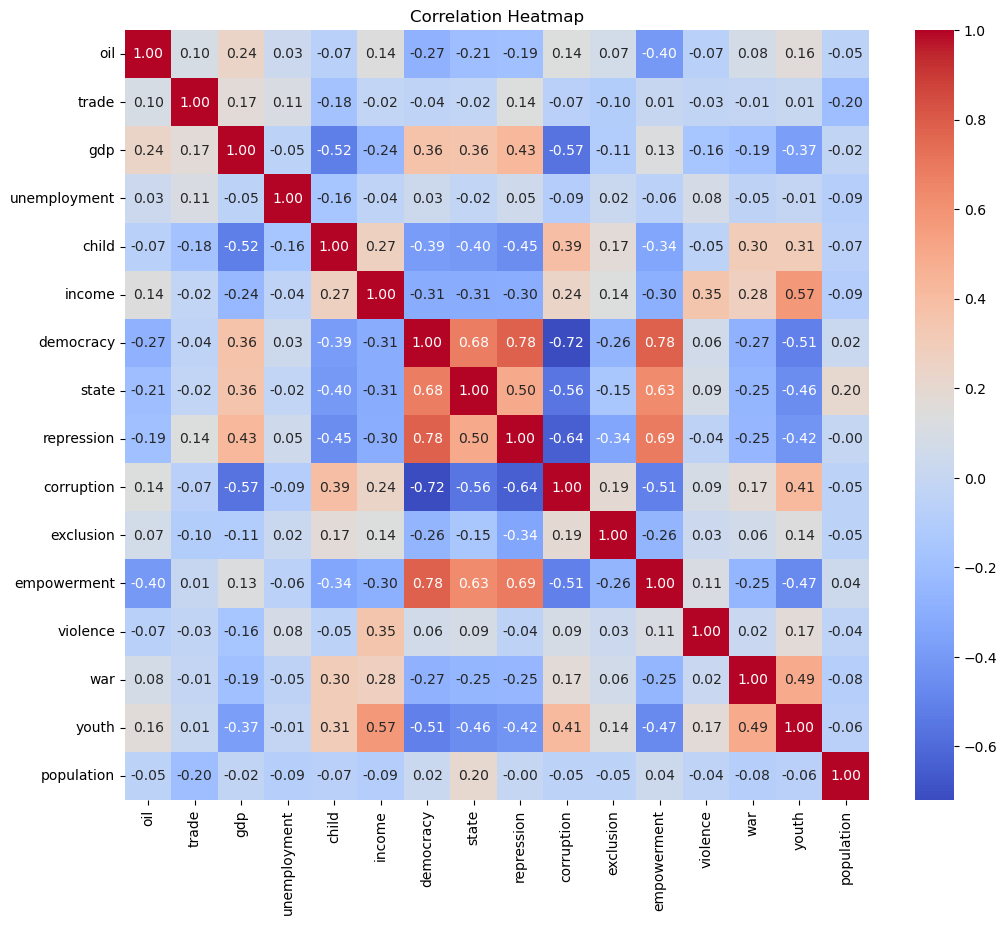

In [1087]:
plt.figure(figsize=(12, 10))

correlation_matrix = conflict[['oil', 'trade', 'gdp', 'unemployment',
       'child', 'income', 'democracy', 'state', 'repression', 'corruption',
       'exclusion', 'empowerment', 'violence', 'war', 'youth', 'population']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.jpg', format='jpeg')

plt.show()

# Transformación datos

Acto seguido comprobamos qué tipo de distribución disponen las variables. Para ello creamos la siguiente función para realizar el test the shapiro para cada una de ellas.

In [1088]:
from scipy.stats import shapiro

def shapiro_test(column_data, alpha=0.05):
    statistic, p_value = shapiro(column_data)
    if p_value > alpha:
        result = "The data appears to be normally distributed"
    else:
        result = "The data does not appear to be normally distributed"

    return result

## oil

Comprobamos que esta variable dispone de mucha oblicuidad y outliers, por lo que aplicamos una transformación mediante el Robust Scaler.

In [1089]:
column_data = conflict['oil']
violence_shapiro = shapiro_test(column_data)
violence_shapiro

'The data does not appear to be normally distributed'

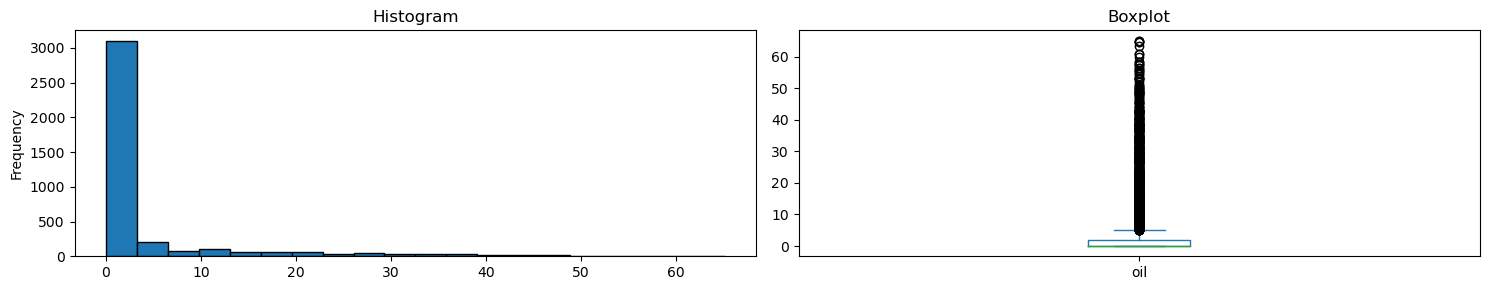

In [1090]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

conflict['oil'].plot(kind='hist', ax=axes[0], title='Histogram', edgecolor='black', bins=20)
conflict['oil'].plot(kind='box', ax=axes[1], title='Boxplot', vert=True)

plt.tight_layout()
plt.show()

In [1091]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
conflict['oil'] = robust_scaler.fit_transform(conflict[['oil']])
# conflict['oil'] = np.log(conflict['oil'])

## trade

Podemos observar una distribución sesgada a la derecha y outliers. Por tanto, aplicamos una transformación con el Robust Scaler.

In [1092]:
column_data = conflict['trade']
violence_shapiro = shapiro_test(column_data)
violence_shapiro

'The data does not appear to be normally distributed'

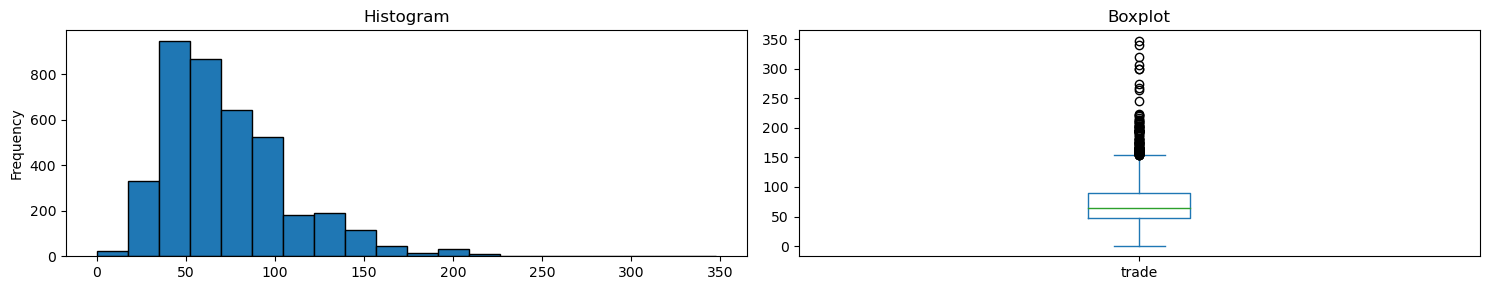

In [1093]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

conflict['trade'].plot(kind='hist', ax=axes[0], title='Histogram', edgecolor='black', bins=20)
conflict['trade'].plot(kind='box', ax=axes[1], title='Boxplot', vert=True)

plt.tight_layout()
plt.show()

In [1094]:
conflict['trade'] = robust_scaler.fit_transform(conflict[['trade']])
# conflict['trade'] = np.log(conflict['trade'])

## gdp

Comprobamos que esta variable dispone de mucha oblicuidad y outliers, por lo que aplicamos una transformación con el Robust Scaler.

In [1095]:
column_data = conflict['gdp']
violence_shapiro = shapiro_test(column_data)
violence_shapiro

'The data does not appear to be normally distributed'

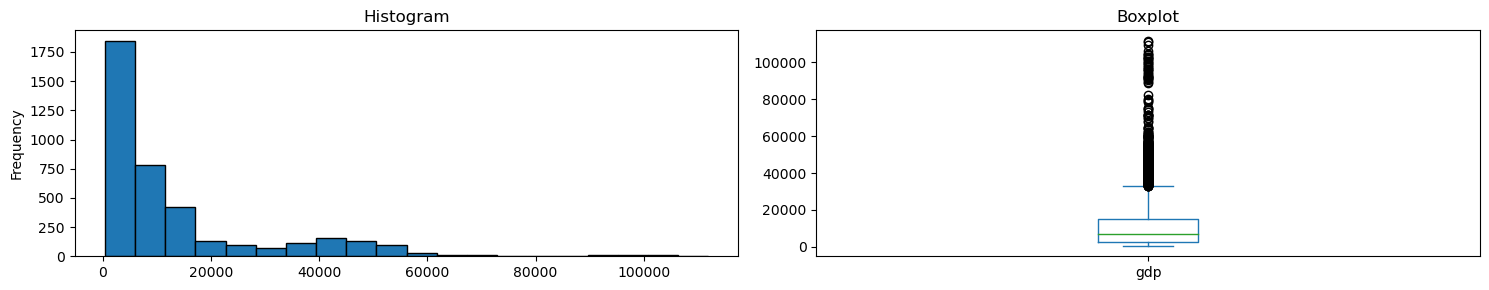

In [1096]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

conflict['gdp'].plot(kind='hist', ax=axes[0], title='Histogram', edgecolor='black', bins=20)
conflict['gdp'].plot(kind='box', ax=axes[1], title='Boxplot', vert=True)

plt.tight_layout()
plt.show()

In [1097]:
conflict['gdp'] = robust_scaler.fit_transform(conflict[['gdp']])
# conflict['gdp'] = np.log(conflict['gdp'])

## unemployment

Según la distribución de la variable y los outliers, la transformación más adecuada es una transformación con el Robust Scaler.

In [1098]:
column_data = conflict['unemployment']
violence_shapiro = shapiro_test(column_data)
violence_shapiro

'The data does not appear to be normally distributed'

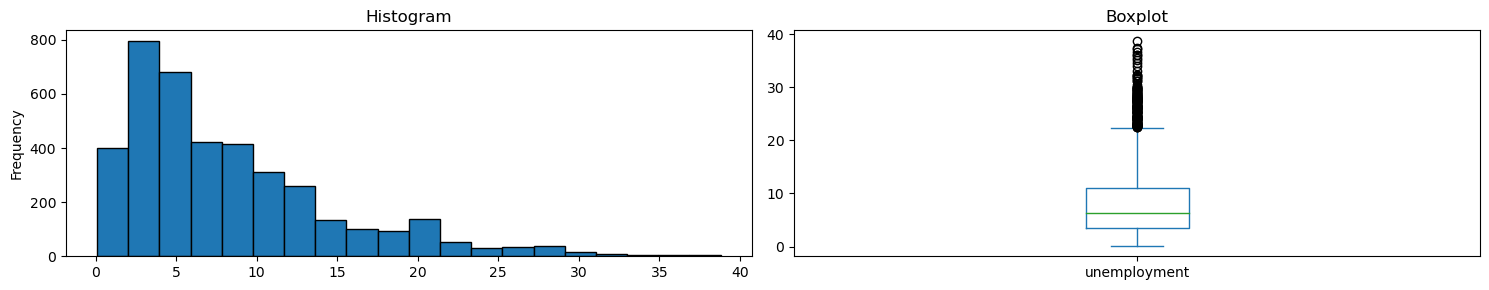

In [1099]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

conflict['unemployment'].plot(kind='hist', ax=axes[0], title='Histogram', edgecolor='black', bins=20)
conflict['unemployment'].plot(kind='box', ax=axes[1], title='Boxplot', vert=True)

plt.tight_layout()
plt.show()

In [1100]:
conflict['unemployment'] = robust_scaler.fit_transform(conflict[['unemployment']])
# conflict['unemployment'] = np.log(conflict['unemployment'])

## child

Podemos observar una distribución fuertemente sesgada a la derecha y outliers. Por tanto, aplicamos una transformación con el Robust Scaler.

In [1101]:
column_data = conflict['child']
violence_shapiro = shapiro_test(column_data)
violence_shapiro

'The data does not appear to be normally distributed'

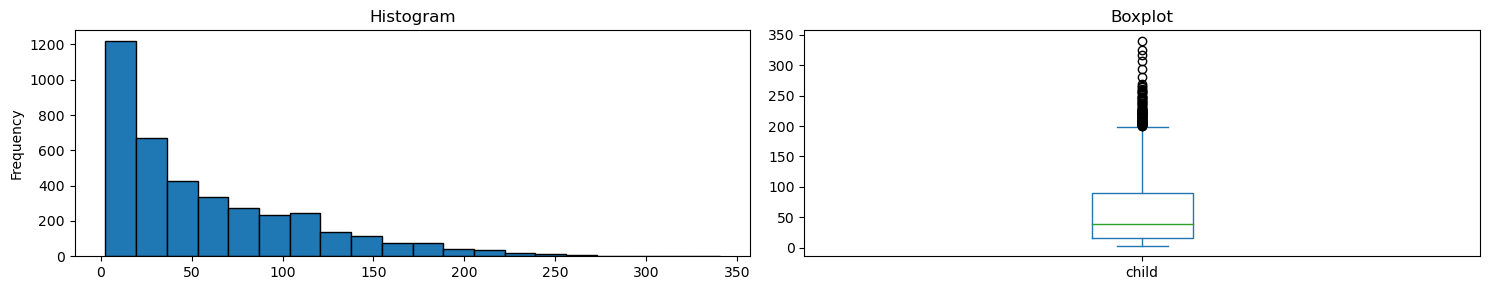

In [1102]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

conflict['child'].plot(kind='hist', ax=axes[0], title='Histogram', edgecolor='black', bins=20)
conflict['child'].plot(kind='box', ax=axes[1], title='Boxplot', vert=True)

plt.tight_layout()
plt.show()

In [1103]:
conflict['child'] = robust_scaler.fit_transform(conflict[['child']])
# conflict['child'] = np.log(conflict['child'])

## income

En este caso disponemos de outliers, por lo que aplicamos el Robust Scaler.

In [1104]:
column_data = conflict['income']
violence_shapiro = shapiro_test(column_data)
violence_shapiro

'The data does not appear to be normally distributed'

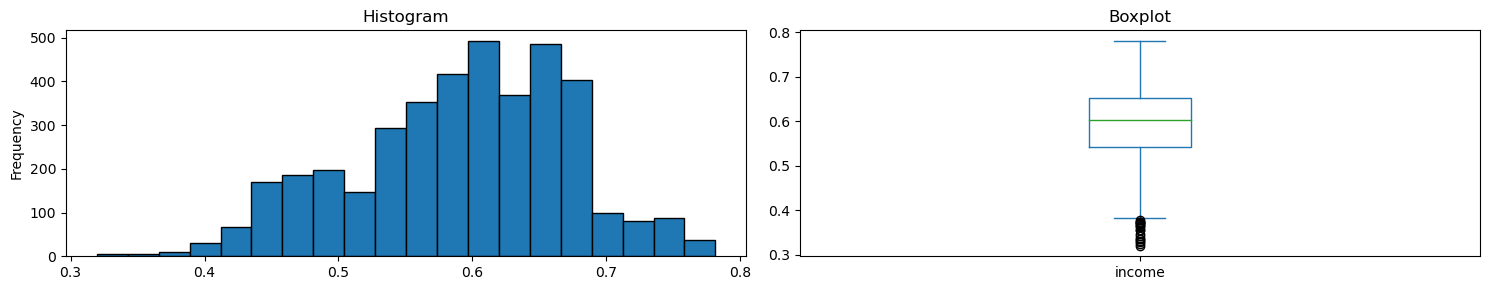

In [1105]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

conflict['income'].plot(kind='hist', ax=axes[0], title='Histogram', edgecolor='black', bins=20)
conflict['income'].plot(kind='box', ax=axes[1], title='Boxplot', vert=True)

plt.tight_layout()
plt.show()

In [1106]:
conflict['income'] = robust_scaler.fit_transform(conflict[['income']])

## democracy

En este caso no disponemos de outliers, tampoco de una distribución normal, por lo que correspondería aplicar el MinMax Scaler. sin emabrgo, dado que la variable ya viene escalada de base, la dejamos sin transformar.

In [1107]:
column_data = conflict['democracy']
violence_shapiro = shapiro_test(column_data)
violence_shapiro

'The data does not appear to be normally distributed'

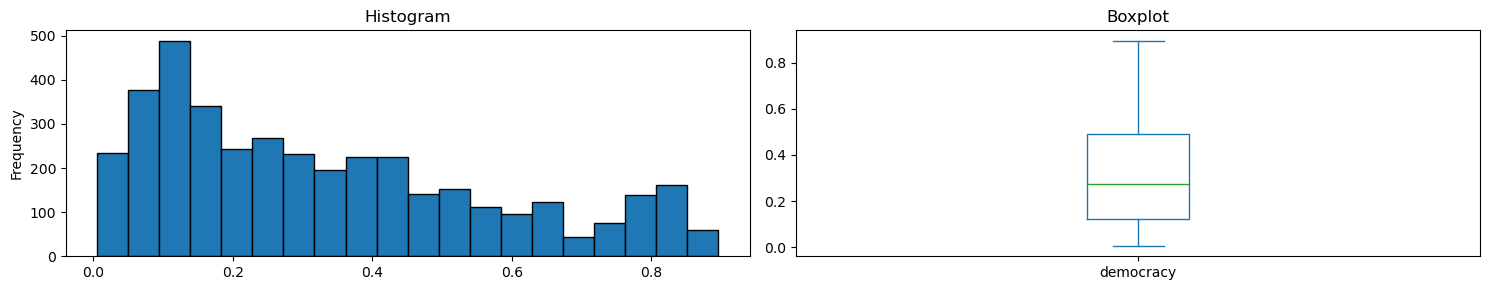

In [1108]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

conflict['democracy'].plot(kind='hist', ax=axes[0], title='Histogram', edgecolor='black', bins=20)
conflict['democracy'].plot(kind='box', ax=axes[1], title='Boxplot', vert=True)

plt.tight_layout()
plt.show()

## state

En este caso no disponemos de outliers, tampoco de una distribución normal, por lo que correspondería aplicar el MinMax Scaler. sin emabrgo, dado que la variable ya viene escalada de base, la dejamos sin transformar.

In [1109]:
column_data = conflict['state']
violence_shapiro = shapiro_test(column_data)
violence_shapiro

'The data does not appear to be normally distributed'

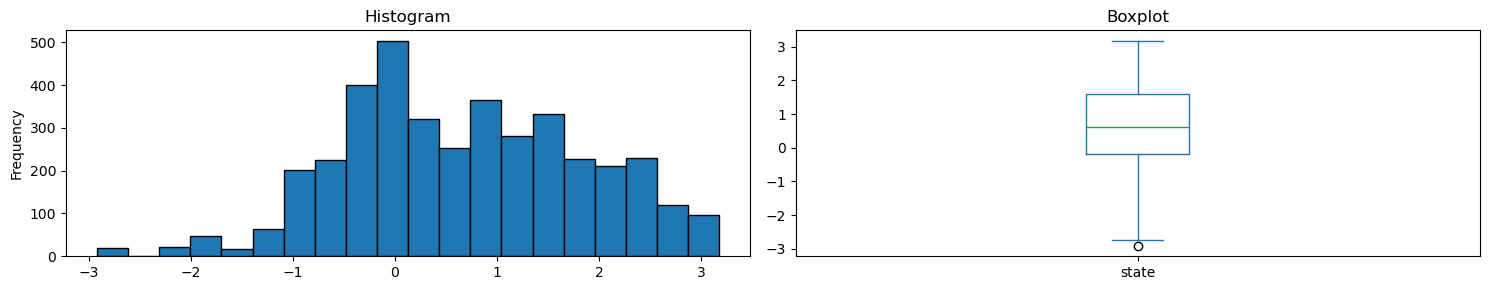

In [1110]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

conflict['state'].plot(kind='hist', ax=axes[0], title='Histogram', edgecolor='black', bins=20)
conflict['state'].plot(kind='box', ax=axes[1], title='Boxplot', vert=True)

plt.tight_layout()
plt.show()

## repression

En este caso no disponemos de outliers, tampoco de una distribución normal, por lo que correspondería aplicar el MinMax Scaler. sin emabrgo, dado que la variable ya viene escalada de base, la dejamos sin transformar.

In [1111]:
column_data = conflict['repression']
violence_shapiro = shapiro_test(column_data)
violence_shapiro

'The data does not appear to be normally distributed'

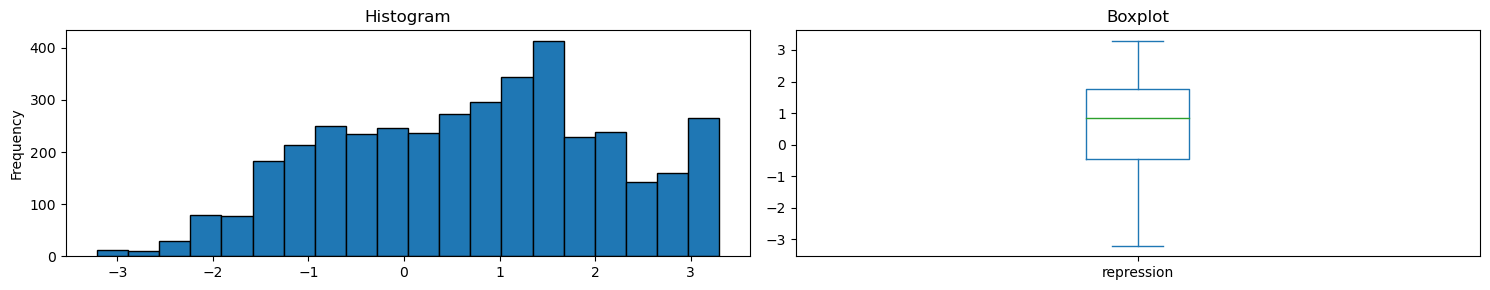

In [1112]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

conflict['repression'].plot(kind='hist', ax=axes[0], title='Histogram', edgecolor='black', bins=20)
conflict['repression'].plot(kind='box', ax=axes[1], title='Boxplot', vert=True)

plt.tight_layout()
plt.show()

## corruption

En este caso no disponemos de outliers, tampoco de una distribución normal, por lo que correspondería aplicar el MinMax Scaler. sin emabrgo, dado que la variable ya viene escalada de base, la dejamos sin transformar.

In [1113]:
column_data = conflict['corruption']
violence_shapiro = shapiro_test(column_data)
violence_shapiro

'The data does not appear to be normally distributed'

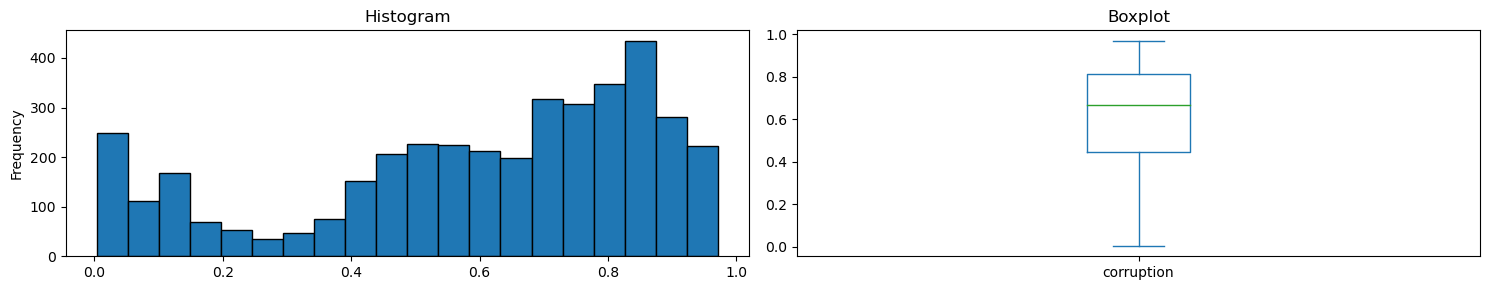

In [1114]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

conflict['corruption'].plot(kind='hist', ax=axes[0], title='Histogram', edgecolor='black', bins=20)
conflict['corruption'].plot(kind='box', ax=axes[1], title='Boxplot', vert=True)

plt.tight_layout()
plt.show()

## exclusion

En este caso nos encontramos con una distribuciçón oblícua y con presencia de outliers, por lo que aplicamos el Robust Scaler.

In [1115]:
column_data = conflict['exclusion']
violence_shapiro = shapiro_test(column_data)
violence_shapiro

'The data does not appear to be normally distributed'

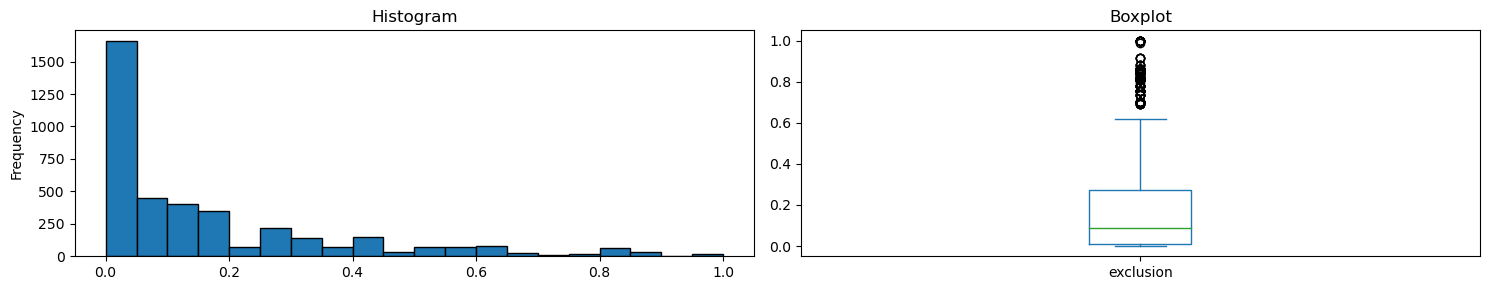

In [1116]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

conflict['exclusion'].plot(kind='hist', ax=axes[0], title='Histogram', edgecolor='black', bins=20)
conflict['exclusion'].plot(kind='box', ax=axes[1], title='Boxplot', vert=True)

plt.tight_layout()
plt.show()

In [1117]:
# conflict['exclusion'] = np.log(conflict['exclusion'])
conflict['exclusion'] = robust_scaler.fit_transform(conflict[['exclusion']])

## violence

Podemos observar una distribución fuertemente sesgada a la derecha y outliers. Por tanto, aplicamos una transformación con el Robust Scaler.

In [1118]:
column_data = conflict['violence']
violence_shapiro = shapiro_test(column_data)
violence_shapiro

'The data does not appear to be normally distributed'

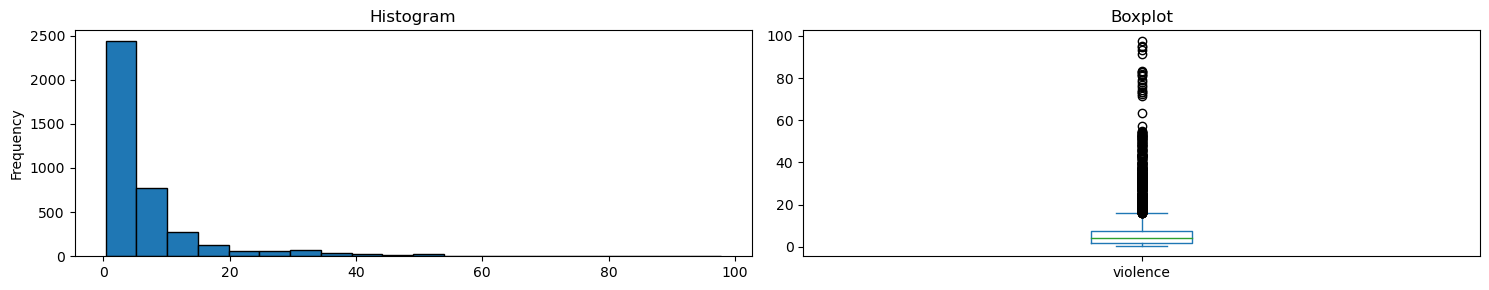

In [1119]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

conflict['violence'].plot(kind='hist', ax=axes[0], title='Histogram', edgecolor='black', bins=20)
conflict['violence'].plot(kind='box', ax=axes[1], title='Boxplot', vert=True)

plt.tight_layout()
plt.show()

In [1120]:
conflict['violence'] = robust_scaler.fit_transform(conflict[['violence']])
# conflict['violence'] = np.log(conflict['violence'])

## empowerment

También disponemos aquí de outliers, por lo que procedemos de nuevo con el Robust Scaler.

In [1121]:
column_data = conflict['empowerment']
violence_shapiro = shapiro_test(column_data)
violence_shapiro

'The data does not appear to be normally distributed'

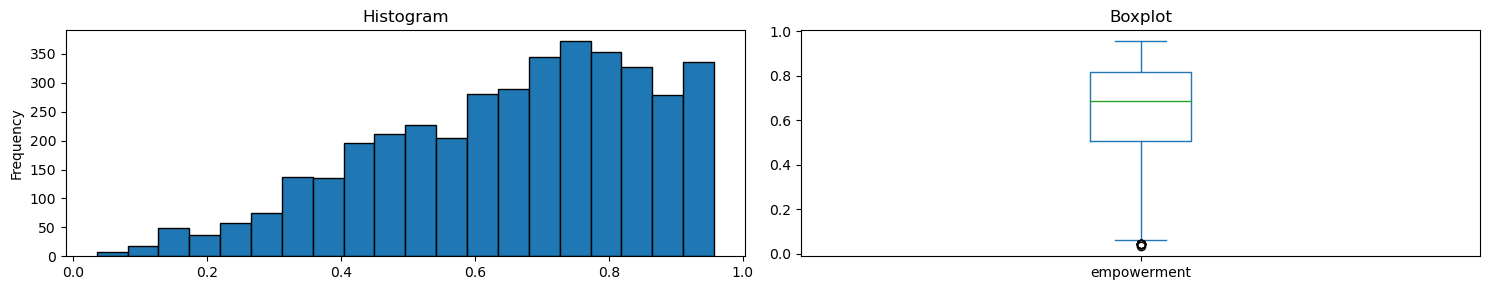

In [1122]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

conflict['empowerment'].plot(kind='hist', ax=axes[0], title='Histogram', edgecolor='black', bins=20)
conflict['empowerment'].plot(kind='box', ax=axes[1], title='Boxplot', vert=True)

plt.tight_layout()
plt.show()

In [1123]:
conflict['empowerment'] = robust_scaler.fit_transform(conflict[['empowerment']])

## war

También disponemos aquí de outliers, por lo que procedemos de nuevo con el Robust Scaler.

In [1124]:
column_data = conflict['war']
violence_shapiro = shapiro_test(column_data)
violence_shapiro

'The data does not appear to be normally distributed'

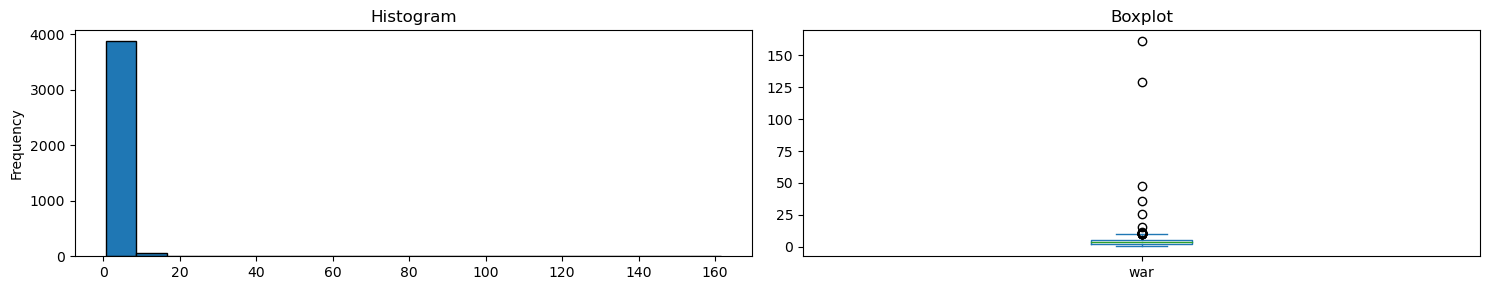

In [1125]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

conflict['war'].plot(kind='hist', ax=axes[0], title='Histogram', edgecolor='black', bins=20)
conflict['war'].plot(kind='box', ax=axes[1], title='Boxplot', vert=True)

plt.tight_layout()
plt.show()

In [1126]:
# conflict['war'] = np.log(conflict['war'])
conflict['war'] = robust_scaler.fit_transform(conflict[['war']])

## youth

También disponemos aquí de outliers, por lo que procedemos de nuevo con el Robust Scaler.

In [1127]:
column_data = conflict['youth']
violence_shapiro = shapiro_test(column_data)
violence_shapiro

'The data does not appear to be normally distributed'

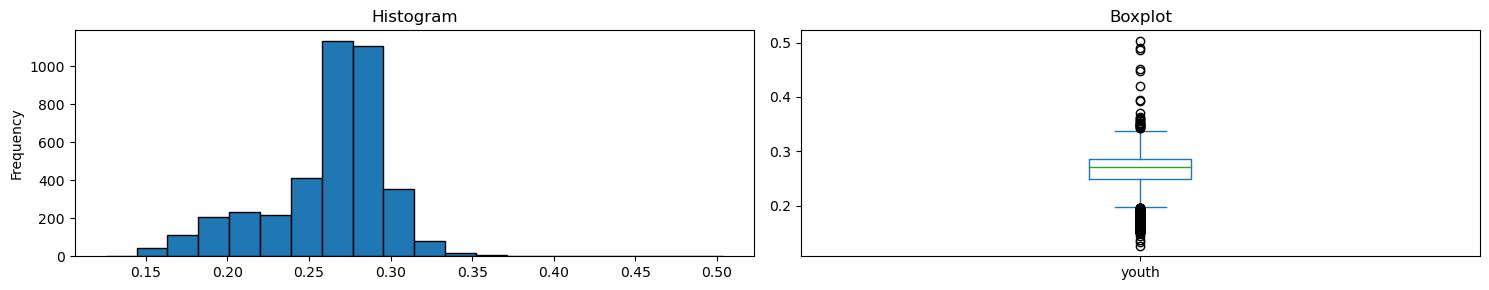

In [1128]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

conflict['youth'].plot(kind='hist', ax=axes[0], title='Histogram', edgecolor='black', bins=20)
conflict['youth'].plot(kind='box', ax=axes[1], title='Boxplot', vert=True)

plt.tight_layout()
plt.show()

In [1129]:
conflict['youth'] = robust_scaler.fit_transform(conflict[['youth']])

## population

Podemos observar una distribución fuertemente sesgada a la derecha y outliers. Por tanto, aplicamos una transformación con El robust Scaler.

In [1130]:
column_data = conflict['population']
violence_shapiro = shapiro_test(column_data)
violence_shapiro

'The data does not appear to be normally distributed'

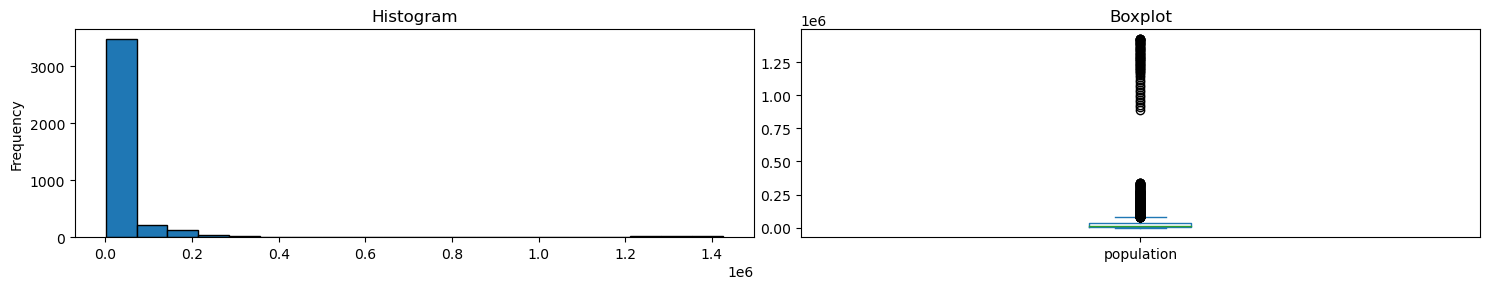

In [1131]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

conflict['population'].plot(kind='hist', ax=axes[0], title='Histogram', edgecolor='black', bins=20)
conflict['population'].plot(kind='box', ax=axes[1], title='Boxplot', vert=True)

plt.tight_layout()
plt.show()

In [1132]:
conflict['population'] = robust_scaler.fit_transform(conflict[['population']])
# conflict['population'] = np.log(conflict['population'])

# Modelo

Utilizamos LazyPredict para que nos indique cuál sería el mejor modelo.

In [1133]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

independent_vars = ['oil', 'trade', 'gdp', 'unemployment',
       'child', 'income', 'democracy', 'state', 'repression', 'corruption',
       'exclusion', 'empowerment', 'violence', 'war', 'youth', 'population']

dependent_var = 'total_incidence'

X = conflict[independent_vars]
y = conflict[dependent_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:06<00:00,  4.82it/s]

[LightGBM] [Info] Number of positive: 1061, number of negative: 2087
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3966
[LightGBM] [Info] Number of data points in the train set: 3148, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337039 -> initscore=-0.676516
[LightGBM] [Info] Start training from score -0.676516


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.90,0.89,0.89,0.90,0.37
LGBMClassifier,0.90,0.88,0.88,0.90,0.26
XGBClassifier,0.90,0.88,0.88,0.90,0.23
LabelPropagation,0.89,0.88,0.88,0.89,0.46
LabelSpreading,0.89,0.88,0.88,0.89,0.53
RandomForestClassifier,0.90,0.88,0.88,0.90,1.16
KNeighborsClassifier,0.90,0.88,0.88,0.90,0.08
BaggingClassifier,0.89,0.86,0.86,0.89,0.43
DecisionTreeClassifier,0.87,0.85,0.85,0.87,0.05


## XGBoostClassifier

### Mejores parámetros con GridSearch XGBoostClassifier

In [1134]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

independent_vars = ['oil', 'trade', 'gdp', #'casualties',
                    'unemployment', 'child', 'democracy', 'state', 'repression',
                    'corruption', 'exclusion', 'violence', 'empowerment', 'war',
                    'youth', 'population']
dependent_var = 'total_incidence'

X = conflict[independent_vars]
y = conflict[dependent_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

model = xgb.XGBClassifier()

scoring_metric = make_scorer(accuracy_score)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring_metric)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
Best Cross-Validation Accuracy: 0.8999353975824563


### Predicción con XGBoostClassifier

#### Para la variable dependiente "total_incidence"

In [1135]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

best_params = grid_search.best_params_

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

model = xgb.XGBClassifier(**best_params)

y_pred = cross_val_predict(model, X, y, cv=cv)

conf_matrix = confusion_matrix(y, y_pred)
classification_rep = classification_report(y, y_pred)

print(f'Classification Report:\n{classification_rep}')

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2620
           1       0.88      0.83      0.85      1316

    accuracy                           0.90      3936
   macro avg       0.90      0.88      0.89      3936
weighted avg       0.90      0.90      0.90      3936



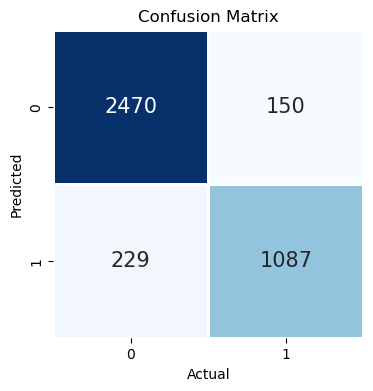

In [1136]:
plt.figure(figsize=(4, 4))

sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15}, cmap="Blues", fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=['0','1'], yticklabels=['0','1'])
plt.ylabel("Predicted", fontsize=10)
plt.xlabel("Actual", fontsize=10)
plt.title("Confusion Matrix", fontsize=12)
plt.savefig('total_confusion_matrix.jpg', format='jpeg', dpi=300)

#### Para la variable dependiente "battle_incidence"

In [1137]:
battle_dependent_var = 'battle_incidence'

y_battle = conflict[battle_dependent_var]

y_pred_battle = cross_val_predict(model, X, y_battle, cv=cv)

battle_conf_matrix = confusion_matrix(y_battle, y_pred_battle)
battle_classification_rep = classification_report(y_battle, y_pred_battle)

print(f'Classification Report:\n{battle_classification_rep}')

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2948
           1       0.88      0.83      0.85       988

    accuracy                           0.93      3936
   macro avg       0.91      0.90      0.90      3936
weighted avg       0.93      0.93      0.93      3936



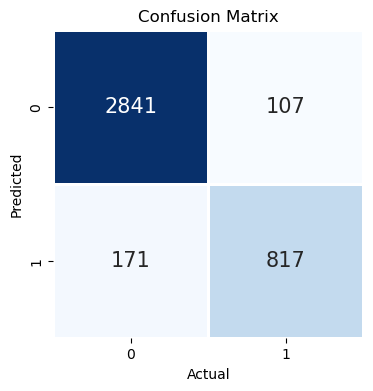

In [1138]:
plt.figure(figsize=(4, 4))

sns.heatmap(battle_conf_matrix, annot=True, annot_kws={"size": 15}, cmap="Blues", fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=['0','1'], yticklabels=['0','1'])
plt.ylabel("Predicted", fontsize=10)
plt.xlabel("Actual", fontsize=10)
plt.title("Confusion Matrix", fontsize=12)
plt.savefig('battle_confusion_matrix.jpg', format='jpeg', dpi=300)

#### Para la variable dependiente "nonstate_incidence"

In [1139]:
nonstate_dependent_var = 'nonstate_incidence'

y_nonstate = conflict[nonstate_dependent_var]

y_pred_nonstate = cross_val_predict(model, X, y_nonstate, cv=cv)

nonstate_conf_matrix = confusion_matrix(y_nonstate, y_pred_nonstate)
nonstate_classification_rep = classification_report(y_nonstate, y_pred_nonstate)

print(f'Classification Report:\n{nonstate_classification_rep}')

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3395
           1       0.79      0.66      0.72       541

    accuracy                           0.93      3936
   macro avg       0.87      0.82      0.84      3936
weighted avg       0.93      0.93      0.93      3936



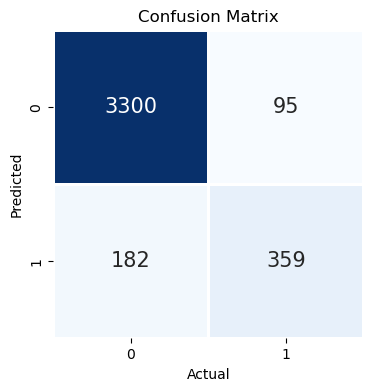

In [1140]:
plt.figure(figsize=(4, 4))

sns.heatmap(nonstate_conf_matrix, annot=True, annot_kws={"size": 15}, cmap="Blues", fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=['0','1'], yticklabels=['0','1'])
plt.ylabel("Predicted", fontsize=10)
plt.xlabel("Actual", fontsize=10)
plt.title("Confusion Matrix", fontsize=12)
plt.savefig('nonstate_confusion_matrix.jpg', format='jpeg', dpi=300)

#### Para la variable dependiente "onesided_incidence"

In [1141]:
onesided_dependent_var = 'onesided_incidence'

y_onesided = conflict[onesided_dependent_var]

y_pred_onesided = cross_val_predict(model, X, y_onesided, cv=cv)

onesided_conf_matrix = confusion_matrix(y_onesided, y_pred_onesided)
onesided_classification_rep = classification_report(y_onesided, y_pred_onesided)

print(f'Classification Report:\n{onesided_classification_rep}')

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3364
           1       0.77      0.63      0.69       572

    accuracy                           0.92      3936
   macro avg       0.85      0.80      0.82      3936
weighted avg       0.91      0.92      0.92      3936



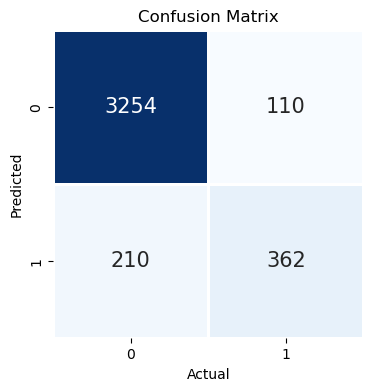

In [1142]:
plt.figure(figsize=(4, 4))

sns.heatmap(onesided_conf_matrix, annot=True, annot_kws={"size": 15}, cmap="Blues", fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=['0','1'], yticklabels=['0','1'])
plt.ylabel("Predicted", fontsize=10)
plt.xlabel("Actual", fontsize=10)
plt.title("Confusion Matrix", fontsize=12)
plt.savefig('onesided_confusion_matrix.jpg', format='jpeg', dpi=300)

# Gráficos

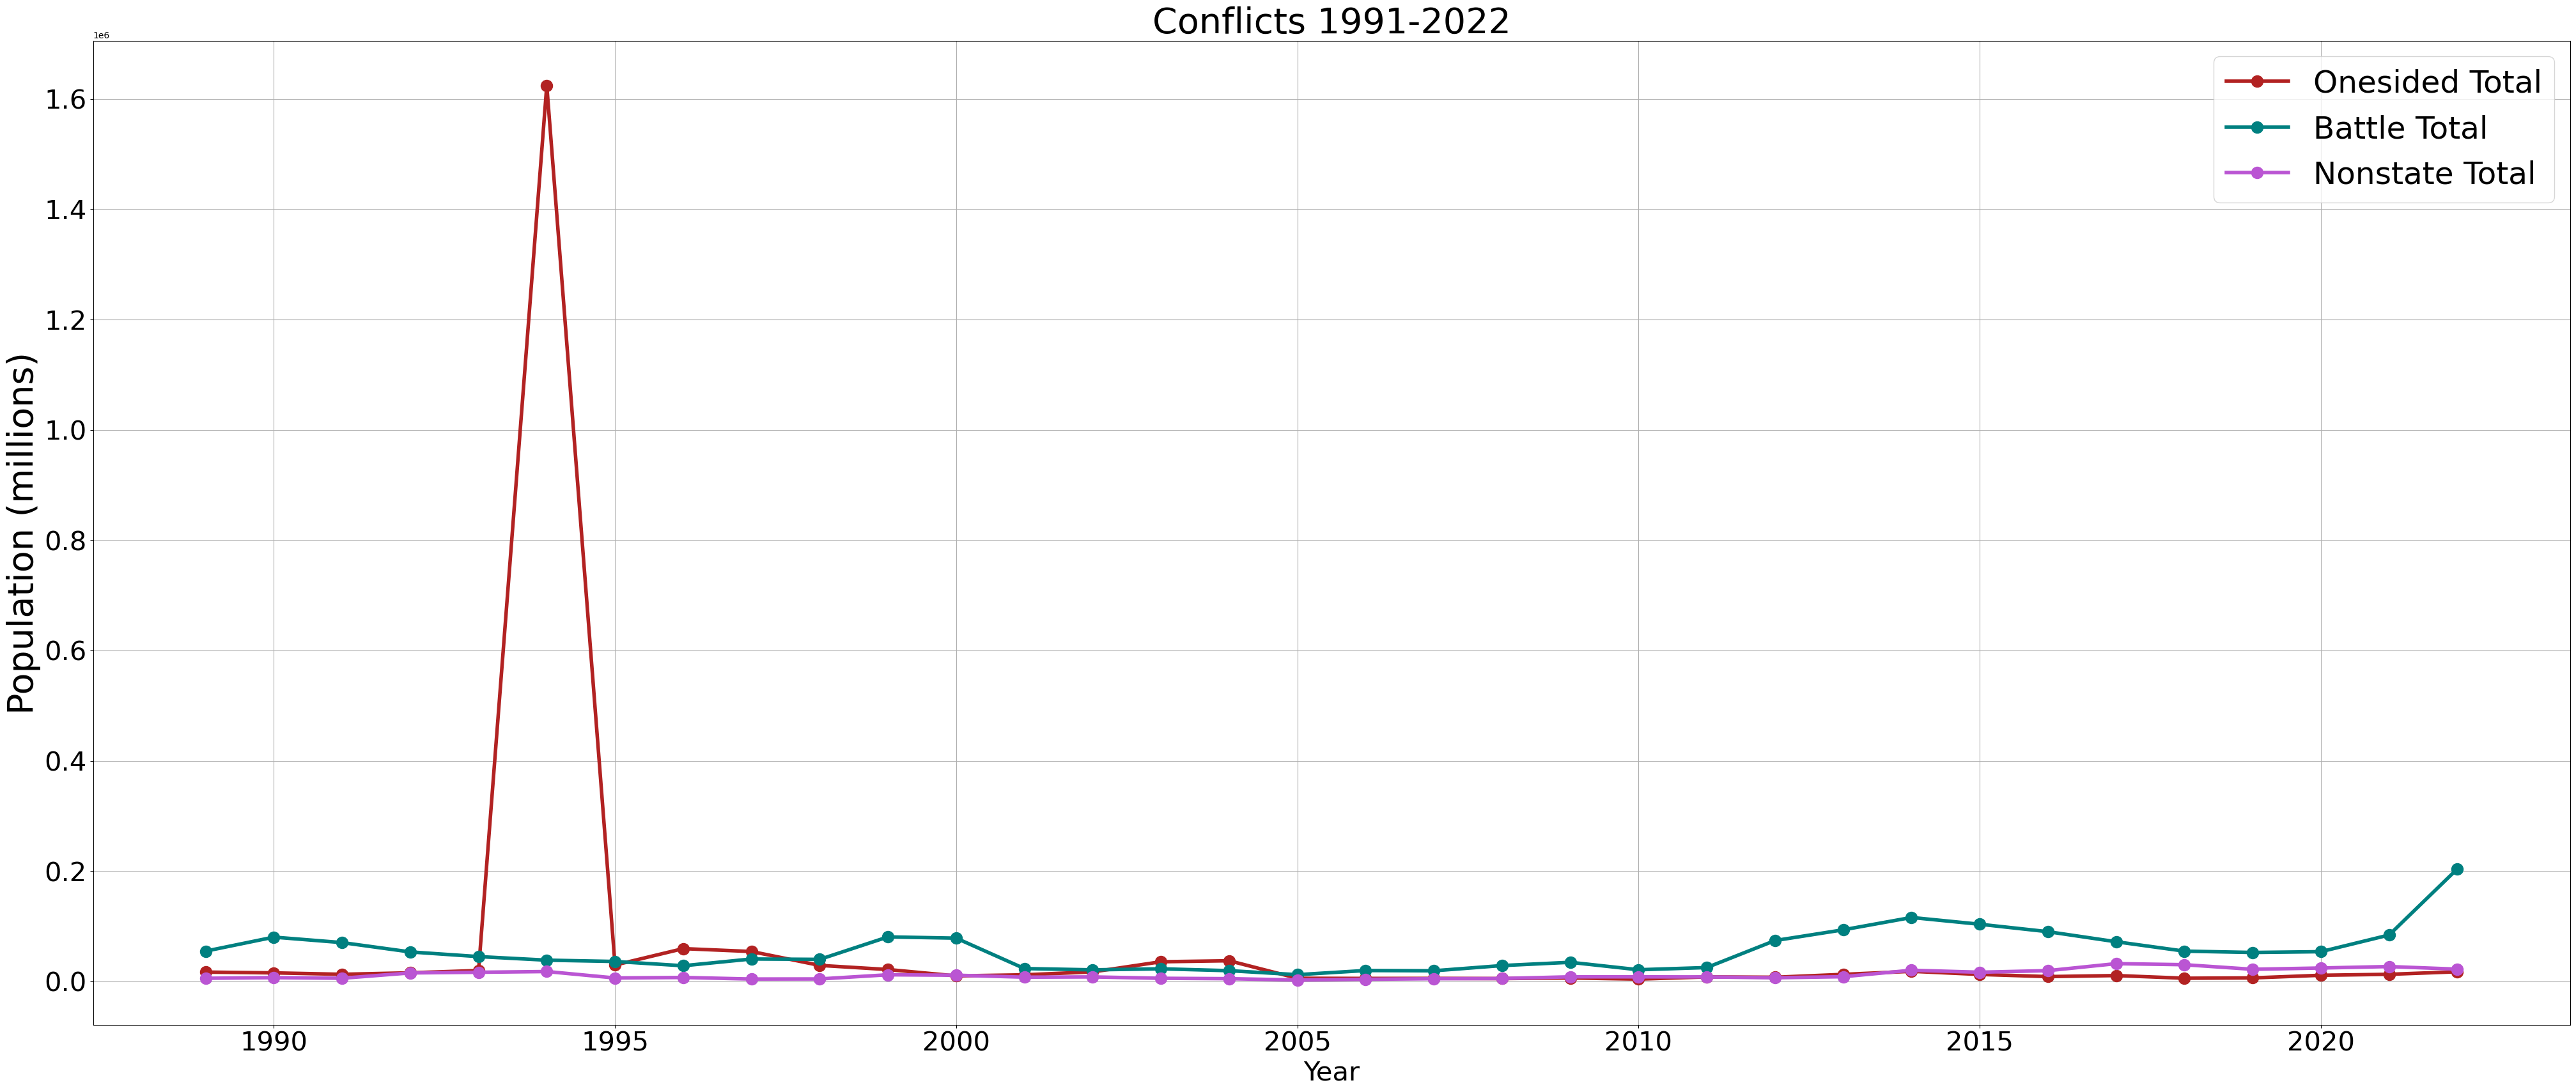

In [1143]:
onesided_total_plot = ucdp_onesided.iloc[:, [-7, -10]]
battle_total_plot = ucdp_battle.iloc[:, [11, 12]]
nonstate_total_plot = ucdp_nonstate.iloc[:, [-5, -8]]


plt.figure(figsize=(50, 20))

plt.plot(onesided_total_plot.groupby(['year']).aggregate(sum), color="firebrick", linewidth=4, marker='o', markersize=13)
plt.plot(battle_total_plot.groupby(['year']).aggregate(sum), color="teal", linewidth=4, marker='o', markersize=13)
plt.plot(nonstate_total_plot.groupby(['year']).aggregate(sum), color="mediumorchid", linewidth=4, marker='o', markersize=13)

plt.title('Conflicts 1991-2022', fontsize=40)
plt.xlabel('Year', fontsize=30)
plt.ylabel('Population (millions)', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)
legend_labels = ['Onesided Total', 'Battle Total', 'Nonstate Total']
plt.legend(legend_labels, fontsize=35)

plt.savefig('conflicts 1991 2022.jpg', format='jpeg', dpi=300)
plt.show()

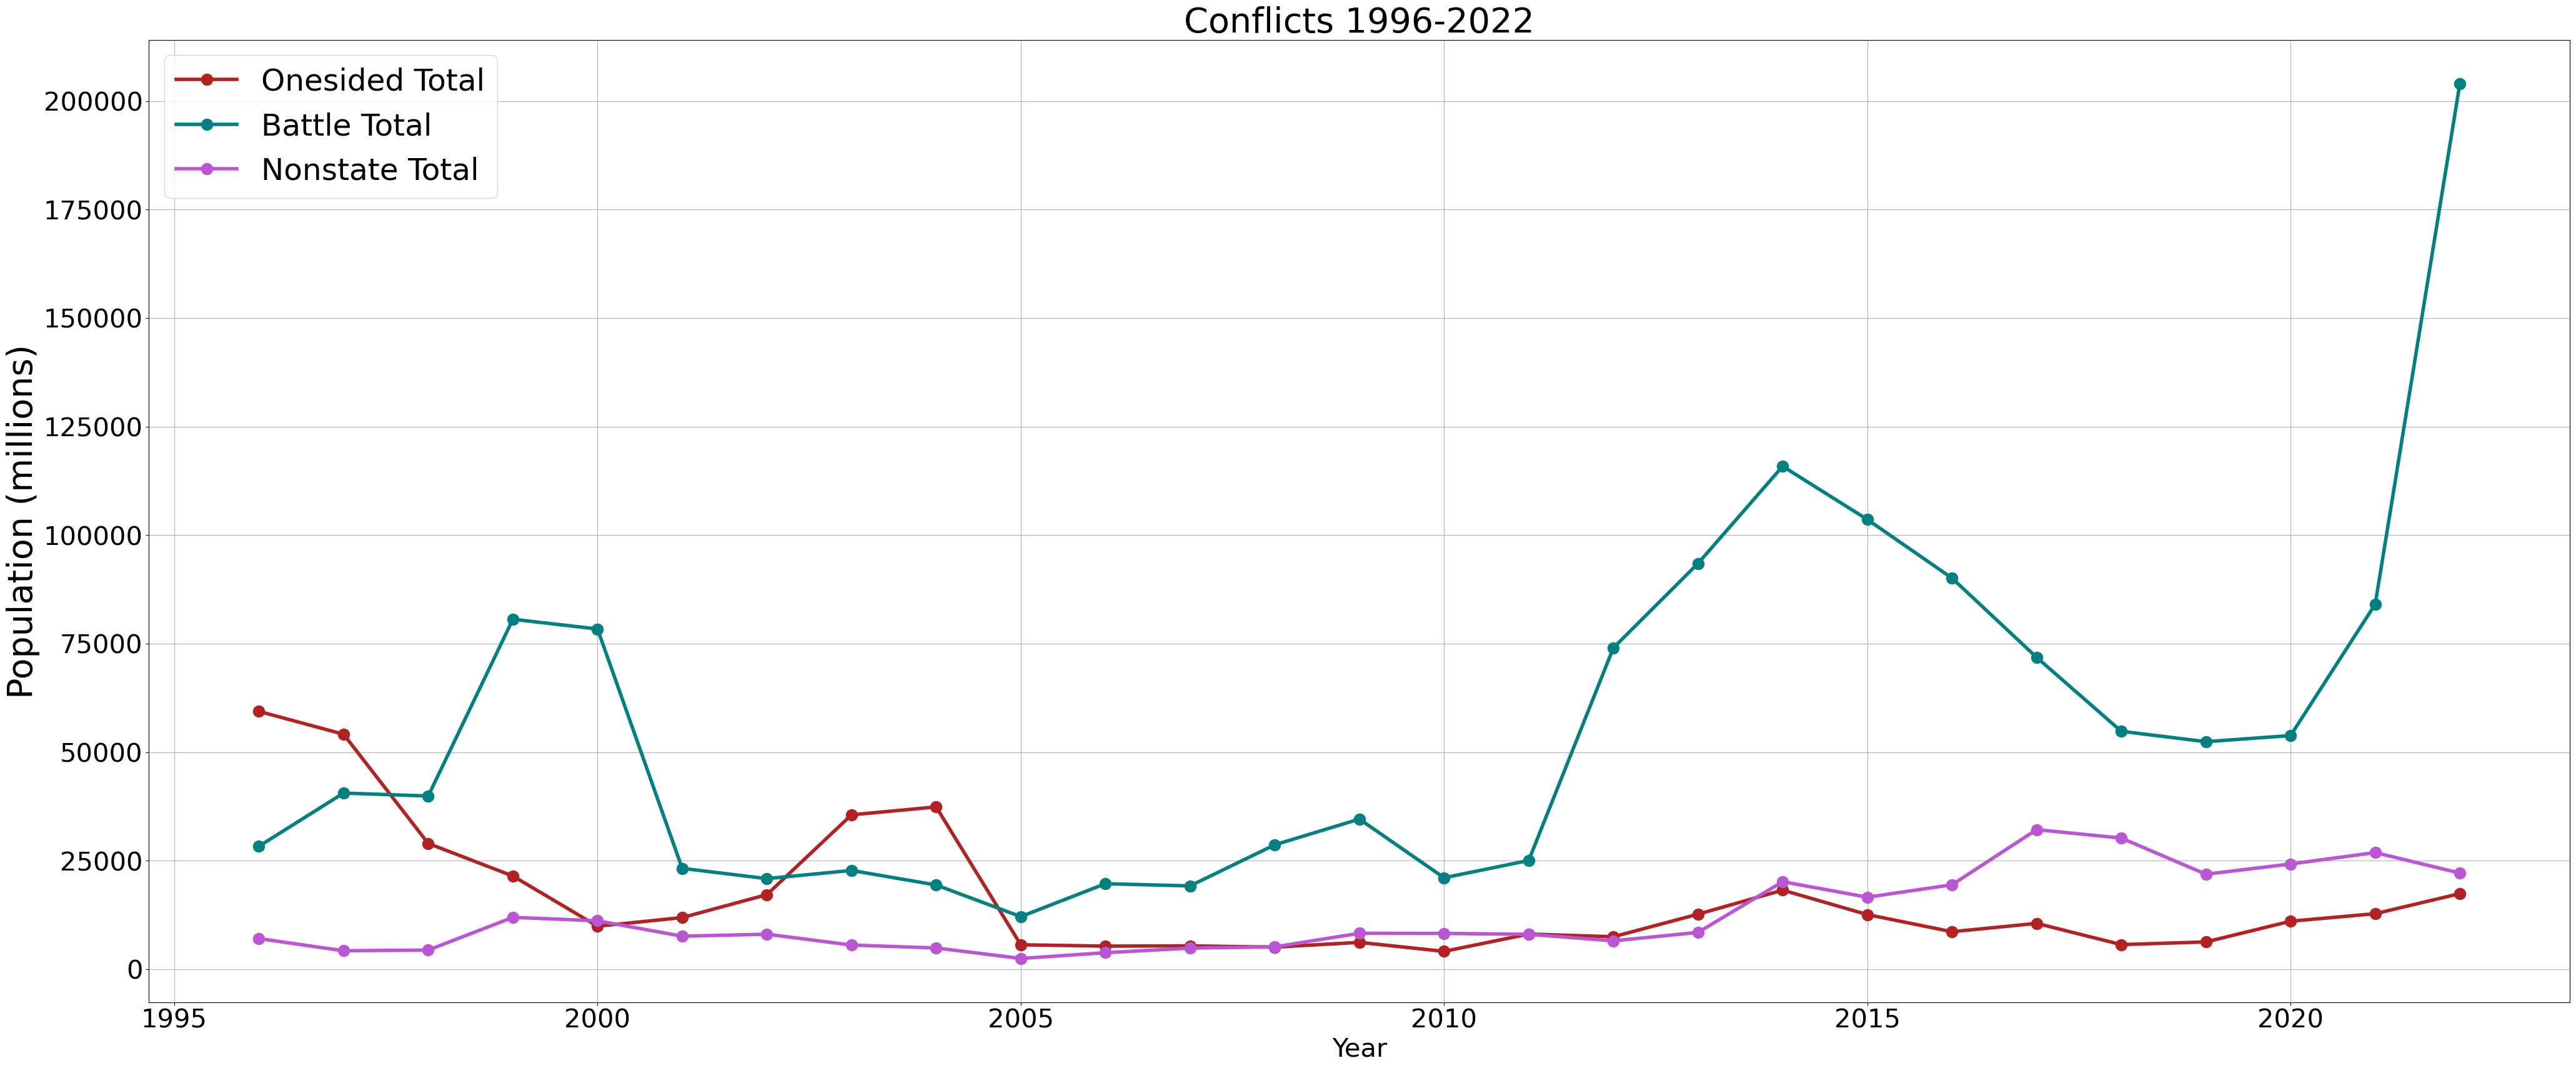

In [1144]:
plt.figure(figsize=(50, 20))

onesided_total_graph_2 = onesided_total_plot[onesided_total_plot['year'] >= 1996]
nonstate_total_graph_2 = nonstate_total_plot[nonstate_total_plot['year'] >= 1996]
battle_total_graph_2 = battle_total_plot[battle_total_plot['year'] >= 1996]

plt.plot(onesided_total_graph_2.groupby(['year']).aggregate(sum), color="firebrick", linewidth=4, marker='o', markersize=13)
plt.plot(battle_total_graph_2.groupby(['year']).aggregate(sum), color="teal", linewidth=4, marker='o', markersize=13)
plt.plot(nonstate_total_graph_2.groupby(['year']).aggregate(sum), color="mediumorchid", linewidth=4, marker='o', markersize=13)

plt.title('Conflicts 1996-2022', fontsize=40)
plt.xlabel('Year', fontsize=30)
plt.ylabel('Population (millions)', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)
plt.legend(legend_labels, fontsize=35)

plt.savefig('conflicts 1996 2022.jpg', format='jpeg', dpi=300)
plt.show()

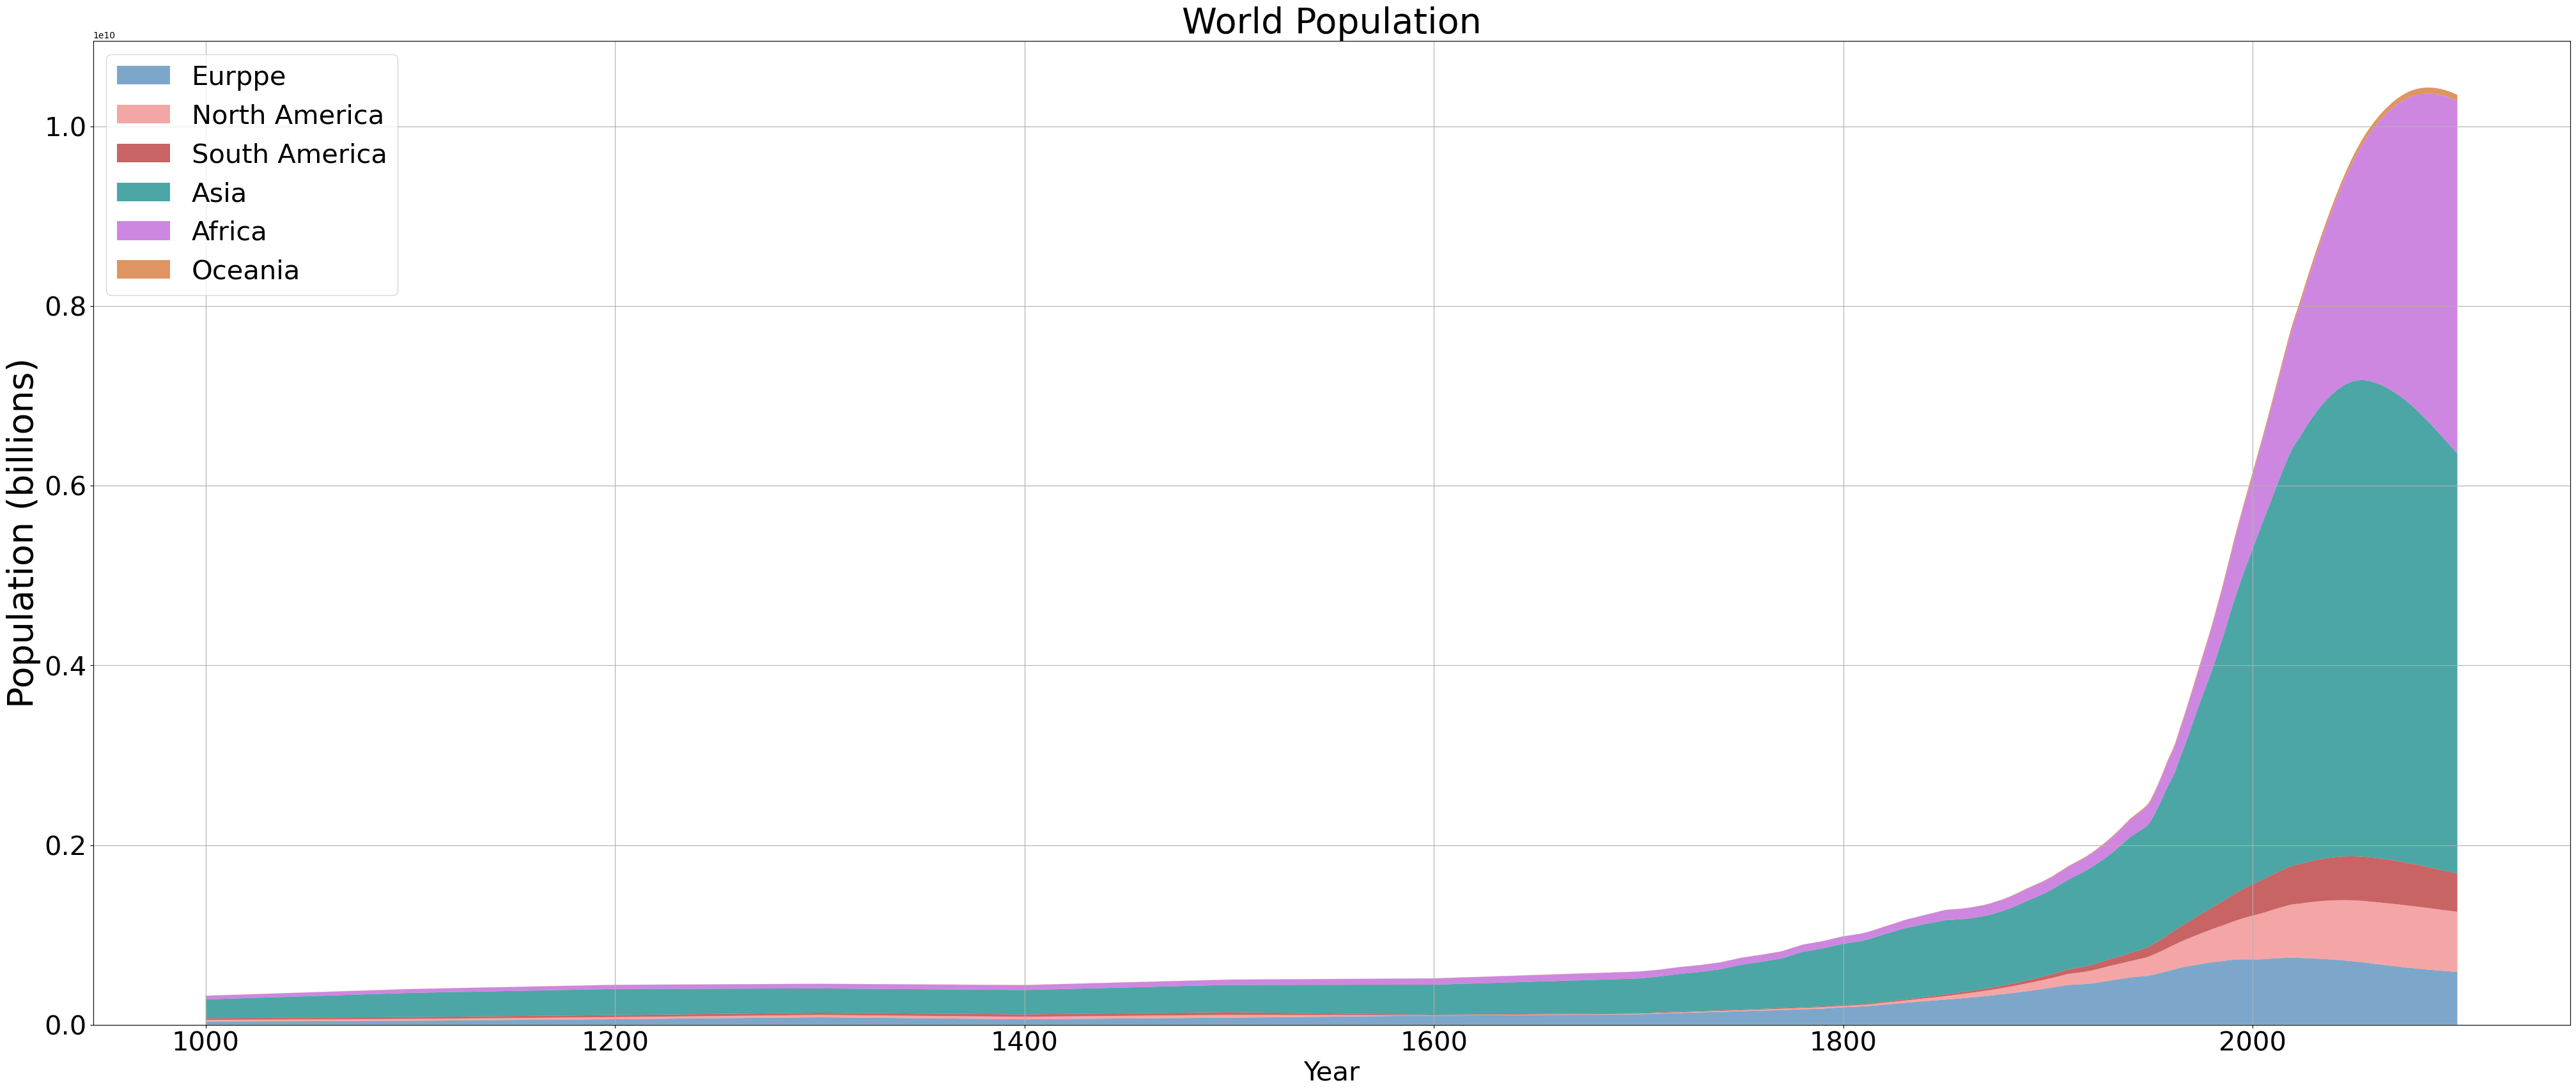

In [1145]:
pop_graph = pop_graph[(pop_graph['Entity'].isin(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']))]

plt.figure(figsize=(50, 20))

pop_graph_oceania = pop_graph[(pop_graph['Entity'].isin(['Oceania'])) & (pop_graph['Year'] >= 1000)]
pop_graph_africa = pop_graph[(pop_graph['Entity'].isin(['Africa'])) & (pop_graph['Year'] >= 1000)]
pop_graph_asia = pop_graph[(pop_graph['Entity'].isin(['Asia'])) & (pop_graph['Year'] >= 1000)]
pop_graph_south_america = pop_graph[(pop_graph['Entity'].isin(['South America'])) & (pop_graph['Year'] >= 1000)]
pop_graph_north_america = pop_graph[(pop_graph['Entity'].isin(['North America'])) & (pop_graph['Year'] >= 1000)]
pop_graph_europe = pop_graph[(pop_graph['Entity'].isin(['Europe'])) & (pop_graph['Year'] >= 1000)]

years = pop_graph_asia.groupby(['Year']).aggregate(sum).index

asia_data = pop_graph_asia.groupby(['Year']).aggregate(sum).values.flatten()
africa_data = pop_graph_africa.groupby(['Year']).aggregate(sum).values.flatten()
europe_data = pop_graph_europe.groupby(['Year']).aggregate(sum).values.flatten()
north_america_data = pop_graph_north_america.groupby(['Year']).aggregate(sum).values.flatten()
south_america_data = pop_graph_south_america.groupby(['Year']).aggregate(sum).values.flatten()
oceania_data = pop_graph_oceania.groupby(['Year']).aggregate(sum).values.flatten()

# Plot the stackplot
plt.stackplot(years, europe_data, north_america_data, south_america_data, asia_data, africa_data, oceania_data,
              labels=['Eurppe', 'North America', 'South America', 'Asia', 'Africa', 'Oceania'],
              colors=["steelblue", "lightcoral", "firebrick", "teal", "mediumorchid", "chocolate"],
              alpha=0.7)

# Set labels and title
plt.title('World Population', fontsize=40)
plt.xlabel('Year', fontsize=30)
plt.ylabel('Population (billions)', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=30, loc='upper left')
plt.grid(True)

plt.savefig('world_population_stackplot.jpg', format='jpeg', dpi=300)
plt.show()